###**Introduction**
----------------------
Mercari is an e-commerce company currently operational in the US and Japan. This provides a platform where customers can sell items that are no longer useful/unused products. It tries to make all the processes hassle-free by providing at-home pickups, same-day delivery, and many other advantages. The company website displays more than 350k items are listed every day on the website which reflects its popularity among users.

###**Business Problem**
--------------------------
The problem is easy to understand where, given the details of the product,the price for the product should be the output. When we pose this as a machine learning problem we call this out as a Regression Problem as the output is real number(price). It can be treated as a Price Prediction Challenge for a product given its details.

###**Evaluation**
--------------------


The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as

ϵ=sqrt(1/n∑i=1ton(log(pi+1)−log(ai+1))^2)

Where:

\\(\epsilon\\) is the RMSLE value (score)
\\(n\\) is the total number of observations in the (public/private) data set,
\\(p_i\\) is your prediction of price, and
\\(a_i\\) is the actual sale price for \\(i\\).
\\(\log(x)\\) is the natural logarithm of \\(x\\)



**Custom Implementation of RMSLE**

In [ ]:
def RMSLE(y,y_pred):
  labelsetlength = len(y)
  predlabelsetlength = len(y_pred)
  if labelsetlength != predlabelsetlength:
    return 'Please verify the predicted output'
  else:
    RMSLE = 0
    for i in range(labelsetlength):
      RMSLE += pow((y[i]-y_pred[i]),2)
    RMSLE /= labelsetlength
    RMSLE = pow(RMSLE,0.5)
    return RMSLE

###**Data Fields**
-------------------

The files consist of a list of product listings. These files are tab-delimited.



1. train_id: Key Identifier
2. name: This displays the title of the product listed
3. item_condition_id: The condition of the item provided by the seller. This is an ordered categorical feature where categories range from 1 to 5 where 1 can be representated as 'New' and 5 be as 'Poor'.
4. category name: This feature holds the category name for the listing. Eg: "Handmade/Weddings/Frames".
5. brand_name: This feature gives the name of the brand.
6. price: Target Variable which needs to be predicted.The units are in USD($).
7. shipping: This is a categorical feature represents shipping fee. It is “1” if the seller pays and “0” if the buyer pays to ship.
8. item_description: This feature contains the full description of the item

In [ ]:
import math
import string
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
sns.set_style('darkgrid')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
from prettytable import PrettyTable
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### **Data Collection**
Data Source: [Data](https://www.kaggle.com/c/mercari-price-suggestion-challenge/data)

References are listed below
*   [How to download kaggle dataset in google collab](https://towardsdatascience.com/a-quicker-way-to-download-kaggle-datasets-in-google-collab-abe90bf8c866)





In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0a_eu654/lxml_72099f49b764467f937a75d186b2e04f/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0a_eu654/lxml_72099f49b764467f937a75d186b2e04f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-phsjjlou/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/lxml Check the logs for full command output.


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle --upgrade

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=1fb582aeca6612025d0cd8d33d4f8b59be57ef4ad25e006ba549c09161e1b1ab
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle -v

Kaggle API 1.5.12


In [ ]:
# For competition datasets
!kaggle competitions download -c mercari-price-suggestion-challenge -p "/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/"


 98% 397M/403M [00:03<00:00, 117MB/s]
100% 403M/403M [00:03<00:00, 124MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/mercari-price-suggestion-challenge.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/")

In [ ]:
!pip install py7zr

     |████████████████████████████████| 66 kB 2.0 MB/s 
     |████████████████████████████████| 2.8 MB 11.5 MB/s 
     |████████████████████████████████| 1.9 MB 16.4 MB/s 
     |████████████████████████████████| 357 kB 46.9 MB/s 
     |████████████████████████████████| 126 kB 42.5 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 


###**Unzipping .7z file into folders**

In [ ]:
!py7zr x '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/train.tsv.7z' \
'/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/train/'

In [ ]:
!py7zr x '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/test.tsv.7z' \
'/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/test/'

###**Train Data**

In [ ]:
traindata = r'/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/train/train.tsv'
df_train = pd.read_csv(traindata, sep='\t',index_col=['train_id'])

In [ ]:
df_train.shape

(1482535, 7)

In [ ]:
df_train.head()

name  ...                                   item_description
train_id                                       ...                                                   
0         MLB Cincinnati Reds T Shirt Size XL  ...                                 No description yet
1            Razer BlackWidow Chroma Keyboard  ...  This keyboard is in great condition and works ...
2                              AVA-VIV Blouse  ...  Adorable top with a hint of lace and a key hol...
3                       Leather Horse Statues  ...  New with tags. Leather horses. Retail for [rm]...
4                        24K GOLD plated rose  ...          Complete with certificate of authenticity

[5 rows x 7 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1482535 non-null  object 
 1   item_condition_id  1482535 non-null  int64  
 2   category_name      1476208 non-null  object 
 3   brand_name         849853 non-null   object 
 4   price              1482535 non-null  float64
 5   shipping           1482535 non-null  int64  
 6   item_description   1482531 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 90.5+ MB


name,item_condition_id,category_name,brand_name,price,shipping,item_description are the features listed in the dataset out of which the task is to predict the 'price' of the listed products in test data.

###Handling Duplicate Products

In [ ]:
duplicate_Row_perc = (df_train[df_train.duplicated() == True].shape[0]/df_train.shape[0])*100
print('{} % products are duplicates.'.format(round(duplicate_Row_perc,5)))

0.00331 % products are duplicates.


In [ ]:
df_train.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
df_train.shape

(1482486, 7)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482486 entries, 0 to 1482534
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1482486 non-null  object 
 1   item_condition_id  1482486 non-null  int64  
 2   category_name      1476159 non-null  object 
 3   brand_name         849845 non-null   object 
 4   price              1482486 non-null  float64
 5   shipping           1482486 non-null  int64  
 6   item_description   1482482 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 90.5+ MB


In [ ]:
df_train.dtypes

name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

Found 0.00331 % products listed as duplicates.Treated it as data issue and ignored the duplicate values to keep the data unique w.r.t all features.

### **Data Preprocessing Function Definitions**

In [ ]:
def shipping_transform(x):
  ship_cat = {1:'Sellers-Shipped',0:'Buyers-Shipped'}
  return ship_cat[x]

In [ ]:
def item_cat_transform(x):
  cat_dict = {1:'New',2:'Like New',3:'Good',4:'Fair',5:'Poor'}
  return cat_dict[x]

In [ ]:
def datadisplay(df):
  x= PrettyTable()
  x.field_names = df.columns
  for index, row in df.iterrows():
    x.add_row(row)
  return x

In [ ]:
## Reference: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def text_preprocess(phrase):
  stop_words = set(stopwords.words('english'))
  words = list()
  phrase = decontracted(phrase)
  for word in phrase.split(' '):
    if word not in stop_words:
      word = word.replace(r'[^A-Za-z0-9]','')
      '''for char in string.punctuation:
        word= word.replace(char,'')'''
      word = re.sub(r'[^\w\s]', '', word) ### Ref: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
      word = word.lower()
      words.append(word)
  if len(words)==0:
      words.append("missing")
  phrase = ' '.join(words)
  return phrase

###**Feature: Price**


In [ ]:
print('{}% products are having no selling price.'.format(round((df_train.price.isnull().sum()/df_train.shape[0])*100),2))

0% products are having no selling price.


In [ ]:
df_train.price.describe()

count    1.482486e+06
mean     2.673804e+01
std      3.858658e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

###Analyze the distribution of Product Selling Prize

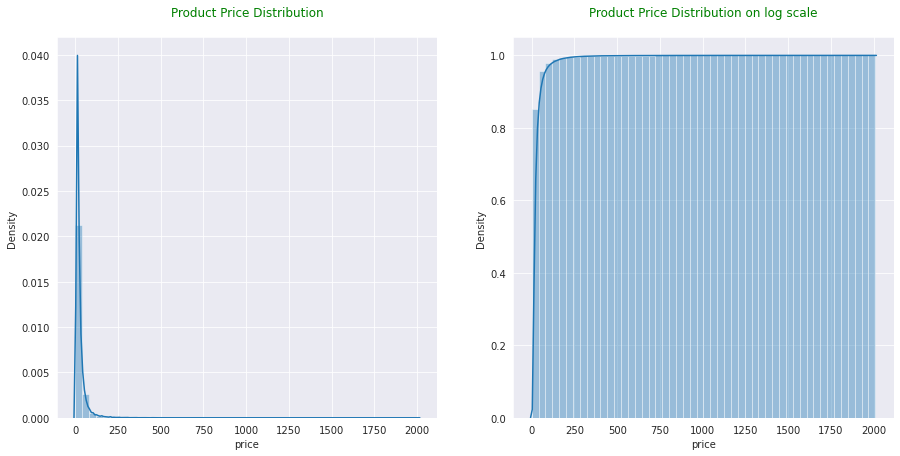

In [ ]:
###Dist Plot

fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(df_train.price,ax=axes[0])
axes[0].set_title(label='Product Price Distribution\n',fontdict={'fontsize':12,'color':'green'})

kwargs = {'cumulative':True}
sns.distplot(df_train.price,hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title(label='Product Price Distribution on log scale\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

We could analyze that most products are having selling price less than 100$

In [ ]:
print('{}% items are having selling prices more than 100$'.format(round((df_train[df_train.price > \
                      float(100)].shape[0]/df_train.shape[0])*100,2)))

2.83% items are having selling prices more than 100$


*   Distribution of Product Price is left skewed(2.83% items are having selling prices more than 100$).

*   Product Price is ranging from 0 to more than 2000$

*   99% price is less than $250, can be visible from cdf plot






<Figure size 720x504 with 0 Axes>

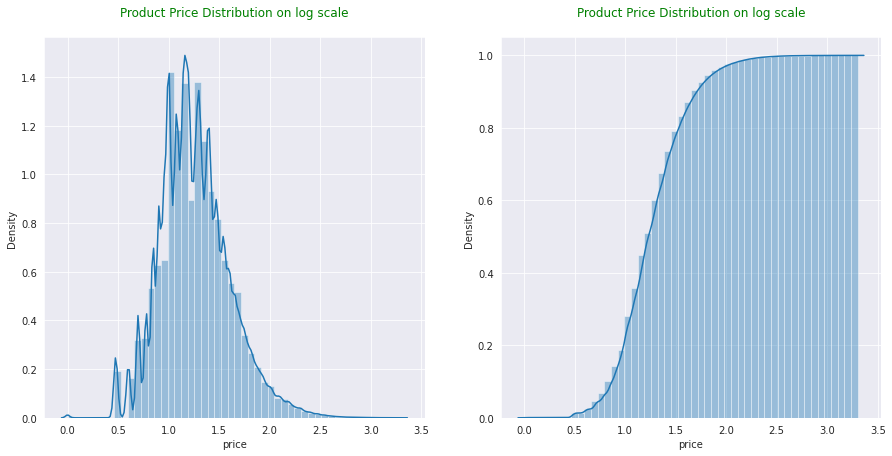

In [ ]:
###Dist Plot

plt.figure(figsize=(10,7))
df_train_log = df_train.copy()
df_train_log['price'] = df_train_log.price.apply(lambda x: np.log10(x) if x > float(0) else np.log10(x+1))

fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(df_train_log.price,ax= axes[0])
axes[0].set_title(label='Product Price Distribution on log scale\n',fontdict={'fontsize':12,'color':'green'})

kwargs = {'cumulative':True}
sns.distplot(df_train_log.price,hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title(label='Product Price Distribution on log scale\n',fontdict={'fontsize':12,'color':'green'})

plt.show()



*   Distribution of price in log scale is follwing similar to Gaussian(Normal) Distribution. Hence, Product price distribution is following similar to log-normal.


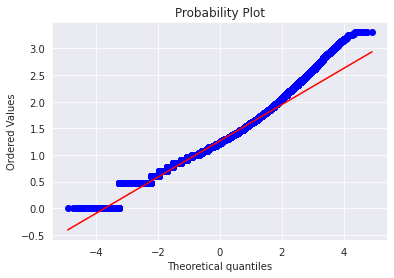

In [ ]:
x,y = stats.probplot(df_train_log['price'],dist = 'norm',plot = plt)
plt.show()

*   QQ plot is showing similar to linear relationship between normal distribution and product price in log scale. Hence, actual selling price following similar to log-normal distribution.


### Deep dive to the Percentiles for Price

In [ ]:
price = df_train.price.to_numpy()
x= PrettyTable(header=False)
for i in range(0,101,10):
  perc = np.percentile(price,i).round(2)
  text = str(i)+'th percentile of Price'
  x.add_row([text,perc])

print(x)

+---------------------------+--------+
|  0th percentile of Price  |  0.0   |
|  10th percentile of Price |  7.0   |
|  20th percentile of Price |  10.0  |
|  30th percentile of Price |  12.0  |
|  40th percentile of Price |  14.0  |
|  50th percentile of Price |  17.0  |
|  60th percentile of Price |  20.0  |
|  70th percentile of Price |  26.0  |
|  80th percentile of Price |  34.0  |
|  90th percentile of Price |  51.0  |
| 100th percentile of Price | 2009.0 |
+---------------------------+--------+


In [ ]:
x= PrettyTable(header=False)
for i in range(90,101,1):
  perc = np.percentile(price,i).round(2)
  text = str(i)+'th percentile of Price'
  x.add_row([text,perc])

print(x)

+---------------------------+--------+
|  90th percentile of Price |  51.0  |
|  91th percentile of Price |  55.0  |
|  92th percentile of Price |  58.0  |
|  93th percentile of Price |  62.0  |
|  94th percentile of Price |  67.0  |
|  95th percentile of Price |  75.0  |
|  96th percentile of Price |  85.0  |
|  97th percentile of Price |  99.0  |
|  98th percentile of Price | 122.0  |
|  99th percentile of Price | 170.0  |
| 100th percentile of Price | 2009.0 |
+---------------------------+--------+


In [ ]:
perc_range = list(np.arange(99,100.1,.1).round(2))
x= PrettyTable(header=False)
for i in perc_range:
  perc = np.percentile(price,i).round(2)
  text = str(i)+'th percentile of Price'
  x.add_row([text,perc])

print(x)

+-----------------------------+--------+
|  99.0th percentile of Price | 170.0  |
|  99.1th percentile of Price | 180.0  |
|  99.2th percentile of Price | 189.0  |
|  99.3th percentile of Price | 200.0  |
|  99.4th percentile of Price | 210.0  |
|  99.5th percentile of Price | 230.57 |
|  99.6th percentile of Price | 256.0  |
|  99.7th percentile of Price | 286.0  |
|  99.8th percentile of Price | 340.0  |
|  99.9th percentile of Price | 450.0  |
| 100.0th percentile of Price | 2009.0 |
+-----------------------------+--------+


In [ ]:
perc_range = list(np.arange(99.90,100.01,.01).round(2))
x= PrettyTable(header=False)
for i in perc_range:
  perc = np.percentile(price,i).round(2)
  text = str(i)+'th percentile of Price'
  x.add_row([text,perc])

print(x)

+-----------------------------+--------+
|  99.9th percentile of Price | 450.0  |
| 99.91th percentile of Price | 459.0  |
| 99.92th percentile of Price | 490.0  |
| 99.93th percentile of Price | 509.0  |
| 99.94th percentile of Price | 556.0  |
| 99.95th percentile of Price | 603.27 |
| 99.96th percentile of Price | 660.0  |
| 99.97th percentile of Price | 734.0  |
| 99.98th percentile of Price | 838.51 |
| 99.99th percentile of Price | 1015.0 |
| 100.0th percentile of Price | 2009.0 |
+-----------------------------+--------+


We could see there is a steady growth of price till 99.99 percentile but the 100th percentile price is way higher which signifies, there is .01 % of products are having way higher selling prices.

###Analyze the Percentage of products where selling price is more than 99.9th percentile

In [ ]:
print('{}% of product selling prices are more than 99.9th percentile'.format(round((df_train[df_train.price > \
                  np.percentile(price,99.9)].shape[0]/df_train.shape[0])*100,5)))

0.0972% of product selling prices are more than 99.9th percentile


We could see there is .0.0972 % of products are having selling prices more than 99.9th percentile.

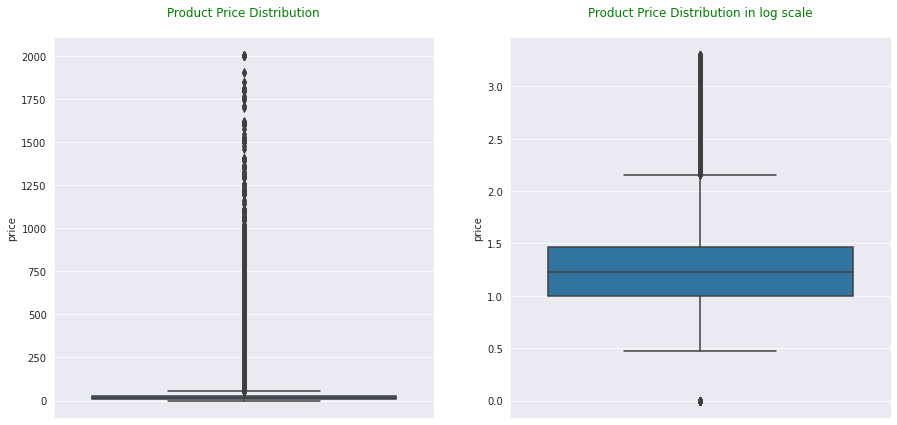

In [ ]:
###Box Plot

fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y = df_train.price,ax = axes[0])
axes[0].set_title(label='Product Price Distribution\n',fontdict={'fontsize':12,'color':'green'})

sns.boxplot(y = df_train_log.price,ax = axes[1])
axes[1].set_title(label='Product Price Distribution in log scale\n',fontdict={'fontsize':12,'color':'green'})

plt.show()

*   price range from 0 to more than 3.5 in log scale. - (0 - $2009 in actual scale)

*   50% item selling price in log scale is around 1.2(USD). 

*   25th percentile of items sold out @1.0(USD) and 75th perecentile products sold out @1.45(USD). IQR(Inter Quartile Range) - 0.45.

*   Zero price and very high price products are visible as outliers.





###**Feature: item_condition_id**

In [ ]:
print('{}% sold products are having no condition stated.'.format(round((df_train.item_condition_id.isnull().sum()/df_train.shape[0])*100),2))

0% sold products are having no condition stated.


In [ ]:
df_train_copy = df_train.copy()
df_train_copy['item_condition_id'] = df_train_copy.item_condition_id.apply(lambda x: item_cat_transform(x))
df_train_copy['shipping'] = df_train_copy.shipping.apply(lambda x: shipping_transform(x))
df_train_copy['price'] = df_train_copy.price.apply(lambda x: np.log10(x) if x !=0 else np.log10(x+1))

In [ ]:
df_train['item_condition_id'] = df_train.item_condition_id.apply(lambda x: item_cat_transform(x))
df_train['shipping'] = df_train.shipping.apply(lambda x: shipping_transform(x))

df_train_log['item_condition_id'] = df_train_log.item_condition_id.apply(lambda x: item_cat_transform(x))
df_train_log['shipping'] = df_train_log.shipping.apply(lambda x: shipping_transform(x))

Feature: item_condition_id
+-------------------+--------+
| item_condition_id | count  |
+-------------------+--------+
|        New        | 640501 |
|        Good       | 432161 |
|      Like New     | 375478 |
|        Fair       | 31962  |
|        Poor       |  2384  |
+-------------------+--------+




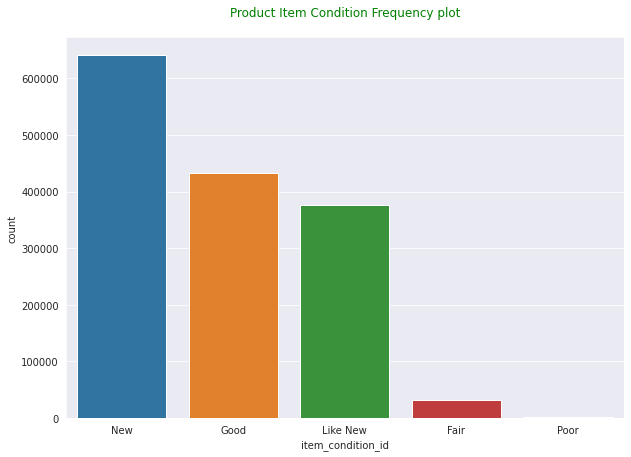

In [ ]:
df_item_cond = pd.DataFrame(df_train.item_condition_id.value_counts())
df_item_cond.reset_index(inplace=True)
df_item_cond.rename(columns={'index':'item_condition_id','item_condition_id':'count'},inplace=True)

print('Feature: item_condition_id')
print(datadisplay(df_item_cond))
print('\n')

plt.figure(figsize=(10,7))
sns.barplot(x= df_item_cond['item_condition_id'], y= df_item_cond['count'],order=df_item_cond.sort_values(by='count',ascending=False)\
            .item_condition_id)
plt.title(label='Product Item Condition Frequency plot\n',fontdict={'fontsize':12,'color':'green'})
plt.show()


*   Variation in frequency of different item condition id's.

*   Products in count with New condition are sold out way higher than products with Poor condition which should be expected.

*   Small variation in products frequency between Good and Like New as products with Good/Like New are like similar in nature.









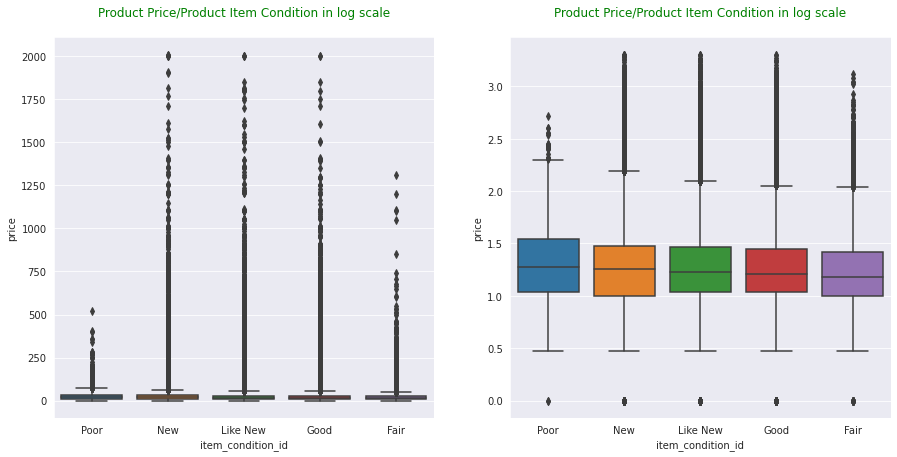

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,7))

order_desc = df_train.groupby('item_condition_id').price.median().sort_values(ascending = False).index
sns.boxplot(x= df_train['item_condition_id'], y= df_train['price'],order= order_desc,ax= axes[0])
axes[0].set_title(label='Product Price/Product Item Condition in log scale\n',fontdict={'fontsize':12,'color':'green'})

order_desc = df_train_copy.groupby('item_condition_id').price.median().sort_values(ascending = False).index
sns.boxplot(x= df_train_copy['item_condition_id'], y= df_train_copy['price'],order= order_desc,ax = axes[1])
axes[1].set_title(label='Product Price/Product Item Condition in log scale\n',fontdict={'fontsize':12,'color':'green'})

plt.show()



*   Products with Poor condition are sold out in higher avg. price than others which is odd. This might be a reason of product with poor conditions are of different categrories like (eg. Electronics) which we will analyze more on it.From New products, avg. selling prices look in order.



**Anova Test(Statistical Testing)**

From boxplot we can conclude item_condition_id is not correlated with the target variable- price as the median price not differs much between sellers-shipped/buyers-shipped.

H0(Null Hypothesis): shipping is not correlated with price.

H1(Alternate Hypothesis): shipping is correlated with price.

In [ ]:
item_condition_id_price = df_train.groupby('item_condition_id')['price'].apply(list)

AnovaResults = f_oneway(*item_condition_id_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  3.2544792527574705e-79
Accept H1


from Anova Test we can conclude that item_condition_id and price is correlated.Hence, item_condition_id can be a good feature to predict price.

Mean Product Price/Product Item Condition
+-------------------+--------------------+
| item_condition_id |       price        |
+-------------------+--------------------+
|        Poor       | 31.703859060402685 |
|      Like New     | 27.563231401040806 |
|       Medium      | 26.540710522235926 |
|        New        | 26.488161610988897 |
|        Good       | 24.34921156373193  |
+-------------------+--------------------+


Median Product Price/Product Item Condition
+-------------------+-------+
| item_condition_id | price |
+-------------------+-------+
|        Poor       |  19.0 |
|        New        |  18.0 |
|      Like New     |  17.0 |
|       Medium      |  16.0 |
|        Good       |  15.0 |
+-------------------+-------+




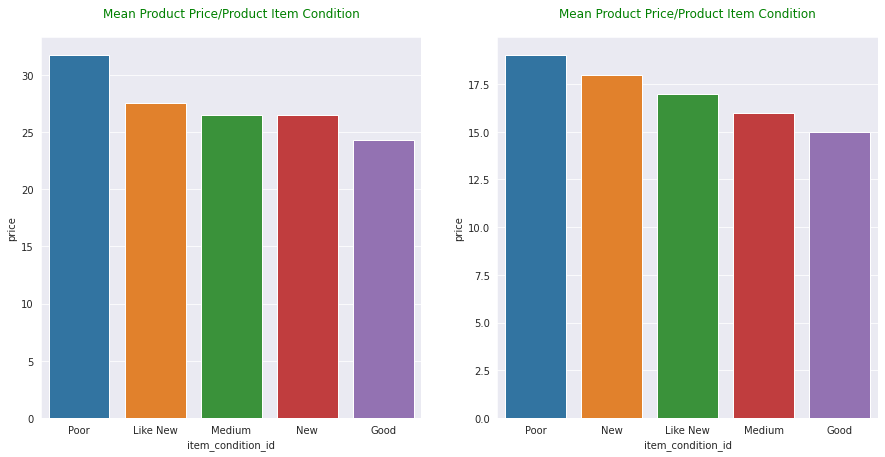

In [ ]:
df_train_item_cond_mean_price = pd.DataFrame(df_train.groupby(by='item_condition_id').price.mean().sort_values(ascending=False))
df_train_item_cond_mean_price.reset_index(inplace = True)

df_train_item_cond_median_price = pd.DataFrame(df_train.groupby(by='item_condition_id').price.median().sort_values(ascending=False))
df_train_item_cond_median_price.reset_index(inplace = True)

print('Mean Product Price/Product Item Condition')
print(datadisplay(df_train_item_cond_mean_price))
print('\n')
print('Median Product Price/Product Item Condition')
print(datadisplay(df_train_item_cond_median_price))
print('\n')

fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x= df_train_item_cond_mean_price['item_condition_id'], y= df_train_item_cond_mean_price['price'],order = \
            df_train_item_cond_mean_price.sort_values(by = 'price',ascending = False).item_condition_id,ax=axes[0])
axes[0].set_title(label='Mean Product Price/Product Item Condition\n',fontdict={'fontsize':12,'color':'green'})
sns.barplot(x= df_train_item_cond_median_price['item_condition_id'], y= df_train_item_cond_median_price['price'],order = \
            df_train_item_cond_median_price.sort_values(by = 'price',ascending = False).item_condition_id,ax=axes[1])
axes[1].set_title(label='Mean Product Price/Product Item Condition\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Item with Poor Condition is having higher average price than others.Though condition id is an ordinal feature, The price for items with these conditions doesn't vary with the item conditions. As stated earlier, This might be a reason of product with poor conditions are of different categrories like (eg. Electronics) which we will analyze more towards it.

99.9 Percentile Product Price/Product Item Condition
+-------------------+--------+
| item_condition_id | price  |
+-------------------+--------+
|       Medium      | 500.0  |
|      Like New     | 500.0  |
|        Good       | 409.0  |
|        Poor       | 384.06 |
|        New        | 375.0  |
+-------------------+--------+




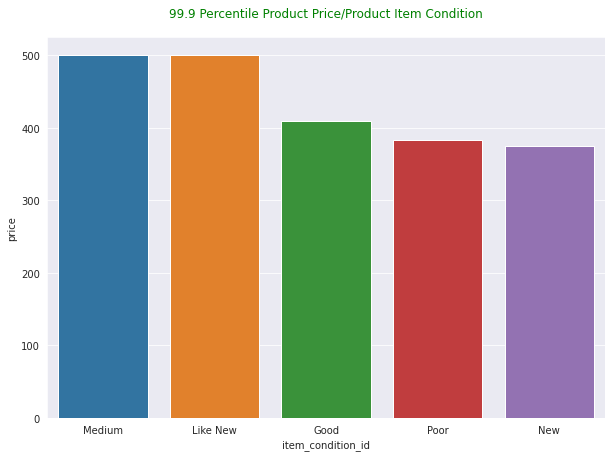

In [ ]:
df_train_item_cond_price = pd.DataFrame(df_train.groupby(by='item_condition_id').price.quantile(.999).round(2).sort_values(ascending=False))
df_train_item_cond_price.reset_index(inplace = True)

print('99.9 Percentile Product Price/Product Item Condition')
print(datadisplay(df_train_item_cond_price))
print('\n')

plt.figure(figsize=(10,7))
sns.barplot(x= df_train_item_cond_price['item_condition_id'], y= df_train_item_cond_price['price'],order = \
            df_train_item_cond_price.sort_values(by = 'price',ascending = False).item_condition_id)
plt.title(label='99.9 Percentile Product Price/Product Item Condition\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

If we look at items with price @99.9 percentile, Item with Medium Condition is having selling price similar like 'Like New' Products but having higher average price than others.Though condition id is an ordinal feature, The price for items with these conditions doesn't vary with the item conditions.

###**Feature: shipping**

In [ ]:
print('{}% sold products are having no shipping status stated.'.format(round((df_train.shipping.isnull().sum()/df_train.shape[0])*100),2))

0% sold products are having no shipping status stated.


Feature: Shipping
+-----------------+--------+
|     shipping    | count  |
+-----------------+--------+
|  Buyers-Shipped | 819427 |
| Sellers-Shipped | 663059 |
+-----------------+--------+




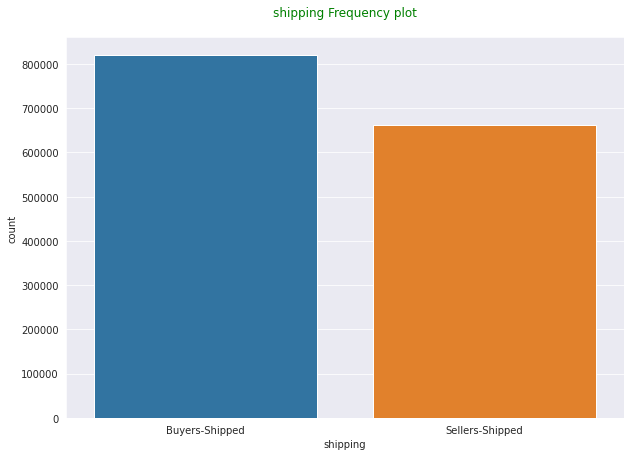

In [ ]:
df_shipping = pd.DataFrame(df_train.shipping.value_counts())
df_shipping.reset_index(inplace=True)
df_shipping.rename(columns={'index':'shipping','shipping':'count'},inplace=True)

print('Feature: Shipping')
print(datadisplay(df_shipping))
print('\n')

plt.figure(figsize=(10,7))
sns.barplot(x= df_shipping['shipping'], y= df_shipping['count'],order=df_shipping.sort_values(by='count',ascending=False)\
            .shipping)
plt.title(label='shipping Frequency plot\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Buyers have paid shippment charges in most products instead of Selllers due to interest on the items. 

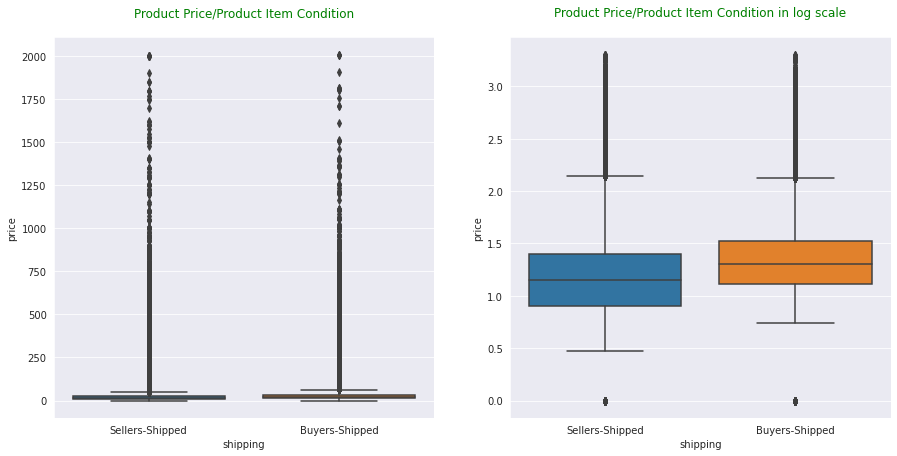

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.boxplot(x= df_train['shipping'], y= df_train['price'],ax = axes[0])
axes[0].set_title(label='Product Price/Product Item Condition\n',fontdict={'fontsize':12,'color':'green'})

sns.boxplot(x= df_train_copy['shipping'], y= df_train_copy['price'],ax = axes[1])
axes[1].set_title(label='Product Price/Product Item Condition in log scale\n',fontdict={'fontsize':12,'color':'green'})

plt.show()

As buyers have paid shipping charges in most cases, the selling price are higher than sellers being paid the shippment charges which should be usual. It might be due to different geography but as we don't have sufficient data which can't analyze the same.

**Anova Test(Statistical Testing)**

From boxplot we can conclude shipping is correlated with the target variable- price as the median price differs between sellers-shipped/buyers-shipped.

H0(Null Hypothesis): shipping is correlated with price.

H1(Alternate Hypothesis): shipping is not correlated with price.

In [ ]:
shipping_price = df_train.groupby('shipping')['price'].apply(list)

AnovaResults = f_oneway(*shipping_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that shipping and price is not correlated.

Mean Product Price/Product shipping
+-----------------+--------------------+
|     shipping    |       price        |
+-----------------+--------------------+
|  Buyers-Shipped | 1.3372689666194264 |
| Sellers-Shipped | 1.1741974716993062 |
+-----------------+--------------------+




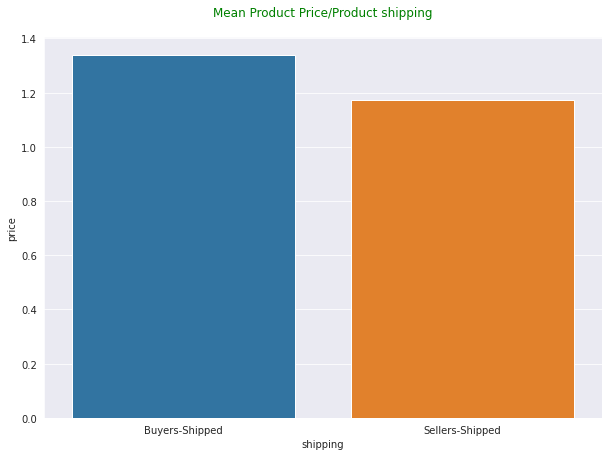

In [ ]:
df_train_shipping_price = pd.DataFrame(df_train_copy.groupby(by='shipping').price.mean().sort_values(ascending=False))
df_train_shipping_price.reset_index(inplace = True)

print('Mean Product Price/Product shipping')
print(datadisplay(df_train_shipping_price))
print('\n')

plt.figure(figsize=(10,7))
sns.barplot(x= df_train_shipping_price['shipping'], y= df_train_shipping_price['price'],order = \
            df_train_shipping_price.sort_values(by = 'price',ascending = False).shipping)
plt.title(label='Mean Product Price/Product shipping\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Buyers have paid shipping charges in most cases.Avg. selling price for products where shipping charges are borne by buyers is higher than sellers paid the shippment charges.

###**Feature: brand_name**

In [ ]:
missing_brand_name_perc = round((df_train.brand_name.isnull().sum()/df_train.shape[0])*100,2)
print('{} % of brand_name categories are missing'.format(missing_brand_name_perc))

42.67 % of brand_name categories are missing


###Replace missing brand_name category as 'Missing'

In [ ]:
df_train.brand_name.fillna('Missing',inplace=True)
df_train_log.brand_name.fillna('Missing',inplace=True)
df_train_copy.brand_name.fillna('Missing',inplace=True)

In [ ]:
def brand_name_text_preprocess(phrase):
  phrase = re.sub(r'[^\w\s]', '', phrase) ### Ref: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
  phrase = phrase.lower()
  return phrase

In [ ]:
df_train.brand_name = df_train.brand_name.apply(lambda x: brand_name_text_preprocess(x) )
df_train_log.brand_name = df_train.brand_name
df_train_copy.brand_name = df_train.brand_name

Feature: brand_name
--------------------
Total #of brand names - 4799
Top 20 Popular Brand Names
+------------------+--------------------+
|    brand_name    |   Percentage(%)    |
+------------------+--------------------+
|     missing      | 42.67433216907276  |
|       pink       | 3.6484661575218924 |
|       nike       | 3.6454307157032177 |
| victorias secret | 3.2401655057788066 |
|     lularoe      | 2.092701044057077  |
|      apple       | 1.1684427374019046 |
|    forever 21    | 1.0243604324088051 |
|     nintendo     | 1.0122861193967432 |
|    lululemon     | 0.9819991554726317 |
|   michael kors   | 0.9395029700111839 |
|  american eagle  | 0.8940387969936984 |
|     rae dunn     | 0.8300247017509776 |
|     sephora      | 0.8210532848202277 |
|      coach       | 0.7057739499732206 |
|      disney      | 0.6988261609215871 |
| bath  body works | 0.6984214353457638 |
|      adidas      | 0.6881683874249065 |
|      funko       | 0.6230750239799904 |
|   under armour   | 

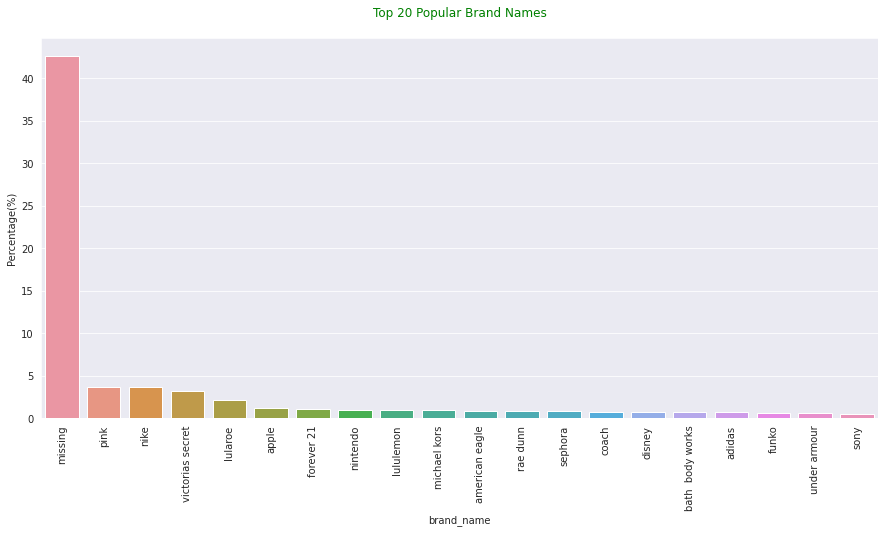

In [ ]:
df_train_popular_brand_name = pd.DataFrame(df_train.brand_name.value_counts().sort_values(ascending = False).head(20))
df_train_popular_brand_name.reset_index(inplace = True)
df_train_popular_brand_name.rename(columns={'index':'brand_name','brand_name':'Percentage(%)'},inplace=True)
df_train_popular_brand_name['Percentage(%)'] = df_train_popular_brand_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: brand_name')
print('-'*20)
print('Total #of brand names - {}'.format(len(list(df_train.brand_name.unique()))))
print('Top 20 Popular Brand Names')
print(datadisplay(df_train_popular_brand_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_popular_brand_name.brand_name, y = df_train_popular_brand_name['Percentage(%)'])
plt.title(label='Top 20 Popular Brand Names\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation='vertical')
plt.show()



*   Most of the products sold out without any brand name mentioned.
*   Pink,Nike,Victoria's Secret,Apple are among the top popular brands.



Feature: brand_name
--------------------
Top 20 disliked Brand Names
+-------------------+-----------------------+
|     brand_name    |     Percentage(%)     |
+-------------------+-----------------------+
|     chann luu     | 6.745426263721883e-05 |
|      gigatent     | 6.745426263721883e-05 |
|    plasticolor    | 6.745426263721883e-05 |
|      technics     | 6.745426263721883e-05 |
|     crossroads    | 6.745426263721883e-05 |
|      up vibe      | 6.745426263721883e-05 |
| danielson designs | 6.745426263721883e-05 |
|     fast lane     | 6.745426263721883e-05 |
|      thelees      | 6.745426263721883e-05 |
|   naomi  nicole   | 6.745426263721883e-05 |
|      lamarque     | 6.745426263721883e-05 |
|     grand slam    | 6.745426263721883e-05 |
|     bejeweled     | 6.745426263721883e-05 |
|       oasis       | 6.745426263721883e-05 |
|    c o bigelow    | 6.745426263721883e-05 |
|       replay      | 6.745426263721883e-05 |
|     lucky dog     | 6.745426263721883e-05 |
|      wb g

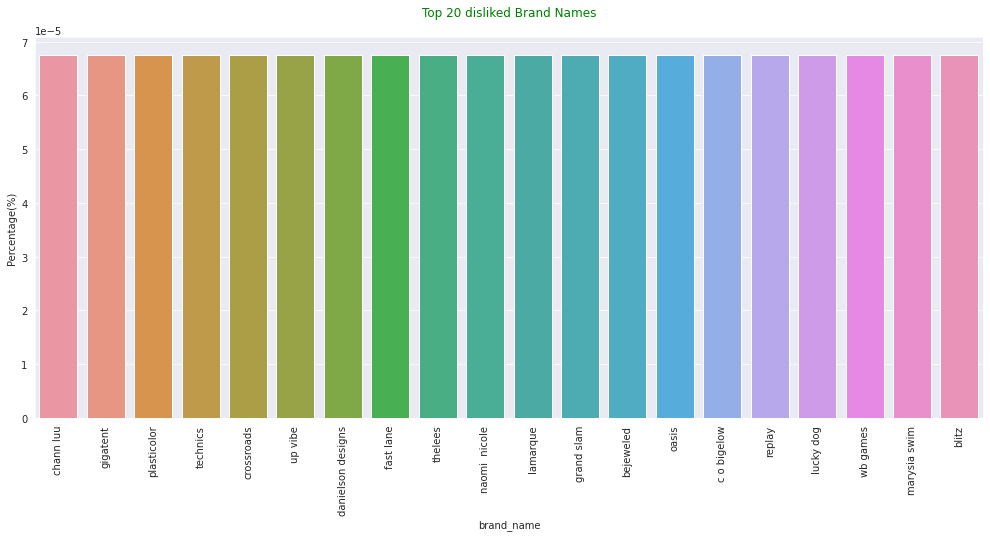

In [ ]:
df_train_disliked_brand_name = pd.DataFrame(df_train.brand_name.value_counts().sort_values(ascending = True).head(20))
df_train_disliked_brand_name.reset_index(inplace = True)
df_train_disliked_brand_name.rename(columns={'index':'brand_name','brand_name':'Percentage(%)'},inplace=True)
df_train_disliked_brand_name['Percentage(%)'] = df_train_disliked_brand_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: brand_name')
print('-'*20)
print('Top 20 disliked Brand Names')
print(datadisplay(df_train_disliked_brand_name))
print('\n')

plt.figure(figsize=(17,7))
sns.barplot(x = df_train_disliked_brand_name.brand_name, y = df_train_disliked_brand_name['Percentage(%)'])
plt.title(label='Top 20 disliked Brand Names\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation='vertical')
plt.show()

chann luu,gigatent,plasticolor are among the top disliked brands where one product from each brands sold out.

###**brand_name vs price**

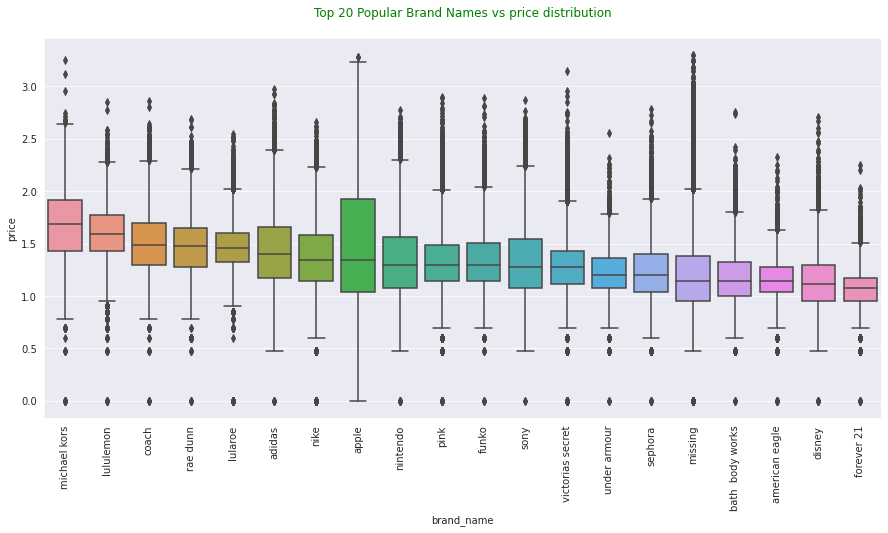

In [ ]:
df_train_popular_brand_price = df_train_log[df_train_log.brand_name.isin(df_train_popular_brand_name.brand_name)]
order_desc = df_train_popular_brand_price.groupby('brand_name').price.median().sort_values(ascending = False).index

plt.figure(figsize=(15,7))
sns.boxplot(x= df_train_popular_brand_price.brand_name, y= df_train_popular_brand_price.price,order = order_desc)
plt.title(label='Top 20 Popular Brand Names vs price distribution\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Out of top 20 brands, Michael Kors is having higher avg. selling price than others.

Feature: brand_name
--------------------
Top 20 Expensive price Brand Names
+------------------+--------+
|    brand_name    | price  |
+------------------+--------+
|      chanel      | 2009.0 |
|   david yurman   | 2004.0 |
|     mary kay     | 2000.0 |
|     missing      | 2000.0 |
|      apple       | 1909.0 |
|  louis vuitton   | 1815.0 |
|      celine      | 1806.0 |
|   michael kors   | 1770.0 |
|  saint laurent   | 1700.0 |
|   urban decay    | 1515.0 |
|    microsoft     | 1400.0 |
| victorias secret | 1400.0 |
|  mcm worldwide   | 1359.0 |
|     stamped      | 1354.0 |
|      prada       | 1350.0 |
|      goyard      | 1350.0 |
|      gucci       | 1325.0 |
|      oakley      | 1309.0 |
|       bose       | 1250.0 |
|       dell       | 1215.0 |
+------------------+--------+




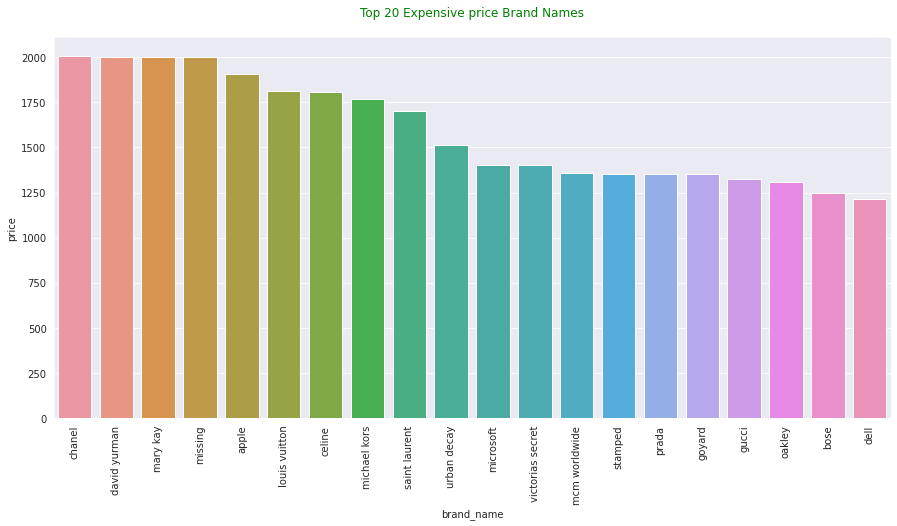

In [ ]:
df_train_top20_expensive_price_brand_name = pd.DataFrame(df_train.groupby('brand_name').price.max().sort_values(ascending = False).head(20))
df_train_top20_expensive_price_brand_name.reset_index(inplace = True)

print('Feature: brand_name')
print('-'*20)
print('Top 20 Expensive price Brand Names')
print(datadisplay(df_train_top20_expensive_price_brand_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x= df_train_top20_expensive_price_brand_name.brand_name, y= df_train_top20_expensive_price_brand_name.price)
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 Expensive price Brand Names\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Chanel,David Yurman,Mary Kay are among top expensive selling brands.

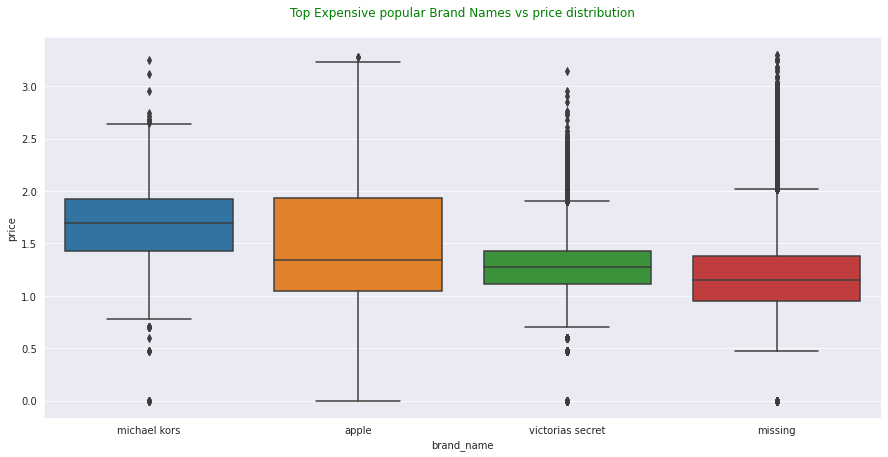

In [ ]:
Top_popular_brand_names = df_train_top20_expensive_price_brand_name[df_train_top20_expensive_price_brand_name.brand_name\
                                                                    .isin(df_train_popular_brand_name.brand_name)].brand_name

df_train_popular_brand_price = df_train_log[df_train_log.brand_name.isin(Top_popular_brand_names)]
order_desc = df_train_popular_brand_price.groupby('brand_name').price.median().sort_values(ascending = False).index

plt.figure(figsize=(15,7))
sns.boxplot(x= df_train_popular_brand_price.brand_name, y= df_train_popular_brand_price.price,order = order_desc)
plt.title(label='Top Expensive popular Brand Names vs price distribution\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

out of top expensive brands, Michael Kors, Apple, Victoria's Secret are also popular brands. So for these brands the selling price should be very high.

Feature: brand_name
--------------------
Top 20 avg.price Brand Names
+---------------------+--------+
|      brand_name     | price  |
+---------------------+--------+
|       demdaco       | 429.0  |
|   proenza schouler  | 413.25 |
|      auto meter     | 344.0  |
|         oris        | 300.0  |
|    mcm worldwide    | 289.17 |
|       longines      | 254.0  |
|       vitamix       | 253.11 |
|       blendtec      | 251.8  |
|     david yurman    | 248.61 |
|        celine       | 238.78 |
|    saint laurent    | 232.58 |
|     canada goose    | 230.25 |
|       dainese       | 230.0  |
|  valentino garavani | 227.0  |
| frédérique constant | 224.0  |
|       mackage       | 221.0  |
|       michele       | 216.98 |
|      tag heuer      | 206.12 |
|    alexander wang   | 205.7  |
|        irobot       | 204.5  |
+---------------------+--------+




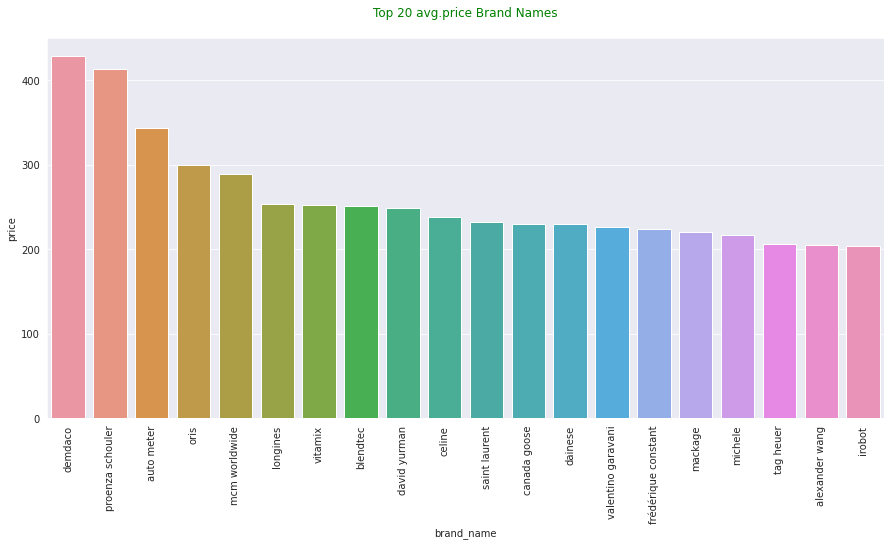

In [ ]:
df_train_top20_avg_price_brand_name = pd.DataFrame(df_train.groupby('brand_name').price.mean().round(2).sort_values(ascending = False).head(20))
df_train_top20_avg_price_brand_name.reset_index(inplace = True)

print('Feature: brand_name')
print('-'*20)
print('Top 20 avg.price Brand Names')
print(datadisplay(df_train_top20_avg_price_brand_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x= df_train_top20_avg_price_brand_name.brand_name, y= df_train_top20_avg_price_brand_name.price)
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 avg.price Brand Names\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Demdaco,Proenza Schouler,Auto Meter are among the top brands whose products sold avg. high price.

**Anova Test(Statistical Testing)**

From boxplot we can conclude brand_name is correlated with the target variable- price as the median price differs between brands.

H0(Null Hypothesis): brand_name is correlated with price.

H1(Alternate Hypothesis): brand_name is not correlated with price.

In [ ]:
brand_name_price = df_train.groupby('brand_name')['price'].apply(list)

AnovaResults = f_oneway(*brand_name_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that brand_name and price is not correlated.Hence price will not affect much based upon this feature in ML model.

###**Feature: item_condition_id vs brand_name**

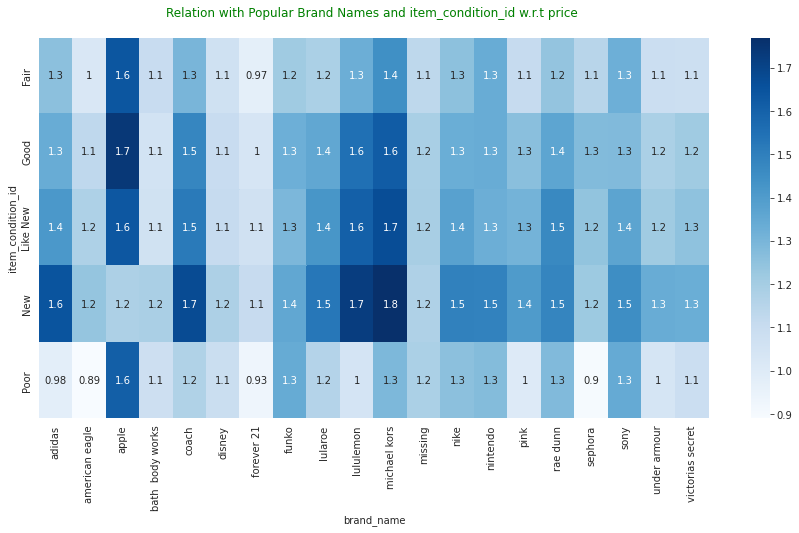

In [ ]:
df_train_log_brand = df_train_log[df_train_log.brand_name.isin(df_train_popular_brand_name.brand_name)]
tbl = df_train_log_brand.pivot_table(values='price', index='item_condition_id', columns='brand_name', aggfunc='mean')

plt.figure(figsize=(15,7))
sns.heatmap(tbl,annot=True,cmap='Blues')
plt.title(label='Relation with Popular Brand Names and item_condition_id w.r.t price \n',fontdict={'fontsize':12,'color':'green'})
plt.show()


*   Michael Kors, Apple, coach products among the top popular brands are sold in higher prices ir-respective of their condition.

*   New Adidas,lululemon products sold out in higher price.






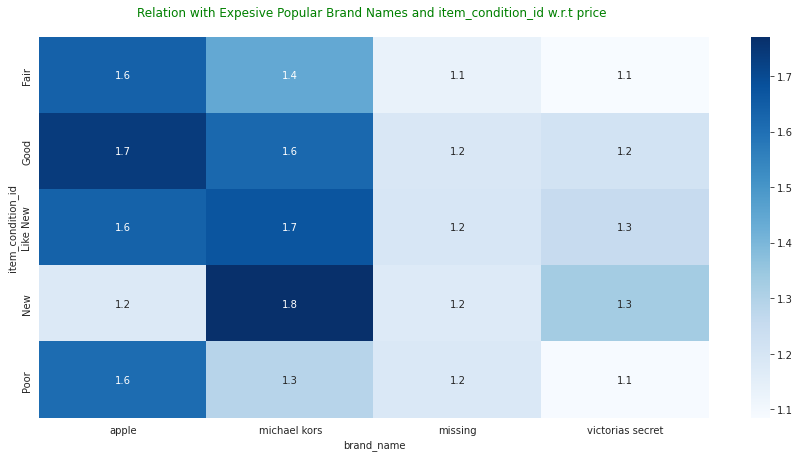

In [ ]:
tbl = df_train_popular_brand_price.pivot_table(values='price', index='item_condition_id', columns='brand_name', aggfunc='mean')

plt.figure(figsize=(15,7))
sns.heatmap(tbl,annot=True,cmap='Blues')
plt.title(label='Relation with Expesive Popular Brand Names and item_condition_id w.r.t price \n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Michale Kors, Apple products among the top expensive popular brands are sold in higher prices ir-respective of their condition.

###**Feature: shipping vs brand_name**

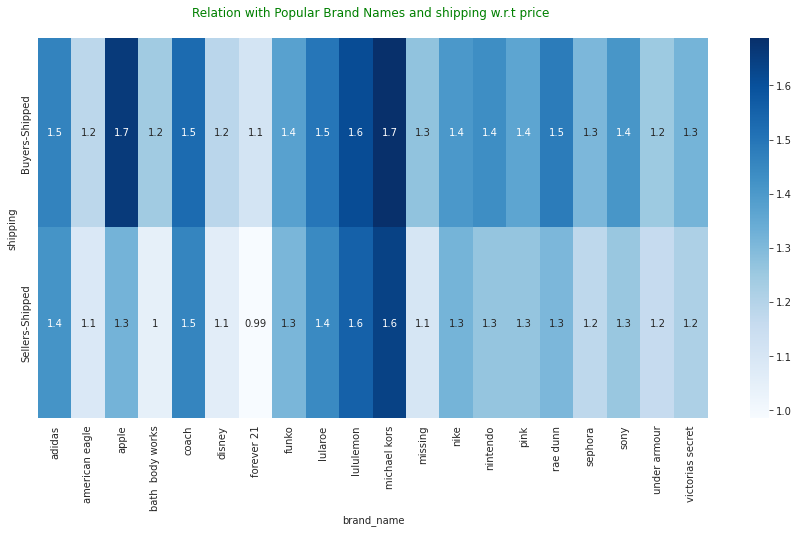

In [ ]:
df_train_log_brand = df_train_log[df_train_log.brand_name.isin(df_train_popular_brand_name.brand_name)]
tbl = df_train_log_brand.pivot_table(values='price', index='shipping', columns='brand_name', aggfunc='mean')

plt.figure(figsize=(15,7))
sns.heatmap(tbl,annot=True,cmap='Blues')
plt.title(label='Relation with Popular Brand Names and shipping w.r.t price \n',fontdict={'fontsize':12,'color':'green'})
plt.show()

*   Michale Kors, Apple, caoch, Adidas products among the top popular brands are sold in higher prices ir-respective of their shippment type.


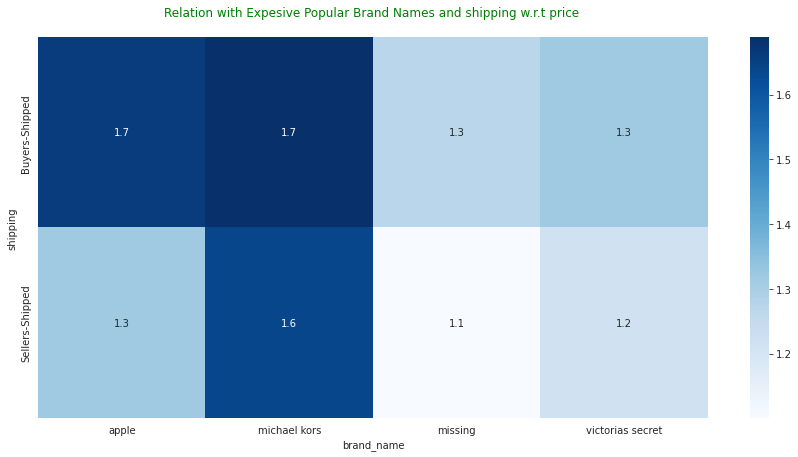

In [ ]:
tbl = df_train_popular_brand_price.pivot_table(values='price', index='shipping', columns='brand_name', aggfunc='mean')

plt.figure(figsize=(15,7))
sns.heatmap(tbl,annot=True,cmap='Blues')
plt.title(label='Relation with Expesive Popular Brand Names and shipping w.r.t price \n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Michale Kors, Apple products among the top expensive popular brands are sold in higher prices ir-respective of their shippment type.

###**Feature: Category_name**

In [ ]:
perc_category_mising = (df_train.category_name.isnull().sum()/df_train.shape[0])*100
print('{} % products with missing category'.format(perc_category_mising.round(2)))

0.43 % products with missing category


In [ ]:
df_train.category_name.fillna('Missing',inplace=True)
df_train_log.category_name.fillna('Missing',inplace=True)
df_train_copy.category_name.fillna('Missing',inplace=True)

Feature: category_name
--------------------
Total categories: 1288
Top 20 Popular categories:
+-------------------------------------------------------------+--------------------+
|                        category_name                        |   Percentage(%)    |
+-------------------------------------------------------------+--------------------+
|        Women/Athletic Apparel/Pants, Tights, Leggings       | 4.0591277084572805 |
|                Women/Tops & Blouses/T-Shirts                | 3.1285287011142096 |
|                      Beauty/Makeup/Face                     |  2.31577229059836  |
|                      Beauty/Makeup/Lips                     | 2.0174220869539408 |
|           Electronics/Video Games & Consoles/Games          | 1.7913828528566205 |
|                      Beauty/Makeup/Eyes                     | 1.700589415346924  |
| Electronics/Cell Phones & Accessories/Cases, Covers & Skins | 1.6644339305733749 |
|                     Women/Underwear/Bras              

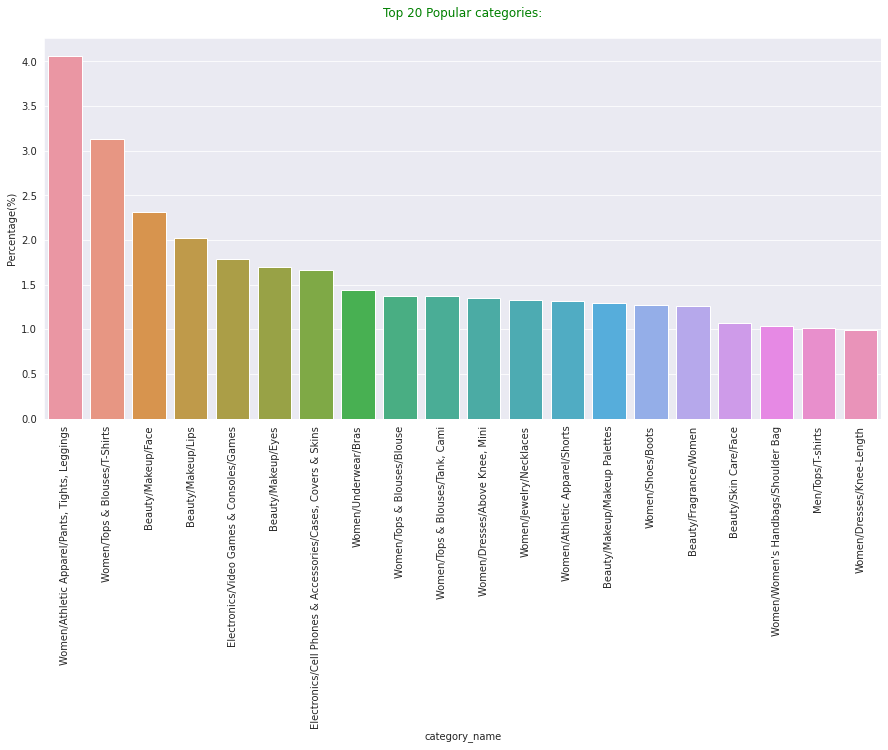

In [ ]:
df_train_top20_category_name = pd.DataFrame(df_train.category_name.value_counts().sort_values(ascending = False).head(20))
df_train_top20_category_name.reset_index(inplace = True)
df_train_top20_category_name.rename(columns={'index':'category_name','category_name':'Percentage(%)'},inplace=True)
df_train_top20_category_name['Percentage(%)'] = df_train_top20_category_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: category_name')
print('-'*20)
print('Total categories: {}'.format(len(list(df_train.category_name.unique()))))
print('Top 20 Popular categories:')
print(datadisplay(df_train_top20_category_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_top20_category_name.category_name,y = df_train_top20_category_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 Popular categories:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Women's Atheletic apparels(Pants, Tights, Leggings) are sold out in highest quantity.

Feature: category_name
--------------------
Least 20 disliked categories:
+----------------------------------------------+-----------------------+
|                category_name                 |     Percentage(%)     |
+----------------------------------------------+-----------------------+
| Handmade/Dolls and Miniatures/Child Friendly | 6.745426263721883e-05 |
|           Handmade/Furniture/Other           | 6.745426263721883e-05 |
|  Vintage & Collectibles/Paper Ephemera/Map   | 6.745426263721883e-05 |
|             Handmade/Quilts/Trim             | 6.745426263721883e-05 |
|            Handmade/Knitting/Doll            | 6.745426263721883e-05 |
|    Handmade/Ceramics and Pottery/Jewelry     | 6.745426263721883e-05 |
|        Handmade/Woodworking/Supplies         | 6.745426263721883e-05 |
|       Handmade/Woodworking/Accessories       | 6.745426263721883e-05 |
|  Other/Magazines/International Publications  | 6.745426263721883e-05 |
|      Kids/Diapering/Washcloths & Towels      | 6

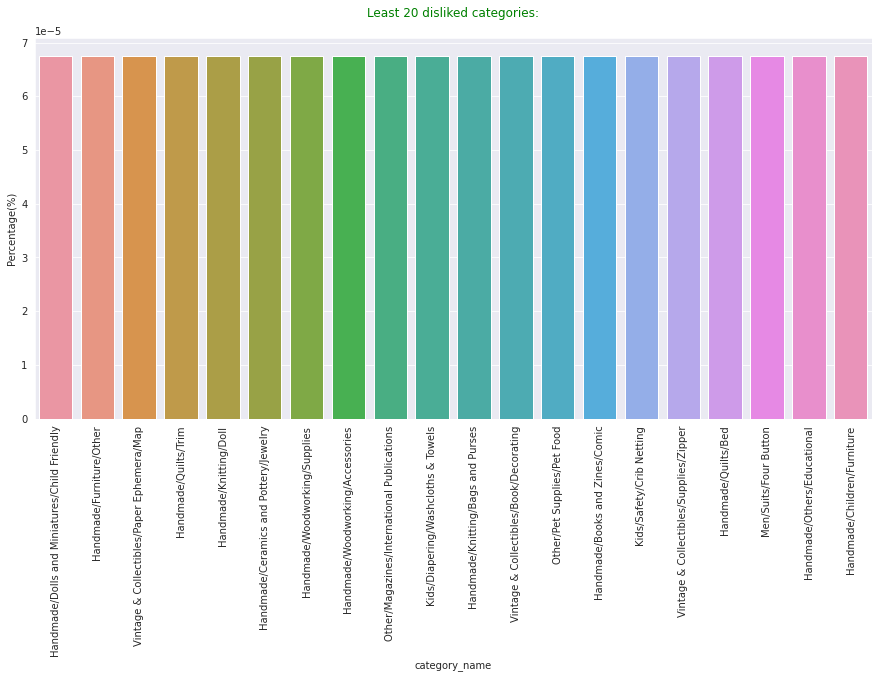

In [ ]:
df_train_least20_category_name = pd.DataFrame(df_train.category_name.value_counts().sort_values(ascending = True).head(20))
df_train_least20_category_name.reset_index(inplace = True)
df_train_least20_category_name.rename(columns={'index':'category_name','category_name':'Percentage(%)'},inplace=True)
df_train_least20_category_name['Percentage(%)'] = df_train_least20_category_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: category_name')
print('-'*20)
print('Least 20 disliked categories:')
print(datadisplay(df_train_least20_category_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_least20_category_name.category_name,y = df_train_least20_category_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Least 20 disliked categories:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Handmade Frames,Garbage Disposals are sold out in lowest quantity.

###Spliting Category in Hierarchy(**Feature Engineering**)

In [ ]:
df_train['Tier1_category_name'] = df_train.category_name.apply(lambda x: x.split('/')[0].lower() if len(x.split('/')) > 0 else x)
df_train['Tier2_category_name'] = df_train.category_name.apply(lambda x: x.split('/')[1].lower() if len(x.split('/')) > 1 else x)
df_train['Tier3_category_name'] = df_train.category_name.apply(lambda x: x.split('/')[2].lower() if len(x.split('/')) > 2 else x)
df_train.drop(columns = 'category_name', inplace = True)

In [ ]:
df_train_log['Tier1_category_name'] = df_train_log.category_name.apply(lambda x: x.split('/')[0].lower() if len(x.split('/')) > 0 else x)
df_train_log['Tier2_category_name'] = df_train_log.category_name.apply(lambda x: x.split('/')[1].lower() if len(x.split('/')) > 1 else x)
df_train_log['Tier3_category_name'] = df_train_log.category_name.apply(lambda x: x.split('/')[2].lower() if len(x.split('/')) > 2 else x)
df_train_log.drop(columns = 'category_name', inplace = True)

In [ ]:
df_train_copy['Tier1_category_name'] = df_train_copy.category_name.apply(lambda x: x.split('/')[0].lower() if len(x.split('/')) > 0 else x)
df_train_copy['Tier2_category_name'] = df_train_copy.category_name.apply(lambda x: x.split('/')[1].lower() if len(x.split('/')) > 1 else x)
df_train_copy['Tier3_category_name'] = df_train_copy.category_name.apply(lambda x: x.split('/')[2].lower() if len(x.split('/')) > 2 else x)
df_train_copy.drop(columns = 'category_name', inplace = True)

###Category Data Pre-Processing

In [ ]:
df_train.Tier1_category_name = df_train.Tier1_category_name.apply(lambda x: text_preprocess(x))
df_train.Tier2_category_name = df_train.Tier2_category_name.apply(lambda x: text_preprocess(x))
df_train.Tier3_category_name = df_train.Tier3_category_name.apply(lambda x: text_preprocess(x))

df_train_copy.Tier1_category_name = df_train.Tier1_category_name
df_train_copy.Tier2_category_name = df_train.Tier2_category_name
df_train_copy.Tier3_category_name = df_train.Tier3_category_name

df_train_log.Tier1_category_name = df_train.Tier1_category_name
df_train_log.Tier2_category_name = df_train.Tier2_category_name
df_train_log.Tier3_category_name = df_train.Tier3_category_name

In [ ]:
print('missing count in Tier 1 catgeory post pre-processing is :{}'.format(df_train.Tier1_category_name.isnull().sum()))
print('missing count in Tier 2 catgeory post pre-processing is :{}'.format(df_train.Tier1_category_name.isnull().sum()))
print('missing count in Tier 3 catgeory post pre-processing is :{}'.format(df_train.Tier1_category_name.isnull().sum()))

missing count in Tier 1 catgeory post pre-processing is :0
missing count in Tier 2 catgeory post pre-processing is :0
missing count in Tier 3 catgeory post pre-processing is :0


Feature: parent_category_name
--------------------
+-----------------------+--------------------+
|  Tier1_category_name  |   Percentage(%)    |
+-----------------------+--------------------+
|         women         | 44.81526301091545  |
|         beauty        | 14.01787268142836  |
|          kids         | 11.581087443658827 |
|      electronics      | 8.275491303121917  |
|          men          | 6.318912961066749  |
|          home         | 4.578120805188042  |
|        missing        | 3.4849570248892734 |
| vintage  collectibles | 3.138646840509792  |
|        handmade       | 2.080222005469192  |
|    sports  outdoors   | 1.7094259237523997 |
+-----------------------+--------------------+




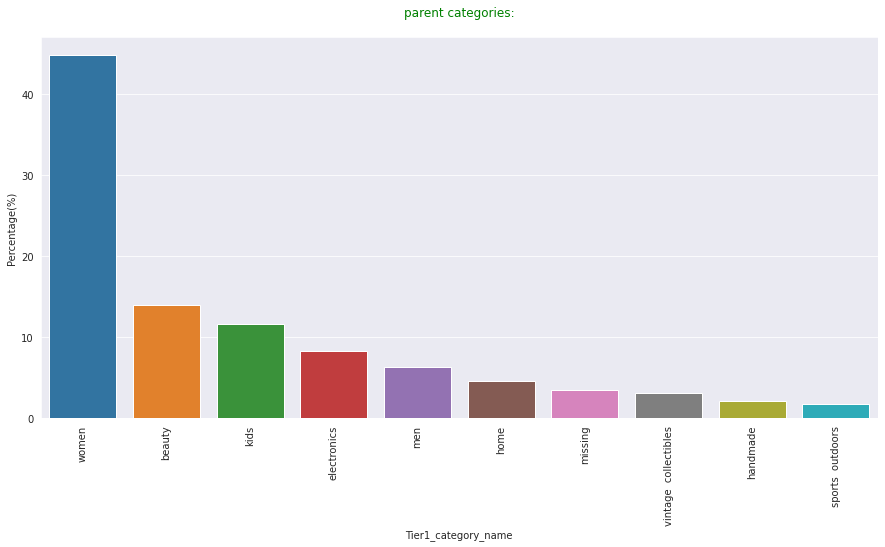

In [ ]:
df_train_Tier1_category_name = pd.DataFrame(df_train.Tier1_category_name.value_counts().sort_values(ascending = False))
df_train_Tier1_category_name.reset_index(inplace = True)
df_train_Tier1_category_name.rename(columns={'index':'Tier1_category_name','Tier1_category_name':'Percentage(%)'},inplace=True)
df_train_Tier1_category_name['Percentage(%)'] = df_train_Tier1_category_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: parent_category_name')
print('-'*20)
print(datadisplay(df_train_Tier1_category_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_Tier1_category_name.Tier1_category_name,y = df_train_Tier1_category_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='parent categories:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Women products are sold out in highest quantity.

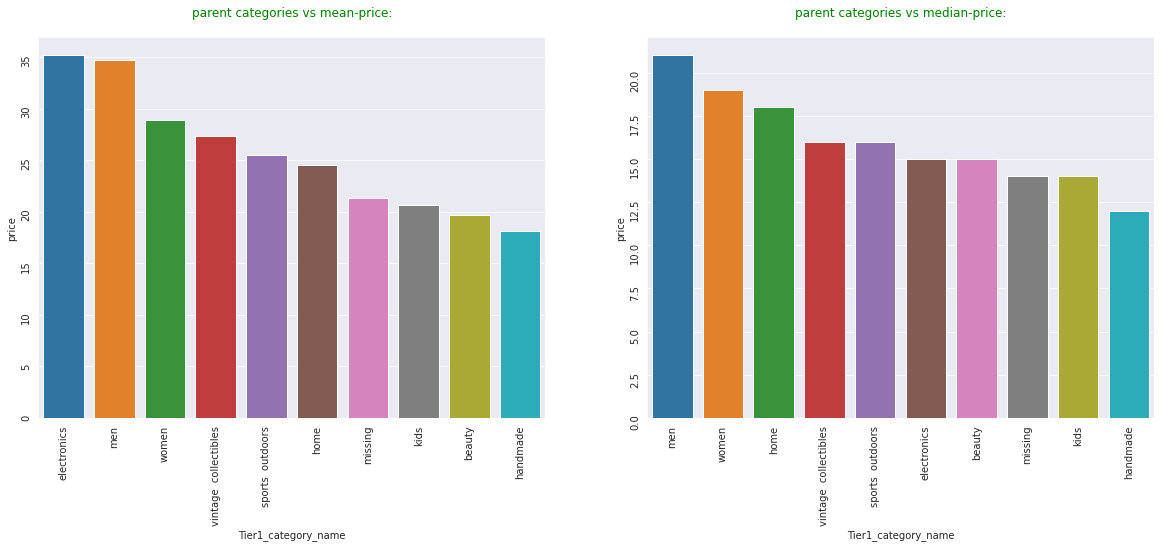

In [ ]:
dict_f = {0:pd.DataFrame(df_train.groupby(['Tier1_category_name']).price.mean().sort_values(ascending=False))\
          ,1:pd.DataFrame(df_train.groupby(['Tier1_category_name']).price.median().sort_values(ascending=False))}
fig, axes = plt.subplots(1,2,figsize=(20,7))
for i in range(2):
  df_price_parent_cat = dict_f[i]
  df_price_parent_cat.reset_index(inplace=True)
  sns.barplot(ax = axes[i], x= df_price_parent_cat.Tier1_category_name, y= df_price_parent_cat.price)
  axes[i].set_title(label='parent categories vs {}-price:\n'.format('mean' if i==0 else 'median'),fontdict={'fontsize':12,'color':'green'})
  axes[i].tick_params(labelrotation= 90)
plt.show()



*   Electronics products are having highest avg. selling price.
*   Men products are having highest median selling price. The discrepancy in records because Electronics products are having more selling price than Men products. Such as Apple Product selling price should be higher than Men Jeans Price.



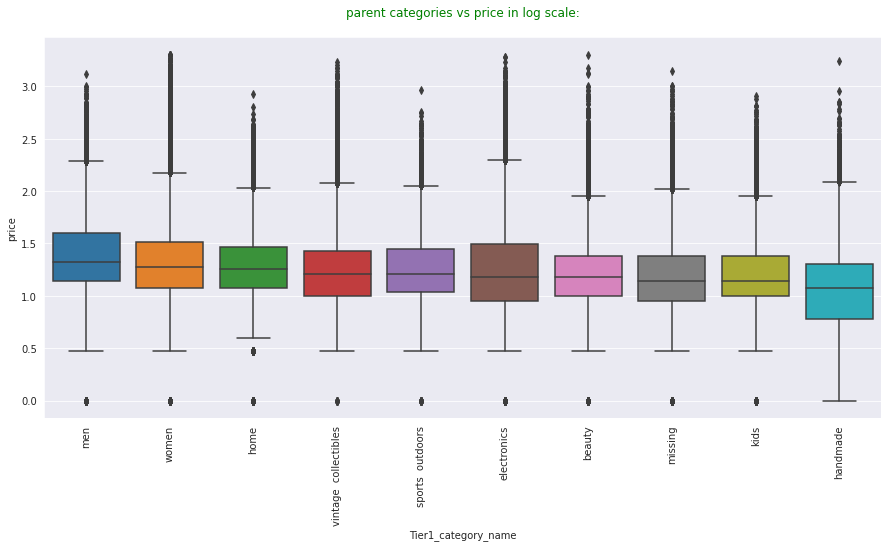

In [ ]:
plt.figure(figsize=(15,7))
order_desc = df_train_log.groupby('Tier1_category_name').price.median().sort_values(ascending = False).index
sns.boxplot(x = df_train_log.Tier1_category_name,y = df_train_log.price, order = order_desc)
plt.title(label='parent categories vs price in log scale:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Men products are having highest median selling price.

**Anova Test(Statistical Testing)**

From boxplot we can conclude Tier1_category_name is not correlated with the target variable- price as the median price not differs between categories.

H0(Null Hypothesis): Tier1_category_name is not correlated with price.

H1(Alternate Hypothesis): Tier1_category_name is correlated with price.

In [ ]:
Tier1_cat_price = df_train.groupby('Tier1_category_name')['price'].apply(list)

AnovaResults = f_oneway(*Tier1_cat_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that Tier1_category_name and price is correlated.Hence Tier1_category_name can be considered in ML model.

Feature: Top 20 Tier2_category_name
----------------------------------------
+--------------------------+--------------------+
|   Tier2_category_name    |   Percentage(%)    |
+--------------------------+--------------------+
|     athletic apparel     | 9.064638721714742  |
|          makeup          | 8.405678030011751  |
|      tops  blouses       | 7.214840477414289  |
|          shoes           | 6.775915590433907  |
|         jewelry          | 4.166042714737273  |
|           toys           | 3.9228700979300988 |
| cell phones  accessories | 3.594165476098931  |
|      women handbags      | 3.0935873930681304 |
|         dresses          | 3.0865721497538594 |
|    women accessories     | 2.856688022686218  |
|          jeans           | 2.4371225090827164 |
|  video games  consoles   | 2.4263972813233985 |
|         sweaters         | 2.411624797805848  |
|        underwear         | 2.2788073546731638 |
|        skin care         | 2.012497925781424  |
|         missing      

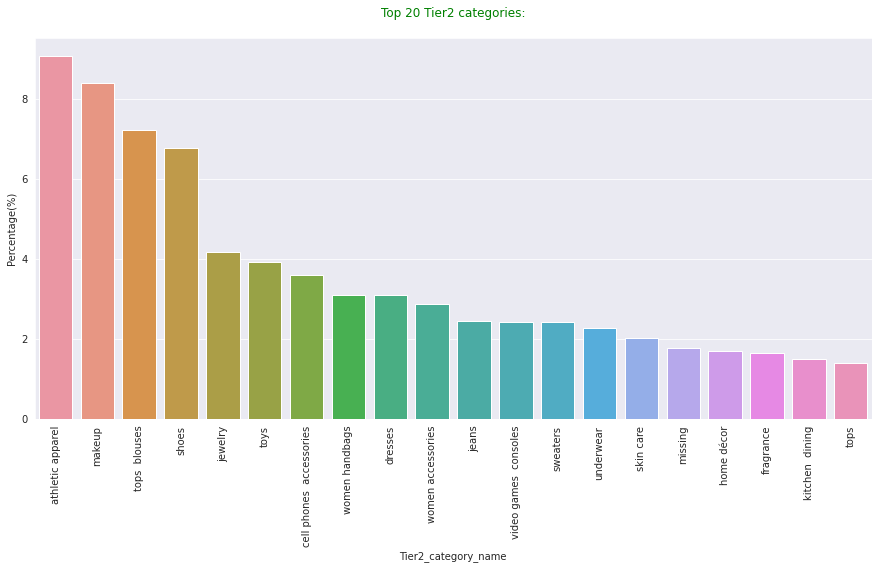

In [ ]:
df_train_Tier2_category_name = pd.DataFrame(df_train.Tier2_category_name.value_counts().sort_values(ascending = False)).head(20)
df_train_Tier2_category_name.reset_index(inplace = True)
df_train_Tier2_category_name.rename(columns={'index':'Tier2_category_name','Tier2_category_name':'Percentage(%)'},inplace=True)
df_train_Tier2_category_name['Percentage(%)'] = df_train_Tier2_category_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: Top 20 Tier2_category_name')
print('-'*40)
print(datadisplay(df_train_Tier2_category_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_Tier2_category_name.Tier2_category_name,y = df_train_Tier2_category_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 Tier2 categories:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Athletic Apparel products are sold out in highest quantity.

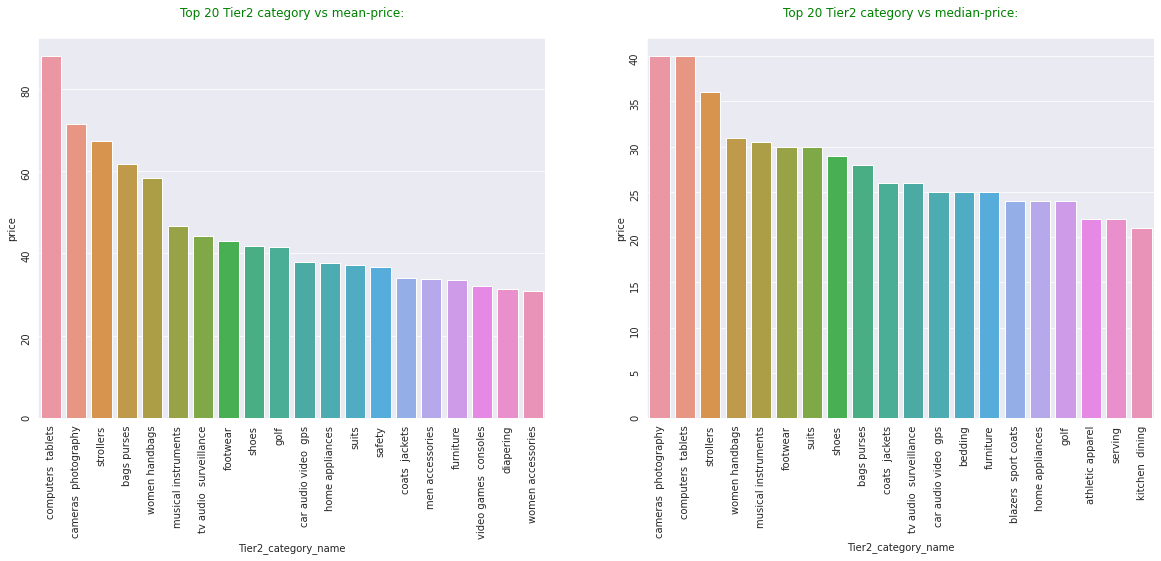

In [ ]:
dict_f = {0:pd.DataFrame(df_train.groupby(['Tier2_category_name']).price.mean().sort_values(ascending=False).head(20))\
          ,1:pd.DataFrame(df_train.groupby(['Tier2_category_name']).price.median().sort_values(ascending=False).head(20))}
fig, axes = plt.subplots(1,2,figsize=(20,7))
for i in range(2):
  df_price_parent_cat = dict_f[i]
  df_price_parent_cat.reset_index(inplace=True)
  sns.barplot(ax = axes[i], x= df_price_parent_cat.Tier2_category_name, y= df_price_parent_cat.price)
  axes[i].set_title(label='Top 20 Tier2 category vs {}-price:\n'.format('mean' if i==0 else 'median'),fontdict={'fontsize':12,'color':'green'})
  axes[i].tick_params(labelrotation= 90)
plt.show()



*   Computer & Tablets category products are having highest avg/median selling price.
*   Computer & Tablets, Camera's and Photography category products are having highest median selling price.



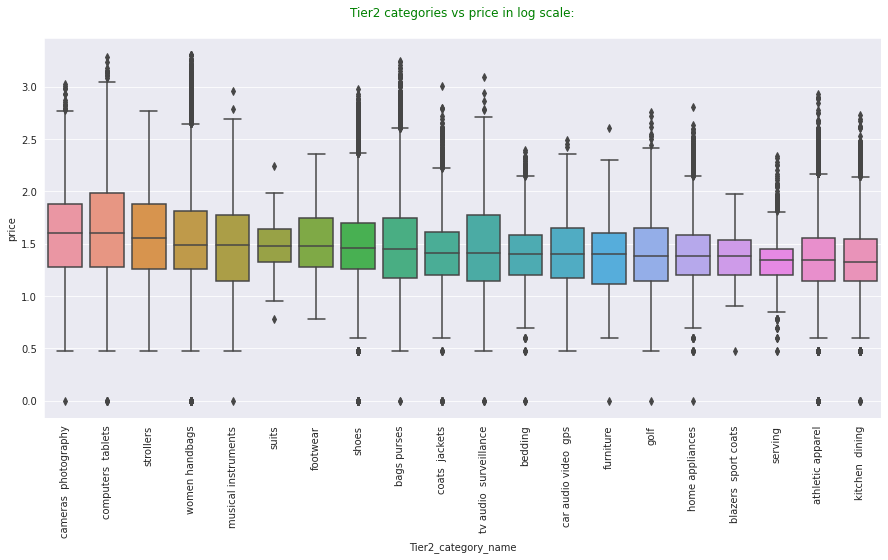

In [ ]:
plt.figure(figsize=(15,7))
df_train_log_tier2 = df_train_log[df_train_log.Tier2_category_name.isin(df_price_parent_cat.Tier2_category_name)]
order_desc = df_train_log_tier2.groupby('Tier2_category_name').price.median().sort_values(ascending = False).index
sns.boxplot(x = df_train_log_tier2.Tier2_category_name,y = df_train_log_tier2.price, order = order_desc)
plt.title(label='Tier2 categories vs price in log scale:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Computer & Tablets, Camera's and Photography category products are having highest median selling price.

**Anova Test(Statistical Testing)**

From boxplot we can conclude Tier2_category_name is not correlated with the target variable- price as the median price not differs between categories.

H0(Null Hypothesis): Tier2_category_name is not correlated with price.

H1(Alternate Hypothesis): Tier2_category_name is correlated with price.

In [ ]:
Tier2_cat_price = df_train.groupby('Tier2_category_name')['price'].apply(list)

AnovaResults = f_oneway(*Tier2_cat_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that Tier2_category_name and price is correlated.Hence it can be considered in ML model.

Feature: Top 20 Tier3_category_name
----------------------------------------
+-----------------------+--------------------+
|  Tier3_category_name  |   Percentage(%)    |
+-----------------------+--------------------+
|        tshirts        | 4.147492792512037  |
| pants tights leggings | 4.0591277084572805 |
|        missing        |  3.81561782033692  |
|          face         | 3.3839105394587197 |
|         shoes         | 2.1698687205140557 |
|         games         | 2.0847414410658853 |
|          lips         | 2.082245633348308  |
|        athletic       | 1.8252448927005043 |
|          eyes         | 1.7561042734973549 |
|  cases covers  skins  | 1.6644339305733749 |
|         shorts        | 1.4715147394309287 |
|          bras         | 1.4349545290815562 |
|         blouse        | 1.3685120803838957 |
|       tank cami       | 1.3681748090707098 |
|         boots         | 1.3672979036564257 |
|       knee mini       | 1.3546165022806287 |
|       necklaces       | 1.33

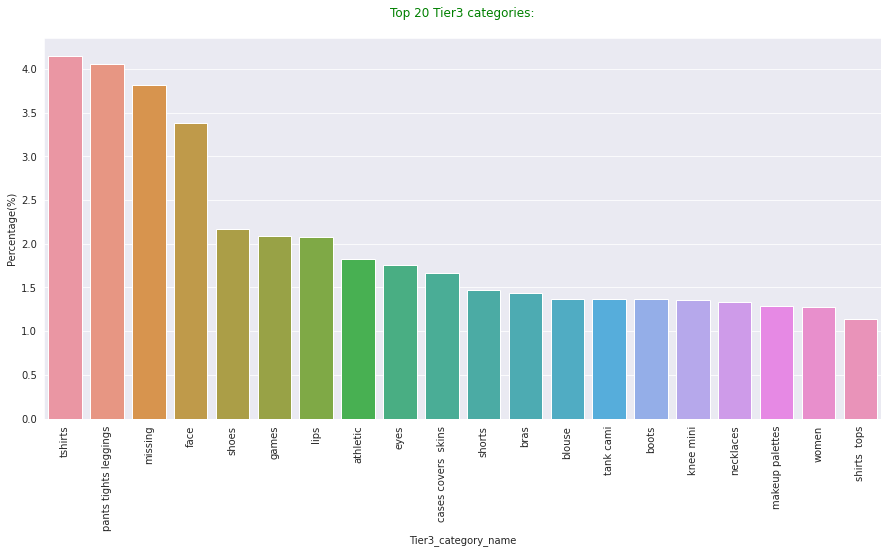

In [ ]:
df_train_Tier3_category_name = pd.DataFrame(df_train.Tier3_category_name.value_counts().sort_values(ascending = False)).head(20)
df_train_Tier3_category_name.reset_index(inplace = True)
df_train_Tier3_category_name.rename(columns={'index':'Tier3_category_name','Tier3_category_name':'Percentage(%)'},inplace=True)
df_train_Tier3_category_name['Percentage(%)'] = df_train_Tier3_category_name['Percentage(%)'].apply(lambda x: \
                                                ((x/df_train.shape[0])*100))
print('Feature: Top 20 Tier3_category_name')
print('-'*40)
print(datadisplay(df_train_Tier3_category_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_Tier3_category_name.Tier3_category_name,y = df_train_Tier3_category_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 Tier3 categories:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Tshirts are sold in highest quantity.

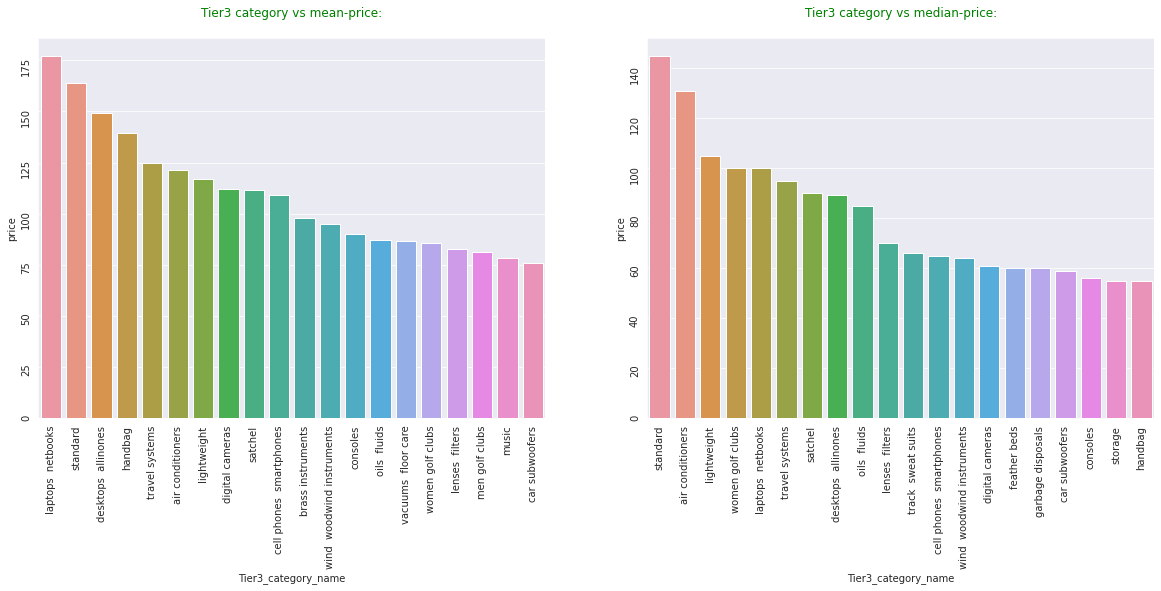

In [ ]:
dict_f = {0:pd.DataFrame(df_train.groupby(['Tier3_category_name']).price.mean().sort_values(ascending=False).head(20))\
          ,1:pd.DataFrame(df_train.groupby(['Tier3_category_name']).price.median().sort_values(ascending=False).head(20))}
fig, axes = plt.subplots(1,2,figsize=(20,7))
for i in range(2):
  df_price_parent_cat = dict_f[i]
  df_price_parent_cat.reset_index(inplace=True)
  sns.barplot(ax = axes[i], x= df_price_parent_cat.Tier3_category_name, y= df_price_parent_cat.price)
  axes[i].set_title(label='Tier3 category vs {}-price:\n'.format('mean' if i==0 else 'median'),fontdict={'fontsize':12,'color':'green'})
  axes[i].tick_params(labelrotation= 90)
plt.show()

*   Laptop & Netbooks products are having highest avg. selling price.
*   Standard products are having highest median selling price. The discrepancy in records because Electronics(Laptop & Netbooks) products are having more selling price than Standard products.


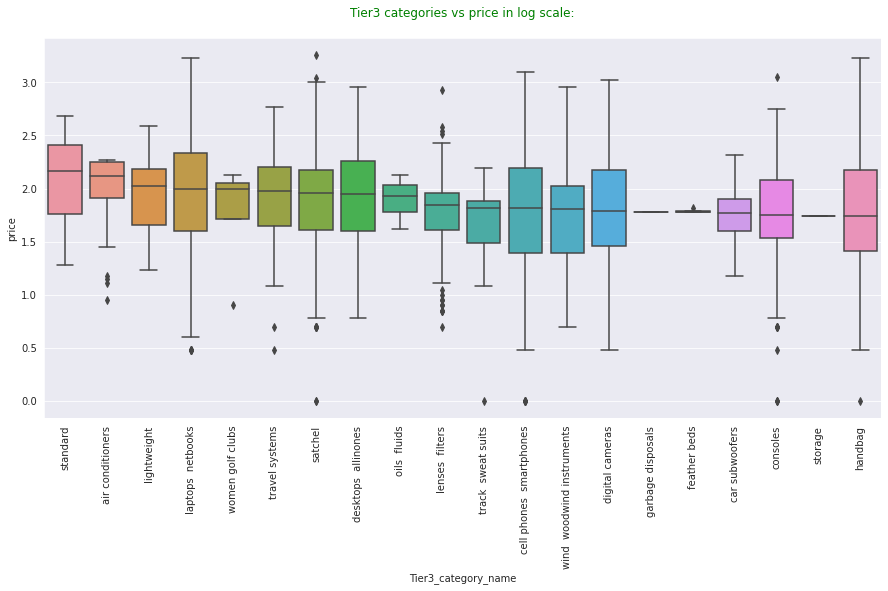

In [ ]:
plt.figure(figsize=(15,7))
df_train_log_tier3 = df_train_log[df_train_log.Tier3_category_name.isin(df_price_parent_cat.Tier3_category_name)]
order_desc = df_train_log_tier3.groupby('Tier3_category_name').price.median().sort_values(ascending = False).index
sns.boxplot(x = df_train_log_tier3.Tier3_category_name,y = df_train_log_tier3.price, order = order_desc)
plt.title(label='Tier3 categories vs price in log scale:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Standard products are having highest median selling price

**Anova Test(Statistical Testing)**

From boxplot we can conclude Tier3_category_name is not correlated with the target variable- price as the median price doesn't differ between categories.

H0(Null Hypothesis): Tier3_category_name is not correlated with price.

H1(Alternate Hypothesis): Tier3_category_name is correlated with price.

In [ ]:
Tier3_category_price = df_train.groupby('Tier3_category_name')['price'].apply(list)

AnovaResults = f_oneway(*Tier3_category_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that Tier3_category_name and price is correlated.Hence it can be considered in ML model.

###**Feature: name**

In [ ]:
perc_name_mising = round((df_train.name.isnull().sum()/df_train.shape[0])*100,2)
print('{} % products with missing name'.format(perc_name_mising))

0.0 % products with missing name


In [ ]:
unique_name_perc = (df_train.name.unique().shape[0]/df_train.shape[0])*100
print('{} % of unique name of products available.'.format(round(unique_name_perc,2)))

82.65 % of unique name of products available.


In [ ]:
df_train.name = df_train.name.apply(lambda x: text_preprocess(x))
df_train_copy.name = df_train.name
df_train_log.name = df_train.name

In [ ]:
print('missing count post pre-processing is :{}'.format(df_train.name.isnull().sum()))

missing count post pre-processing is :0


Feature: name
--------------------
Top 20 product names:
+----------------------+---------------+
|         name         | Percentage(%) |
+----------------------+---------------+
|        bundle        |      0.22     |
| lularoe tc leggings  |      0.08     |
|       reserved       |      0.06     |
| lularoe os leggings  |      0.06     |
|     coach purse      |      0.05     |
|       on hold        |      0.05     |
| american eagle jeans |      0.05     |
| victoria secret bra  |      0.05     |
|  michael kors purse  |      0.04     |
| michael kors wallet  |      0.03     |
|       converse       |      0.03     |
|     lularoe irma     |      0.03     |
|     coach wallet     |      0.03     |
|        dress         |      0.03     |
|   victoria secret    |      0.03     |
|   reserved bundle    |      0.03     |
|     nike shorts      |      0.03     |
|    miss me jeans     |      0.03     |
|   lularoe leggings   |      0.03     |
|    makeup bundle     |      0.03     |


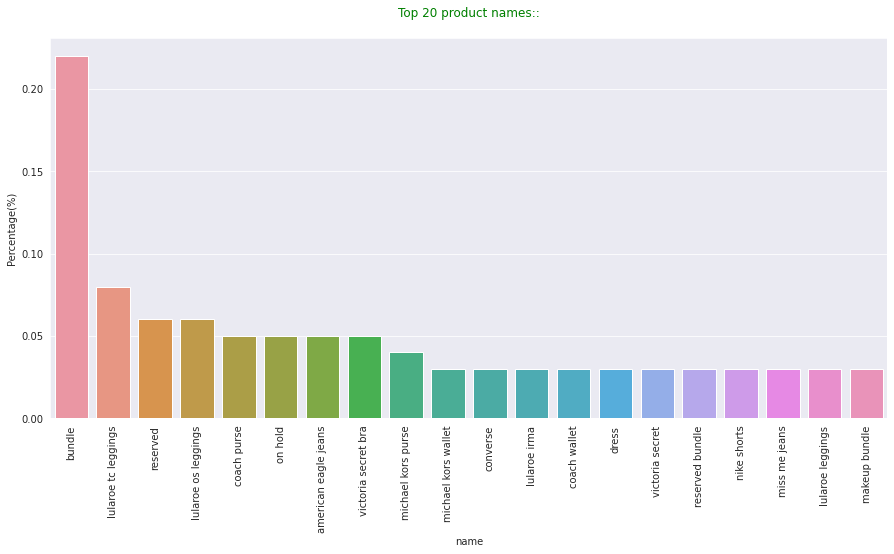

In [ ]:
df_train_name = pd.DataFrame(df_train.name.value_counts().sort_values(ascending = False).head(20))
df_train_name.reset_index(inplace = True)
df_train_name.rename(columns={'index':'name','name':'Percentage(%)'},inplace=True)
df_train_name['Percentage(%)'] = df_train_name['Percentage(%)'].apply(lambda x: \
                                                round(((x/df_train.shape[0])*100),2))

print('Feature: name')
print('-'*20)
print('Top 20 product names:')
print(datadisplay(df_train_name))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_name.name,y = df_train_name['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 product names::\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Products with name as 'bundle' are sold out in highest quantity.

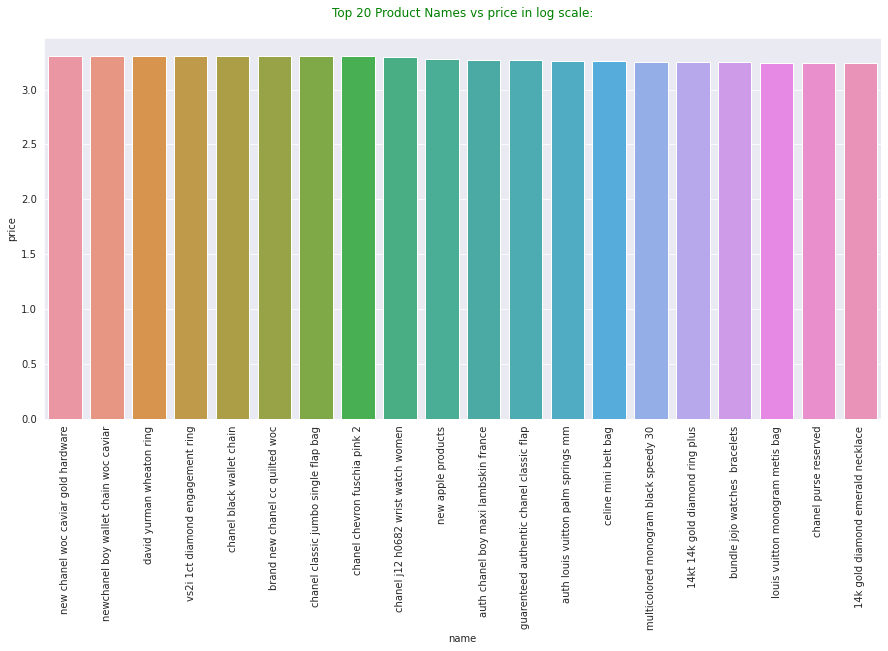

In [ ]:
df_train_price_name = pd.DataFrame(df_train_copy.groupby('name').price.mean().sort_values(ascending = False).head(20))
df_train_price_name.reset_index(inplace=True)

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_price_name.name,y = df_train_price_name.price)
plt.title(label='Top 20 Product Names vs price in log scale:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Top 20 Products with above stated name are sold out in highest avg. price.

**Feature Engineering**

In [ ]:
df_train['len_words_name']= df_train.name.apply(lambda x: len(x.split(' ')))
df_train_copy['len_words_name']= df_train_copy.name.apply(lambda x: len(x.split(' ')))
df_train_log['len_words_name']= df_train_log.name.apply(lambda x: len(x.split(' ')))

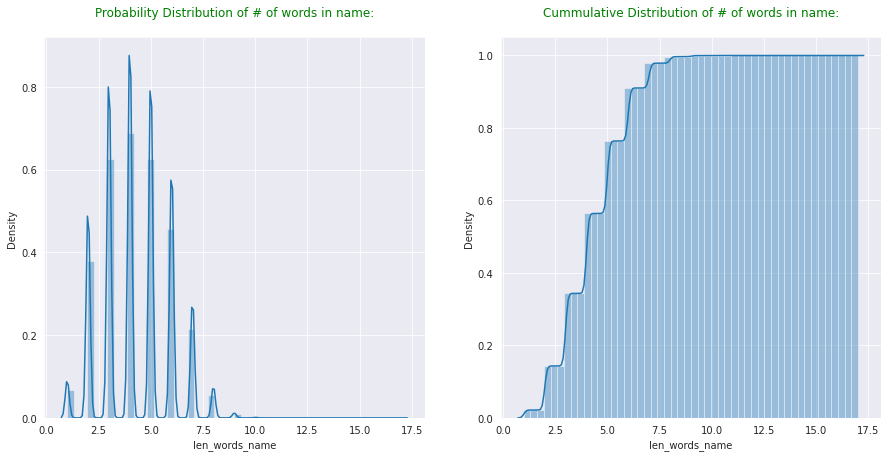

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(df_train_copy['len_words_name'],ax=axes[0]) #pdf
axes[0].set_title(label='Probability Distribution of # of words in name:\n',fontdict={'fontsize':12,'color':'green'})
#df_train_copy['len_words_name'].plot(kind = 'hist', cumulative=True, density = True,ax = axes[1])
kwargs = {'cumulative': True}
sns.distplot(df_train_copy['len_words_name'],hist_kws=kwargs, kde_kws=kwargs,ax=axes[1]) #cdf
axes[1].set_title(label='Cummulative Distribution of # of words in name:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

In [ ]:
perc_length_words  = round((df_train[df_train['len_words_name'] <= 7]['len_words_name'].shape[0]/df_train.shape[0])*100,2)
print('{}% of products are having less than/equal to 7 words'.format(perc_length_words))

97.88% of products are having less than/equal to 7 words


In [ ]:
print('Count of most number of words in a product name is {}'.format(df_train['len_words_name'].max()))

Count of most number of words in a product name is 17


In [ ]:
print('Count of avg. number of words in a product name is {}'.format(int(df_train['len_words_name'].mean())))

Count of avg. number of words in a product name is 4




*   From the above Distribution of # of words in name, 97.88% of product names are having less than/equal to 7 words.

*   Count of most number of words in a product name is 17

*   Count of avg. number of words in a product name is 4






### **#of words in name vs selling price**

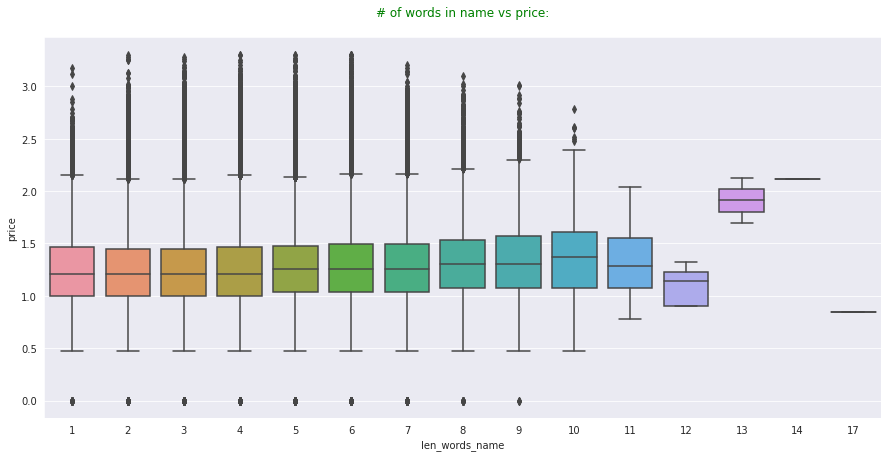

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(df_train_log['len_words_name'],df_train_log['price'])
plt.title(label='# of words in name vs price:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

If no.of words are more in product name, selling price also is increasing marginally. Hence, there is not much relation between # of words in name and selling price.

**Anova Test(Statistical Testing)**

From boxplot we can conclude len_words_name is not correlated with the target variable- price as the median price doesn't differ between categories.

H0(Null Hypothesis): len_words_name is not correlated with price.

H1(Alternate Hypothesis): len_words_name is correlated with price.

In [ ]:
word_count_name_price = df_train.groupby('len_words_name')['price'].apply(list)

AnovaResults = f_oneway(*word_count_name_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that len_words_name and price is correlated.Hence it can be considered in ML model.

###**Wordcloud**

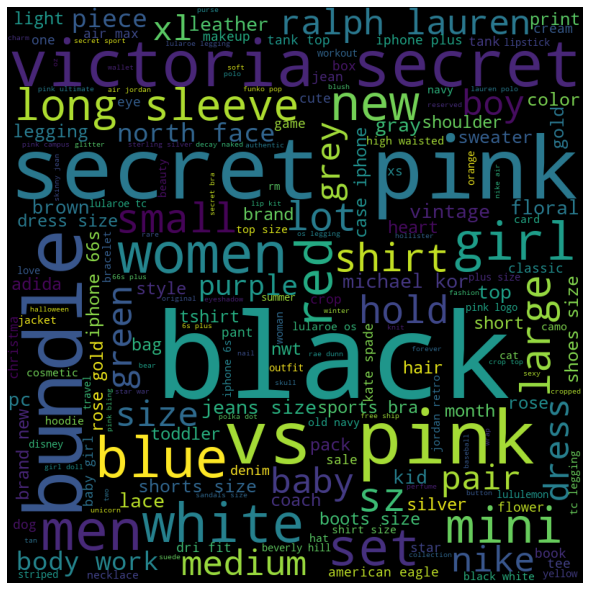

In [ ]:
###Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

stopwords = set(STOPWORDS)
name = ''

for val in df_train.name:
  sent = []
  for word in val.split(' '):
    word = word.lower()
    sent.append(word)
  name += " ".join(sent)
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(name)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

pink, black, women, long, sleeve are the most important words in product name text corpus.

### name vs item_condition_id

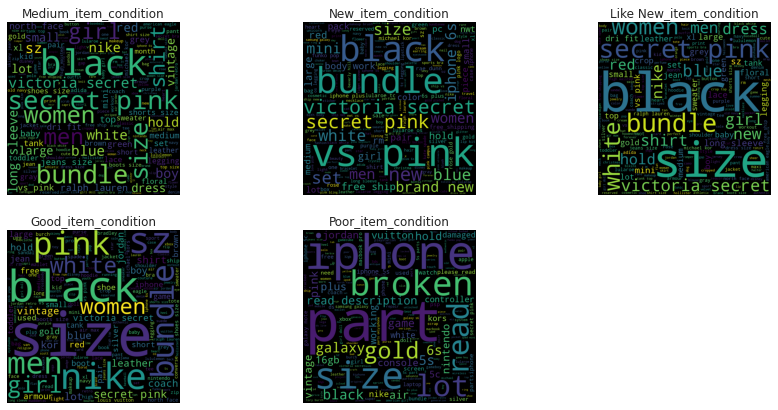

In [ ]:
stopwords = set(STOPWORDS)
counter_1 = 0
counter_2 = 0
cond_list = df_train.item_condition_id.unique().tolist()
wordcloud_dict = dict()

for cond in cond_list:
  name = ''
  for val in df_train[df_train.item_condition_id == cond].name:
    sent = []
    for word in val.split(' '):
      word = word.lower()
      sent.append(word)
    name += " ".join(sent)
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(name)

  wordcloud_dict[cond] = wordcloud
 
# plot the WordCloud image                      
fig, axes = plt.subplots(2,3,figsize = (15, 7), facecolor = None)
for cond in cond_list:
  if counter_1 <= 2:
    axes[0,counter_1].imshow(wordcloud_dict[cond])
    axes[0,counter_1].axis("off")
    axes[0,counter_1].set_title(cond+'_item_condition')
  else:
    axes[1,counter_2].imshow(wordcloud_dict[cond])
    axes[1,counter_2].axis("off")
    axes[1,counter_2].set_title(cond+'_item_condition')
    counter_2 += 1

  counter_1 += 1

fig.delaxes(axes[1][2])
plt.show()



*   New/Like New Products are having 'new' as important/common words in name.
*   Poor Products are having 'broken' as important/common word in name.



###**Feature: item_description**

In [ ]:
perc_item_description_mising = round((df_train.item_description.isnull().sum()/df_train.shape[0])*100,2)
print('{} % products with missing item_description'.format(perc_item_description_mising))

0.0 % products with missing item_description


In [ ]:
print('{} products are sold out without any item description'.format(df_train.item_description.isnull().sum()))

4 products are sold out without any item description


In [ ]:
df_train.item_description.fillna('missing',inplace = True)
df_train_copy.item_description.fillna('missing',inplace = True)
df_train_log.item_description.fillna('missing',inplace = True)

In [ ]:
df_train.item_description = df_train.item_description.apply(lambda x: text_preprocess(x))
df_train_copy.item_description = df_train.item_description
df_train_log.item_description = df_train.item_description

In [ ]:
print('missing count post pre-processing is :{}'.format(df_train.item_description.isnull().sum()))

missing count post pre-processing is :0


Feature: Item Description
--------------------
Top 20 product Item Description:
+----------------------+---------------+
|   item_description   | Percentage(%) |
+----------------------+---------------+
|  no description yet  |      5.56     |
|      brand new       |      0.33     |
|         new          |      0.33     |
|   great condition    |      0.12     |
|    good condition    |      0.12     |
|      never worn      |      0.1      |
|       like new       |      0.1      |
|         nwt          |      0.09     |
|      never used      |      0.08     |
|       new tags       |      0.07     |
| brand new never used |      0.06     |
| excellent condition  |      0.06     |
|    brand new tags    |      0.06     |
|       new box        |      0.05     |
| brand new never worn |      0.05     |
|         worn         |      0.05     |
|      size small      |      0.05     |
|         bnwt         |      0.04     |
|       reserved       |      0.04     |
|  in good conditi

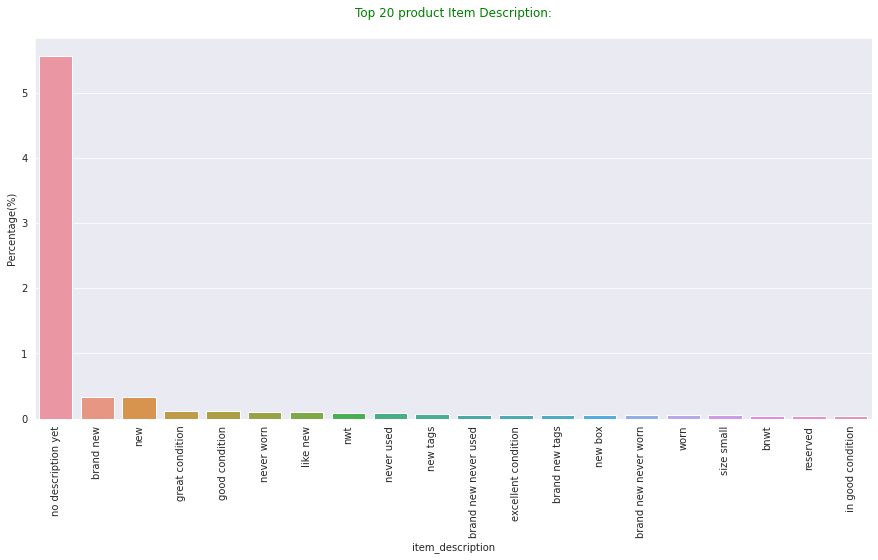

In [ ]:
df_train_top20_item_desc = pd.DataFrame(df_train.item_description.value_counts().sort_values(ascending = False).head(20))
df_train_top20_item_desc.reset_index(inplace=True)
df_train_top20_item_desc.rename(columns={'index':'item_description','item_description':'Percentage(%)'},inplace=True)
df_train_top20_item_desc['Percentage(%)'] = df_train_top20_item_desc['Percentage(%)'].apply(lambda x: \
                                                round(((x/df_train.shape[0])*100),2))
print('Feature: Item Description')
print('-'*20)
print('Top 20 product Item Description:')
print(datadisplay(df_train_top20_item_desc))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_top20_item_desc.item_description,y = df_train_top20_item_desc['Percentage(%)'])
plt.xticks(rotation = 'vertical')
plt.title(label='Top 20 product Item Description:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

Most product sold with Item Description as 'No description yet'.

Feature: Top 20 Item Description vs price
----------------------------------------
Top 20 product Item Description:
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|                                                                                                                                                                                                                                  item_description                                                                                                                                                      

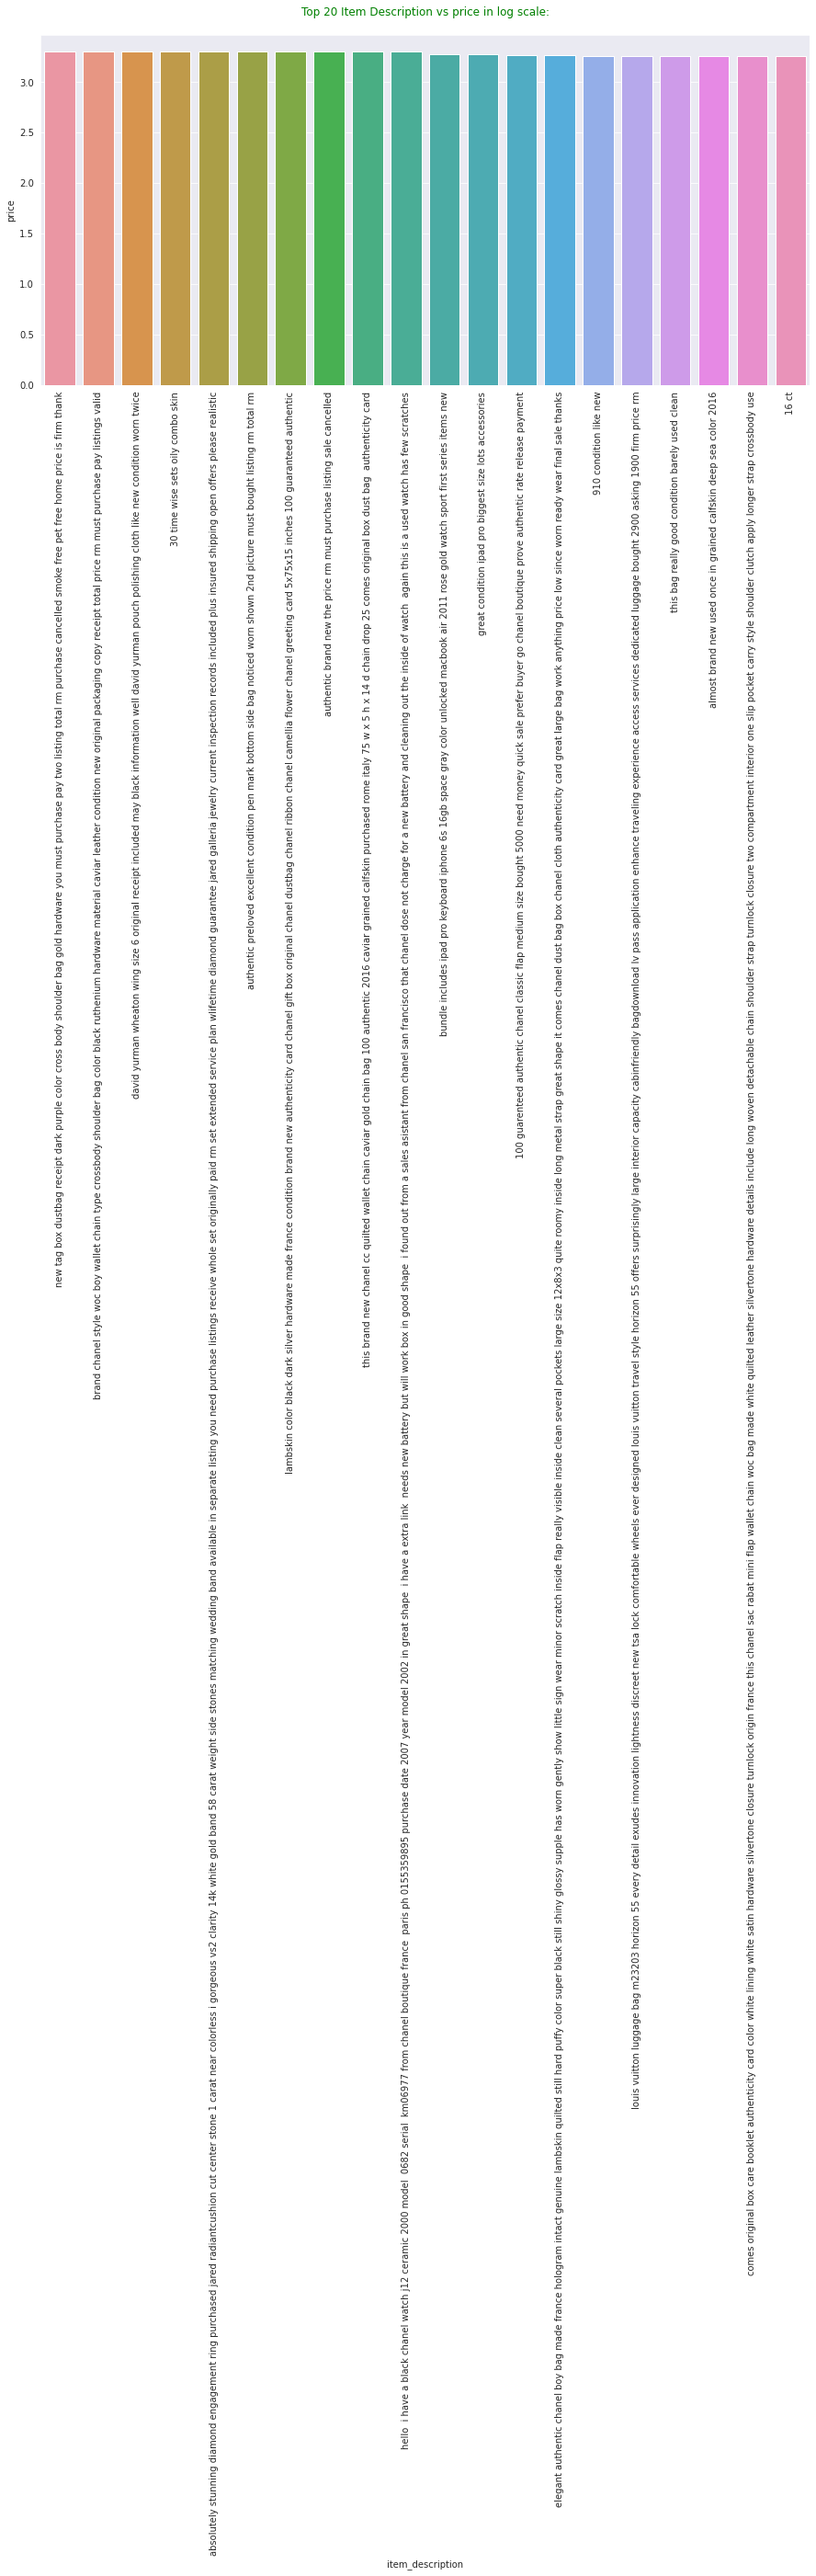

In [ ]:
df_train_price_item_desc = pd.DataFrame(df_train_copy.groupby('item_description').price.mean().sort_values(ascending = False).head(20))
df_train_price_item_desc.reset_index(inplace=True)

print('Feature: Top 20 Item Description vs price')
print('-'*40)
print('Top 20 product Item Description:')
print(datadisplay(df_train_price_item_desc))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x = df_train_price_item_desc.item_description.apply(lambda x: x.split('.')[0] if x.find('.') != -1 else x),\
            y = df_train_price_item_desc.price)
plt.title(label='Top 20 Item Description vs price in log scale:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Top 20 prducts sold with above trimmed Item Description's.

**Feature Engineering**

In [ ]:
df_train['len_words_item_description']= df_train.item_description.apply(lambda x: len(x.split(' ')))
df_train_copy['len_words_item_description']= df_train_copy.item_description.apply(lambda x: len(x.split(' ')))
df_train_log['len_words_item_description']= df_train_log.item_description.apply(lambda x: len(x.split(' ')))

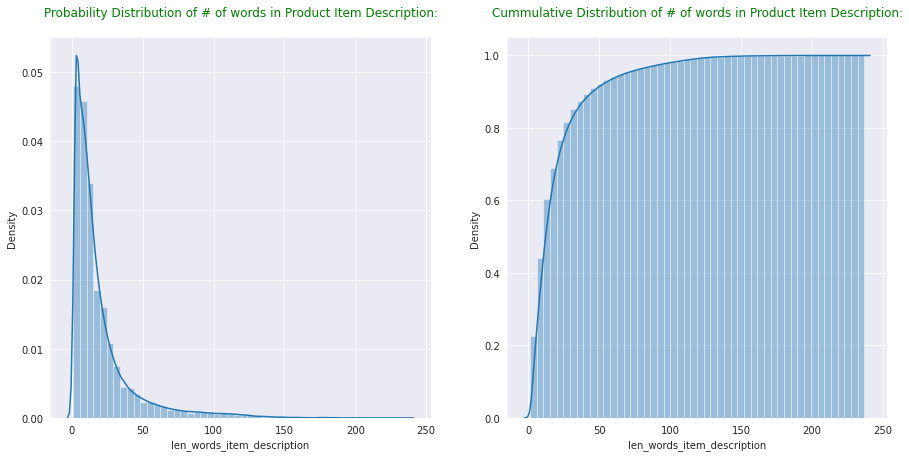

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(df_train_copy['len_words_item_description'],ax=axes[0]) #pdf
axes[0].set_title(label='Probability Distribution of # of words in Product Item Description:\n',fontdict={'fontsize':12,'color':'green'})
#df_train_copy['len_words_name'].plot(kind = 'hist', cumulative=True, density = True,ax = axes[1])
kwargs = {'cumulative': True}
sns.distplot(df_train_copy['len_words_item_description'],hist_kws=kwargs, kde_kws=kwargs,ax=axes[1]) #cdf
axes[1].set_title(label='Cummulative Distribution of # of words in Product Item Description:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

In [ ]:
perc_length_words  = round((df_train[df_train['len_words_item_description'] <= 120]['len_words_item_description'].shape[0]/df_train.shape[0])*100,2)
print('{}% of products are having less than/equal to 120 words in Item Description'.format(perc_length_words))

99.19% of products are having less than/equal to 120 words in Item Description


In [ ]:
print('Count of most number of words in a product item description is {}'.format(df_train['len_words_item_description'].max()))

Count of most number of words in a product item description is 237


In [ ]:
print('Count of avg. number of words in a product item description is {}'.format(int(df_train['len_words_item_description'].mean())))

Count of avg. number of words in a product item description is 19




*   From the above Distribution of # of words in name, 99.19% of product Item Description are having less than/equal to 120 words.

*   Count of most number of words in a product item description is 237

*   Count of avg. number of words in a product item description is 19






### **#of words in item_description vs selling price**

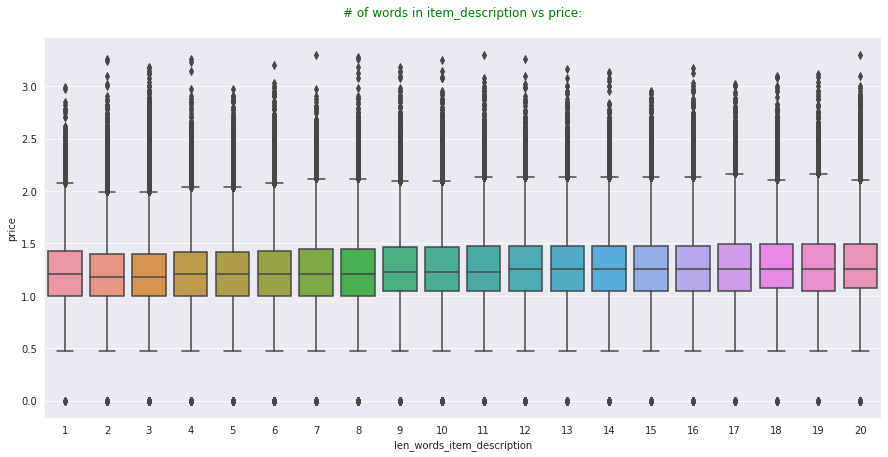

In [ ]:
plt.figure(figsize=(15,7))
top20 = df_train_log.groupby('len_words_item_description')['price'].mean().head(20).index
sns.boxplot(df_train_log['len_words_item_description'],df_train_log['price'], order = top20)
plt.title(label='# of words in item_description vs price:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

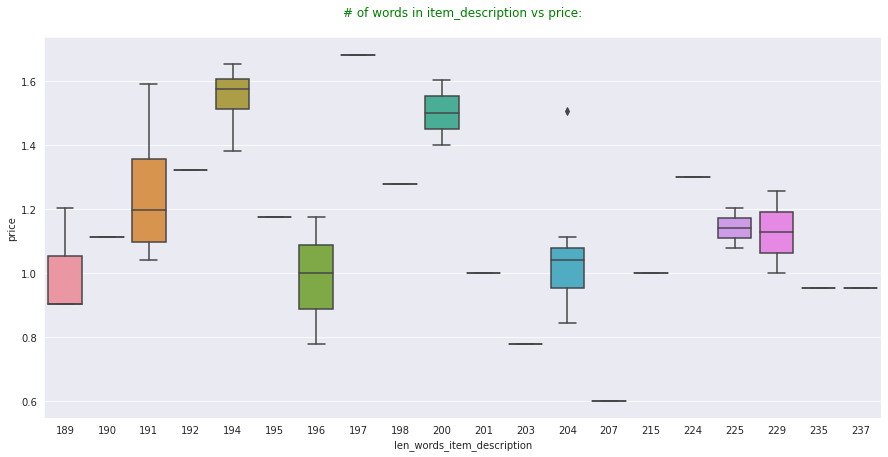

In [ ]:
plt.figure(figsize=(15,7))
least20 = df_train_log.groupby('len_words_item_description')['price'].mean().tail(20).index
sns.boxplot(df_train_log['len_words_item_description'],df_train_log['price'], order = least20)
plt.title(label='# of words in item_description vs price:\n',fontdict={'fontsize':12,'color':'green'})
plt.show()

There is not much relation between # of words in item description and selling price.

**Anova Test(Statistical Testing)**

From boxplot we can conclude len_words_item_description is not correlated with the target variable- price as the median price doesn't differ between categories.

H0(Null Hypothesis): len_words_item_description is not correlated with price.

H1(Alternate Hypothesis): len_words_item_description is correlated with price.

In [ ]:
len_words_item_description_price = df_train.groupby('len_words_item_description')['price'].apply(list)

AnovaResults = f_oneway(*len_words_item_description_price)
print('P-Value is: ', AnovaResults[1])

if AnovaResults[1] > 0.05:
  print('Accept H0')
else:
  print('Accept H1')

P-Value is:  0.0
Accept H1


from Anova Test we can conclude that len_words_name and price is correlated.Hence it can be considered in ML model.

###**Wordcloud**

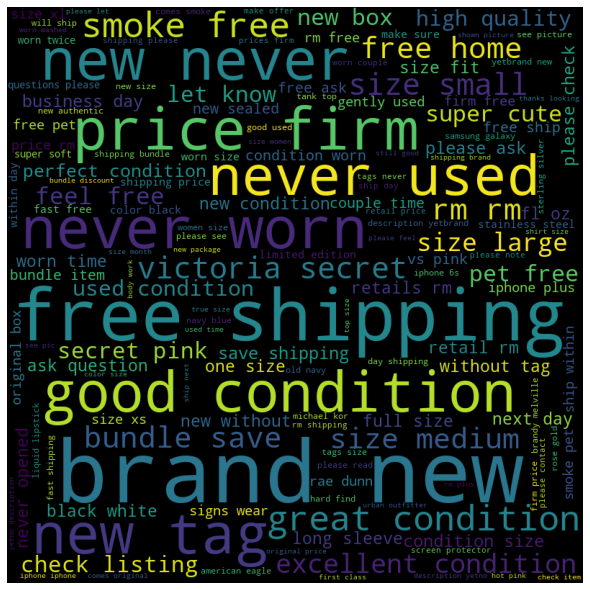

In [ ]:
###Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

stopwords = set(STOPWORDS)
item_description = ''

for val in df_train.item_description:
  sent = []
  for word in val.split(' '):
    word = word.lower()
    sent.append(word)
  item_description += " ".join(sent)
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(item_description)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

brand, new, never, free, great, condition are the most important words in product item description text corpus.

###item_description vs item_condition_id

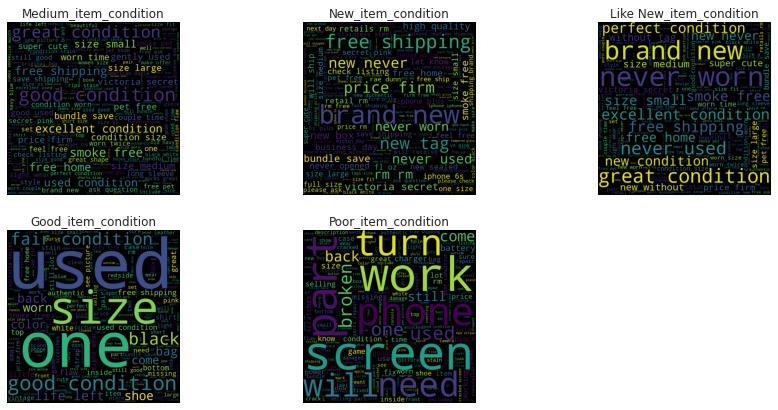

In [ ]:
stopwords = set(STOPWORDS)
counter_1 = 0
counter_2 = 0
cond_list = df_train.item_condition_id.unique().tolist()
wordcloud_dict = dict()

for cond in cond_list:
  item_description = ''
  for val in df_train[df_train.item_condition_id == cond].item_description:
    sent = []
    for word in val.split(' '):
      word = word.lower()
      sent.append(word)
    item_description += " ".join(sent)
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(item_description)

  wordcloud_dict[cond] = wordcloud
 
# plot the WordCloud image                      
fig, axes = plt.subplots(2,3,figsize = (15, 7), facecolor = None)
for cond in cond_list:
  if counter_1 <= 2:
    axes[0,counter_1].imshow(wordcloud_dict[cond])
    axes[0,counter_1].axis("off")
    axes[0,counter_1].set_title(cond+'_item_condition')
  else:
    axes[1,counter_2].imshow(wordcloud_dict[cond])
    axes[1,counter_2].axis("off")
    axes[1,counter_2].set_title(cond+'_item_condition')
    counter_2 += 1

  counter_1 += 1

fig.delaxes(axes[1][2])
plt.show()

*   New/Like New Products are having 'new','perfect','brand' as imporatant/common words in item description.
*   Poor Products are having 'broken' as imporatant/common word in item description.

###**Analysis on Higher Selling Price Products**

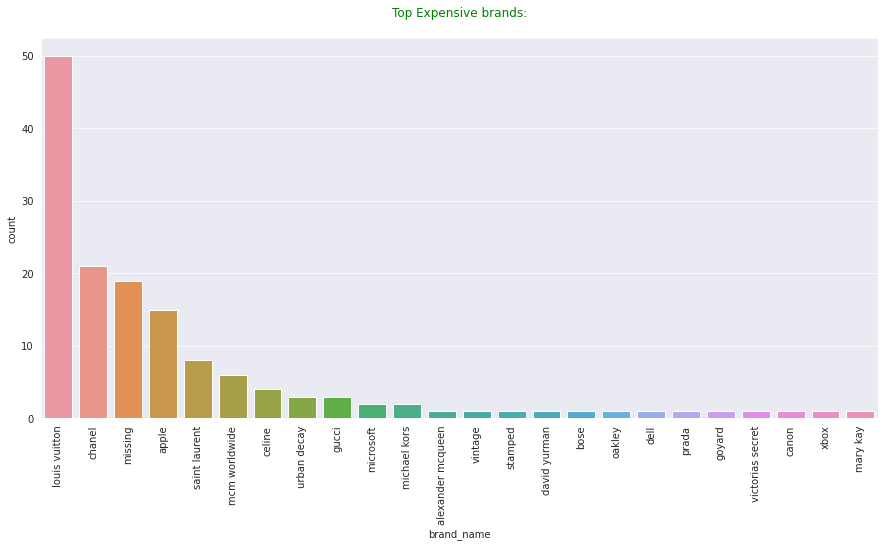

In [ ]:
plt.figure(figsize=(15,7))
order_desc = df_train[df_train.price > float(1015)].brand_name.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price > float(1015)].brand_name,order = order_desc)
plt.title(label='Top Expensive brands:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()



*   'Luis Vuitton' is among top expensive brands whose products are sold out more in higher selling price
*   Electronic product brands like Apple, Dell, Bose, Canon are among top list.



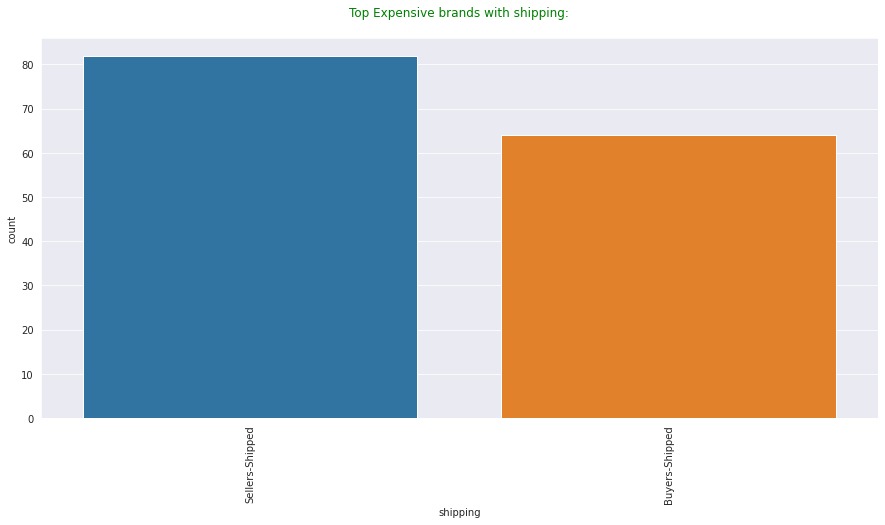

In [ ]:
plt.figure(figsize=(15,7))
order_desc = df_train[df_train.price > float(1015)].shipping.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price > float(1015)].shipping,order = order_desc)
plt.title(label='Top Expensive brands with shipping:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Most higher selling price products where shippment charges are borne by sellers than Buyers.

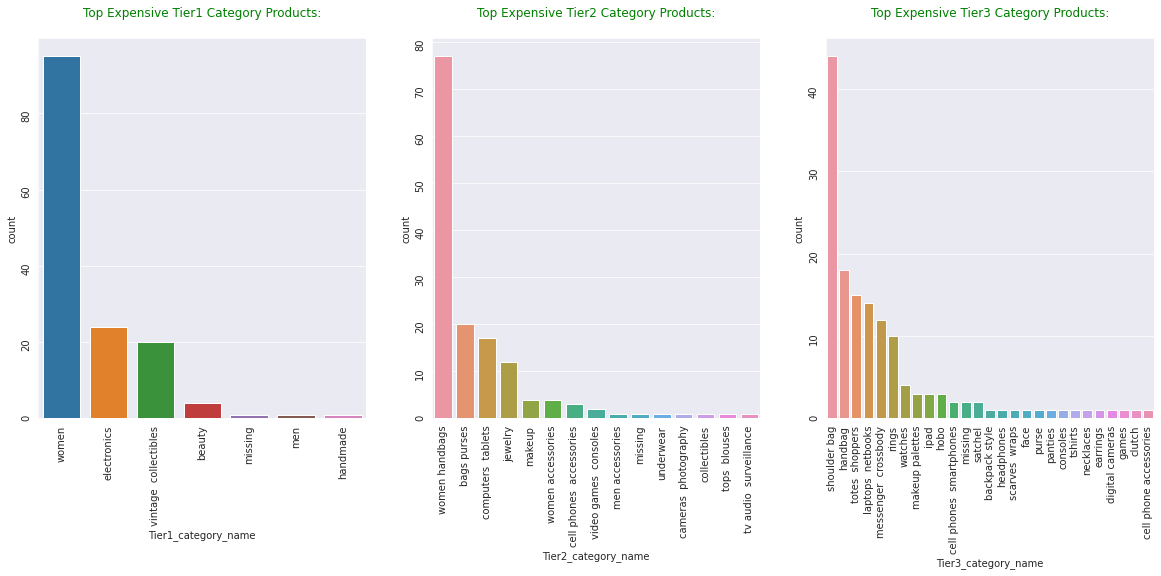

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,7))

order_desc = df_train[df_train.price > float(1015)].Tier1_category_name.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price > float(1015)].Tier1_category_name,order = order_desc, ax = axes[0])
axes[0].set_title(label='Top Expensive Tier1 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[0].tick_params(labelrotation= 90)

order_desc = df_train[df_train.price > float(1015)].Tier2_category_name.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price > float(1015)].Tier2_category_name,order = order_desc, ax = axes[1])
axes[1].set_title(label='Top Expensive Tier2 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[1].tick_params(labelrotation= 90)

order_desc = df_train[df_train.price > float(1015)].Tier3_category_name.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price > float(1015)].Tier3_category_name,order = order_desc, ax = axes[2])
axes[2].set_title(label='Top Expensive Tier3 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[2].tick_params(labelrotation= 90)

plt.show()



*   Women Shoulder bags are top expensive category products sold.
*   Electronic products(Laptops& Netbooks,ipad), jewelry(Rings,Necklaces) are among top expensive category products.



###**Analysis on Avg. Selling Price Products**

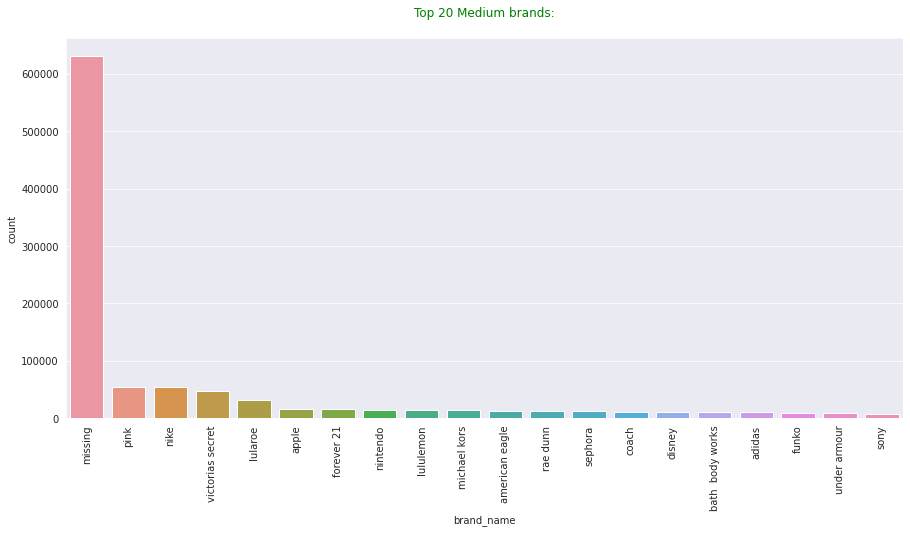

In [ ]:
plt.figure(figsize=(15,7))
order_desc = df_train[df_train.price <= float(250)].brand_name.value_counts().sort_values(ascending = False).head(20).index
sns.countplot(df_train[df_train.price <= float(250)].brand_name,order = order_desc)
plt.title(label='Top 20 Medium brands:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

*   Most missing brand products are sold out in avg price scale.

*   'PINK','Nike' are among top most sold out Medium brands

*   Electronic product brands like Apple, Sony are among top Medium Sold product list.



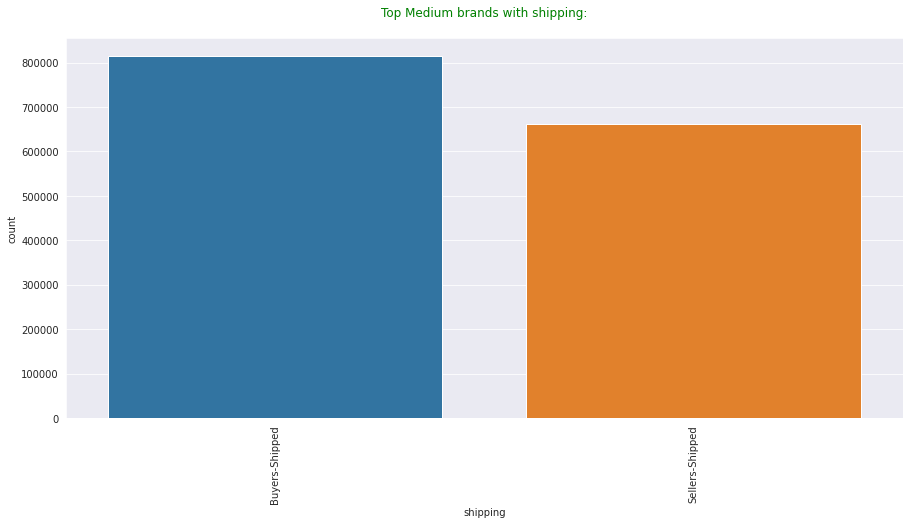

In [ ]:
plt.figure(figsize=(15,7))
order_desc = df_train[df_train.price <= float(250)].shipping.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price <= float(250)].shipping,order = order_desc)
plt.title(label='Top Medium brands with shipping:\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation = 'vertical')
plt.show()

Most avg. selling price products where shippment charges are borne by buyers than sellers.

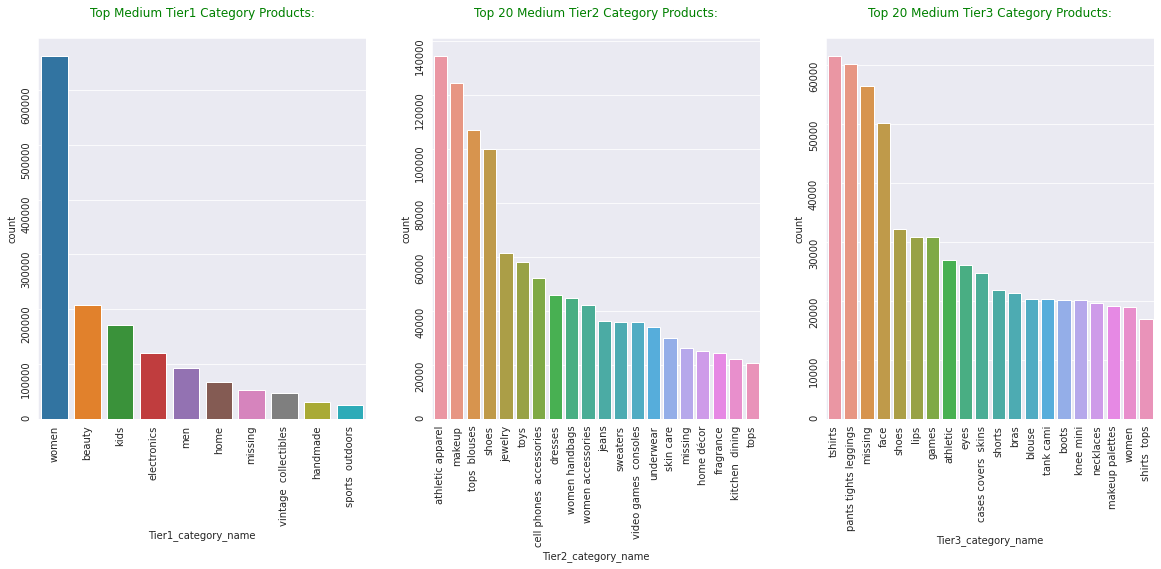

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,7))

order_desc = df_train[df_train.price <= float(250)].Tier1_category_name.value_counts().sort_values(ascending = False).index
sns.countplot(df_train[df_train.price <= float(250)].Tier1_category_name,order = order_desc, ax = axes[0])
axes[0].set_title(label='Top Medium Tier1 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[0].tick_params(labelrotation= 90)

order_desc = df_train[df_train.price <= float(250)].Tier2_category_name.value_counts().sort_values(ascending = False).head(20).index
sns.countplot(df_train[df_train.price <= float(250)].Tier2_category_name,order = order_desc, ax = axes[1])
axes[1].set_title(label='Top 20 Medium Tier2 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[1].tick_params(labelrotation= 90)

order_desc = df_train[df_train.price <= float(250)].Tier3_category_name.value_counts().sort_values(ascending = False).head(20).index
sns.countplot(df_train[df_train.price <= float(250)].Tier3_category_name,order = order_desc, ax = axes[2])
axes[2].set_title(label='Top 20 Medium Tier3 Category Products:\n',fontdict={'fontsize':12,'color':'green'})
axes[2].tick_params(labelrotation= 90)

plt.show()



*   Women Atheletic Apparel like Tshirts, Pants,Tights,Leggings are amongst top medium category products sold.
*   Electronic products(Laptops& Netbooks,ipad,Camera), jewelry(Rings,Necklaces) are not belonging to amongst top medium category products.



###**Analysis of Zero-Price Product**

In [ ]:
perc_zero_price_product = (df_train[df_train.price <= float(0)].shape[0]/df_train.shape[0])*100
print('{} % products are selling @ 0$ price'.format(round(perc_zero_price_product,2)))

0.06 % products are selling @ 0$ price


In [ ]:
df_train_zero_price = df_train[df_train.price <= float(0)]

Feature Name: brand_name
+------------------+-------+
|    brand_name    | count |
+------------------+-------+
|     missing      |  346  |
|       nike       |   37  |
|     lularoe      |   29  |
| victorias secret |   25  |
|       pink       |   16  |
|   michael kors   |   12  |
|     nintendo     |   9   |
|  american eagle  |   9   |
|      apple       |   8   |
|    lululemon     |   8   |
|    forever 21    |   8   |
|      disney      |   8   |
|     sephora      |   8   |
|      adidas      |   7   |
|     old navy     |   6   |
|      coach       |   5   |
|  juicy couture   |   5   |
|     carters      |   5   |
|     rae dunn     |   5   |
|  lilly pulitzer  |   4   |
+------------------+-------+




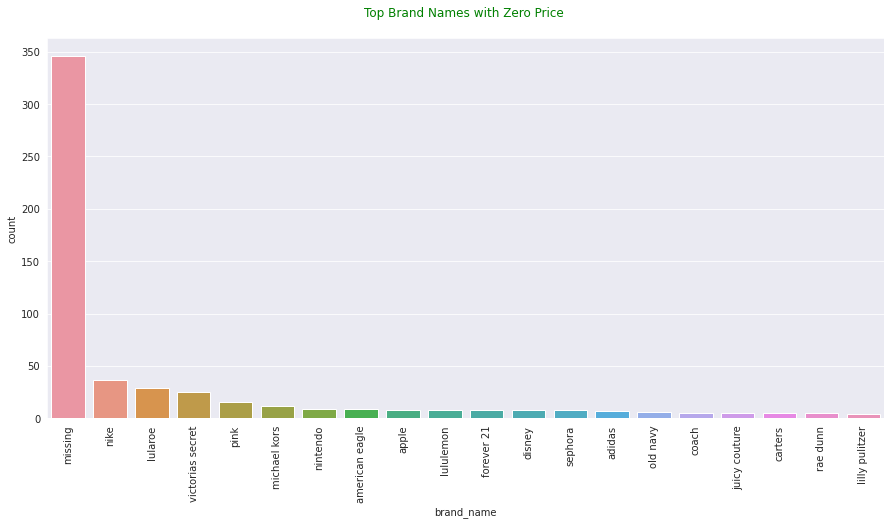

In [ ]:
df_train_zero_price_brand = pd.DataFrame(df_train_zero_price.brand_name.value_counts().sort_values(ascending = False).head(20))
df_train_zero_price_brand.reset_index(inplace = True)
df_train_zero_price_brand.rename(columns={'index':'brand_name','brand_name':'count'},inplace=True)

print('Feature Name: brand_name')
print(datadisplay(df_train_zero_price_brand))
print('\n')

plt.figure(figsize = (15,7))
sns.barplot(x= df_train_zero_price_brand['brand_name'], y = df_train_zero_price_brand['count'])
plt.title(label='Top Brand Names with Zero Price \n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation='vertical')
plt.show()

Most products with Missing brand name are sold in $0

Feature Name: shipping
+-----------------+-------+
|     shipping    | count |
+-----------------+-------+
|  Buyers-Shipped |  559  |
| Sellers-Shipped |  315  |
+-----------------+-------+




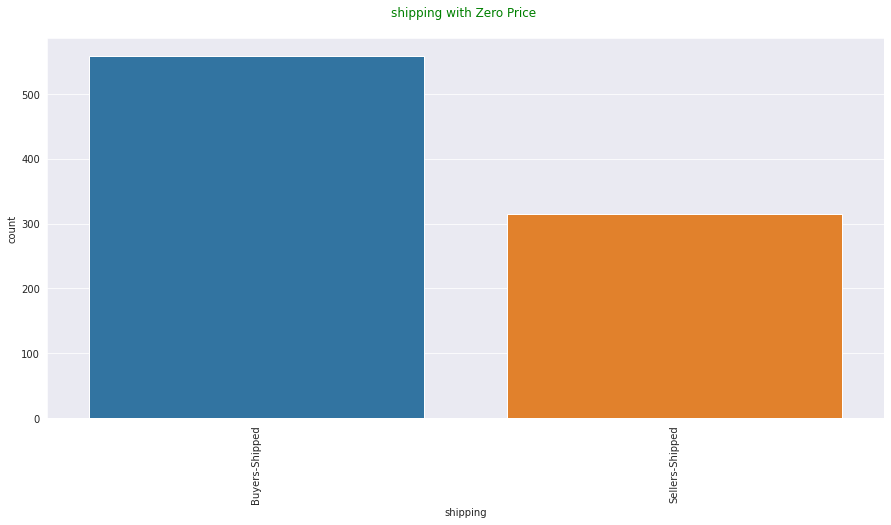

In [ ]:
df_train_zero_price_shipping = pd.DataFrame(df_train_zero_price.shipping.value_counts().sort_values(ascending = False))
df_train_zero_price_shipping.reset_index(inplace = True)
df_train_zero_price_shipping.rename(columns={'index':'shipping','shipping':'count'},inplace=True)

print('Feature Name: shipping')
print(datadisplay(df_train_zero_price_shipping))
print('\n')

plt.figure(figsize = (15,7))
sns.barplot(x= df_train_zero_price_shipping['shipping'], y = df_train_zero_price_shipping['count'])
plt.title(label='shipping with Zero Price \n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation='vertical')
plt.show()

Most $0 products where shipping charges are borne by Buyers than sellers.

Feature Name: Tier1 Categories
+-----------------------+-------+
|  Tier1_category_name  | count |
+-----------------------+-------+
|         women         |  395  |
|          kids         |  134  |
|         beauty        |  103  |
|          men          |   71  |
|      electronics      |   58  |
|          home         |   40  |
|        missing        |   35  |
|    sports  outdoors   |   20  |
| vintage  collectibles |   11  |
|        handmade       |   7   |
+-----------------------+-------+




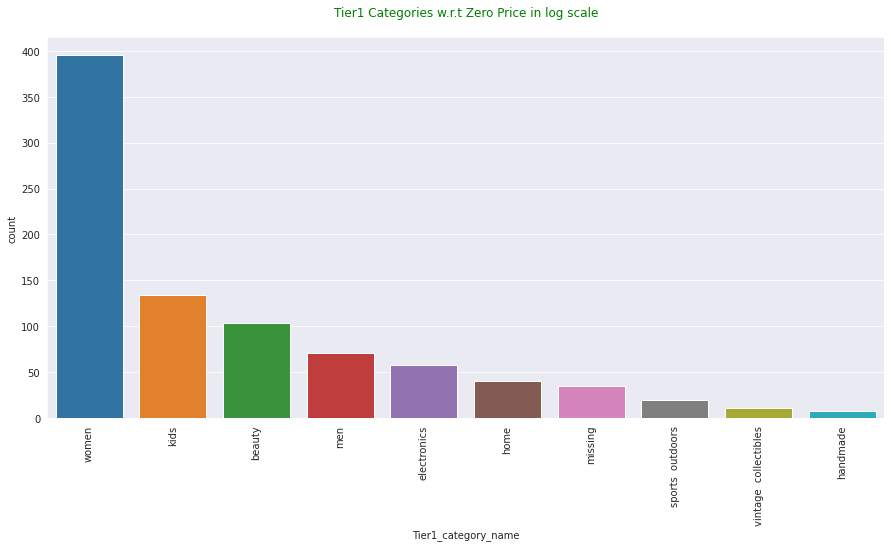

In [ ]:
df_train_zero_price_Tier1 = pd.DataFrame(df_train_zero_price.Tier1_category_name.value_counts().sort_values(ascending = False))
df_train_zero_price_Tier1.reset_index(inplace = True)
df_train_zero_price_Tier1.rename(columns={'index':'Tier1_category_name','Tier1_category_name':'count'},inplace=True)

print('Feature Name: Tier1 Categories')
print(datadisplay(df_train_zero_price_Tier1))
print('\n')

plt.figure(figsize = (15,7))
sns.barplot(x= df_train_zero_price_Tier1['Tier1_category_name'], y = df_train_zero_price_Tier1['count'])
plt.title(label='Tier1 Categories w.r.t Zero Price in log scale\n',fontdict={'fontsize':12,'color':'green'})
plt.xticks(rotation='vertical')
plt.show()

Most products with Women category are sold in $0

Feature Name: Tier2 Categories
+---------------------+-------+
| Tier2_category_name | count |
+---------------------+-------+
|    tops  blouses    |   69  |
|        shoes        |   68  |
|   athletic apparel  |   62  |
|        makeup       |   56  |
|         toys        |   43  |
|        jeans        |   39  |
|    women handbags   |   34  |
|       jewelry       |   33  |
|       dresses       |   28  |
|      underwear      |   26  |
+---------------------+-------+


Feature Name: Tier3 Categories
+-----------------------+-------+
|  Tier3_category_name  | count |
+-----------------------+-------+
|        tshirts        |   44  |
|        missing        |   39  |
|         shoes         |   30  |
|          face         |   26  |
| pants tights leggings |   25  |
|        athletic       |   22  |
|          bras         |   20  |
|          eyes         |   17  |
|      slim skinny      |   16  |
|         blouse        |   15  |
+-----------------------+-------+




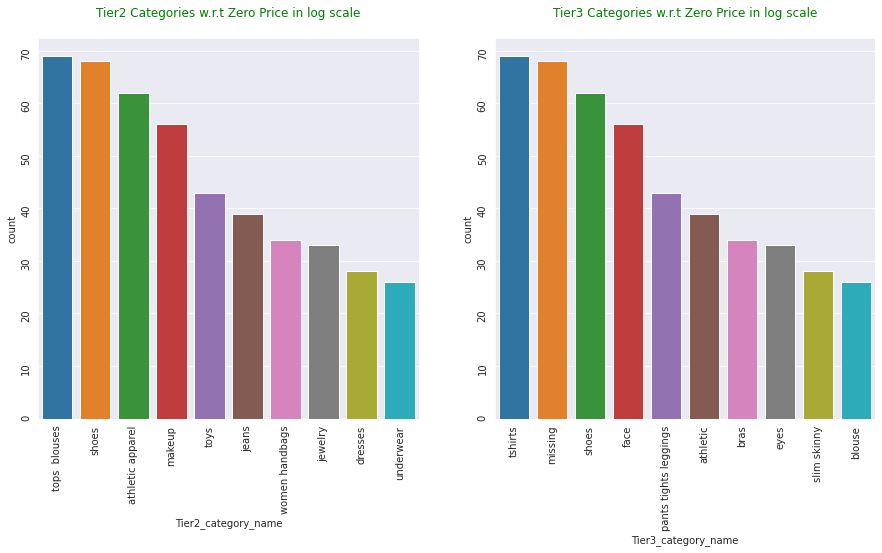

In [ ]:
df_train_zero_price_Tier2 = pd.DataFrame(df_train_zero_price.Tier2_category_name.value_counts().sort_values(ascending = False).head(10))
df_train_zero_price_Tier2.reset_index(inplace = True)
df_train_zero_price_Tier2.rename(columns={'index':'Tier2_category_name','Tier2_category_name':'count'},inplace=True)

df_train_zero_price_Tier3 = pd.DataFrame(df_train_zero_price.Tier3_category_name.value_counts().sort_values(ascending = False).head(10))
df_train_zero_price_Tier3.reset_index(inplace = True)
df_train_zero_price_Tier3.rename(columns={'index':'Tier3_category_name','Tier3_category_name':'count'},inplace=True)

print('Feature Name: Tier2 Categories')
print(datadisplay(df_train_zero_price_Tier2))
print('\n')
print('Feature Name: Tier3 Categories')
print(datadisplay(df_train_zero_price_Tier3))
print('\n')

fig,axes = plt.subplots(1,2,figsize = (15,7))
sns.barplot(x= df_train_zero_price_Tier2['Tier2_category_name'], y = df_train_zero_price_Tier2['count'],ax= axes[0])
axes[0].set_title(label='Tier2 Categories w.r.t Zero Price in log scale\n',fontdict={'fontsize':12,'color':'green'})
axes[0].tick_params(labelrotation= 90)
sns.barplot(x= df_train_zero_price_Tier3['Tier3_category_name'], y = df_train_zero_price_Tier2['count'],ax= axes[1])
axes[1].set_title(label='Tier3 Categories w.r.t Zero Price in log scale\n',fontdict={'fontsize':12,'color':'green'})
axes[1].tick_params(labelrotation= 90)
plt.show()

Most products with Tier2 category as 'Tops & Blouses' and Tier3 category as 'T-Shirts' are sold in $0

###**Conclusion**

*   Most sold products are having selling price between 0-$250.

*   'PINK','Nike' are among top most sold out Medium brands

*   Women Atheletic Apparel like Tshirts,Pants,Tights,Leggings are amongst top medium category products sold.

*   Electronic Products/Jewelleries are not part of amongst top medium categories sold.

*   Shippment charges for more products are carried by Buyers than sellers.

*   Products with name/item description as 'new' can be treated as products with condition as New/New Like.

*   Products with name/item description as 'broken' can be treated as products with condition as Poor.

*   New Products are sold out more but the avg. selling price for Poor products is more as it contains Electronic products.



*   'Luis Vuitton' is among top expensive brands whose products are sold out more in higher selling price, whereas Chanel,David Yurman,Mary Kay are among top expensive selling brands whose products are sold out in among highest prices.



*   Women Shoulder bags, jeweleries, Electronic gadgets are amongst expensive sold out products.

*   Michale Kors, Apple products among the top expensive popular brands are sold in higher prices ir-respective of their condition.

*   Most products with Missing brand name are sold in $0

*   Most missing brand products are sold out in avg price scale.

*   Most products with selling price as $0 are in Women Category and shippment category as Buyers-Shipped.





In [ ]:
df_train.to_csv('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/train/train_preprocess_data.csv')

**Feature Engineering & Data vectorization**



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse.csc import csc_matrix
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import scipy
import tensorflow as tf
tf.config.experimental.allow_growth = True

In [ ]:
df_train_preprocess = pd.read_csv('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Data/train/train_preprocess_data.csv',\
                                  index_col='train_id')
df_train_preprocess.head()

name  ... len_words_name
train_id                                       ...               
0         mlb cincinnati reds t shirt size xl  ...              7
1            razer blackwidow chroma keyboard  ...              4
2                               avaviv blouse  ...              2
3                       leather horse statues  ...              3
4                        24k gold plated rose  ...              4

[5 rows x 11 columns]

In [ ]:
df_train_preprocess.isnull().sum()

name                           17
item_condition_id               0
brand_name                      0
price                           0
shipping                        0
item_description              558
Tier1_category_name             0
Tier2_category_name             0
Tier3_category_name             0
len_words_item_description      0
len_words_name                  0
dtype: int64

In [ ]:
df_train_preprocess.name.fillna('no title yet', inplace=True)
df_train_preprocess.item_description.fillna('no description yet', inplace=True)

In [ ]:
def ship_preprocess(x):
    if x == 'Sellers-Shipped':
        return 1
    else:
        return 0

In [ ]:
df_train_preprocess.shipping = df_train_preprocess.shipping.apply(lambda x: ship_preprocess(x))

In [ ]:
df_train_preprocess['price'] = df_train_preprocess.price.apply(lambda x: np.log(x) if x > float(0) else np.log(x+1))

In [ ]:
y= df_train_preprocess.price
df_train_preprocess.drop(columns='price',inplace=True)
x= df_train_preprocess

**Split the data in Train-Test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1037740, 10) (1037740,)
(444746, 10) (444746,)


**Split the data in Train-CV**

In [ ]:
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)

(726418, 10) (726418,)
(311322, 10) (311322,)


**Encoding on Categorical Features**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_item_cnd = CountVectorizer.fit_transform(x_train.item_condition_id.values)
x_cv_item_cnd = CountVectorizer.transform(x_cv.item_condition_id.values)

print(x_train_item_cnd.shape)
print(x_cv_item_cnd.shape)

(726418, 5)
(311322, 5)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
x_train_shipping = OneHotEncoder.fit_transform(x_train.shipping.values.reshape(-1,1))
x_cv_shipping = OneHotEncoder.transform(x_cv.shipping.values.reshape(-1,1))

print(x_train_shipping.shape)
print(x_cv_shipping.shape)

(726418, 2)
(311322, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_brand_name = CountVectorizer.fit_transform(x_train.brand_name.values)
x_cv_brand_name = CountVectorizer.transform(x_cv.brand_name.values)

print(x_train_brand_name.shape)
print(x_cv_brand_name.shape)

(726418, 4330)
(311322, 4330)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier1_category_name = CountVectorizer.fit_transform(x_train.Tier1_category_name.values)
x_cv_Tier1_category_name = CountVectorizer.transform(x_cv.Tier1_category_name.values)

print(x_train_Tier1_category_name.shape)
print(x_cv_Tier1_category_name.shape)

(726418, 12)
(311322, 12)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier2_category_name = CountVectorizer.fit_transform(x_train.Tier2_category_name.values)
x_cv_Tier2_category_name = CountVectorizer.transform(x_cv.Tier2_category_name.values)

print(x_train_Tier2_category_name.shape)
print(x_cv_Tier2_category_name.shape)

(726418, 139)
(311322, 139)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier3_category_name = CountVectorizer.fit_transform(x_train.Tier3_category_name.values)
x_cv_Tier3_category_name = CountVectorizer.transform(x_cv.Tier3_category_name.values)

print(x_train_Tier3_category_name.shape)
print(x_cv_Tier3_category_name.shape)

(726418, 920)
(311322, 920)


In [ ]:
x_train_enc_cat = hstack((x_train_item_cnd,x_train_shipping,x_train_brand_name,x_train_Tier1_category_name,x_train_Tier2_category_name,\
          x_train_Tier3_category_name))

x_cv_enc_cat = hstack((x_cv_item_cnd,x_cv_shipping,x_cv_brand_name,x_cv_Tier1_category_name,x_cv_Tier2_category_name,\
          x_cv_Tier3_category_name))

print(x_train_enc_cat.shape)
print(x_cv_enc_cat.shape)

(726418, 5408)
(311322, 5408)


**Encoding on Text Features**

BOW Encoder on Text Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer(ngram_range=(1, 3), min_df=3, max_features=25000)
x_train_enc_name_BOW = CountVectorizer.fit_transform(x_train.name.values)
x_cv_enc_name_BOW = CountVectorizer.transform(x_cv.name.values)

print(x_train_enc_name_BOW.shape)
print(x_cv_enc_name_BOW.shape)

(726418, 25000)
(311322, 25000)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer(ngram_range=(1, 3), min_df=5, max_features=50000)
x_train_enc_item_description_BOW = CountVectorizer.fit_transform(x_train.item_description.values)
x_cv_enc_item_description_BOW = CountVectorizer.transform(x_cv.item_description.values)

print(x_train_enc_item_description_BOW.shape)
print(x_cv_enc_item_description_BOW.shape)

(726418, 50000)
(311322, 50000)


TFIDF Encoder on Text Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=25000,use_idf=True)
x_train_enc_name_TFIDF = TfidfVectorizer.fit_transform(x_train.name.values)
x_cv_enc_name_TFIDF = TfidfVectorizer.transform(x_cv.name.values)

name_TFIDF_dict = dict(zip(TfidfVectorizer.get_feature_names(),TfidfVectorizer.idf_))

print(x_train_enc_name_TFIDF.shape)
print(x_cv_enc_name_TFIDF.shape)

(726418, 25000)
(311322, 25000)


In [ ]:
name_idf_values = np.array(list(name_TFIDF_dict.values()))
for i in range(0,101,10):
  print('{}th percentile value is: {}'.format(i,np.percentile(name_idf_values,i)))

0th percentile value is: 3.8900895914339744
10th percentile value is: 9.088710490854695
20th percentile value is: 9.813751035190593
30th percentile value is: 10.233202385273499
40th percentile value is: 10.544638543733386
50th percentile value is: 10.782310195610506
60th percentile value is: 10.969521737698653
70th percentile value is: 11.128586432328339
80th percentile value is: 11.237785724293332
90th percentile value is: 11.360388046385662
100th percentile value is: 11.605510504418648


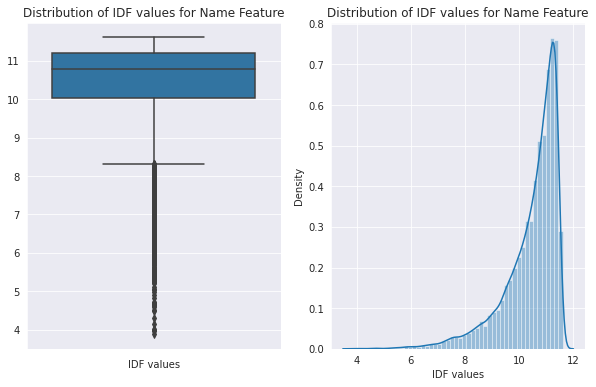

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
sns.boxplot(y=name_idf_values,ax = axes[0])
axes[0].set_xlabel('IDF values')
axes[0].set_title('Distribution of IDF values for Name Feature')

sns.distplot(name_idf_values,ax = axes[1])
axes[1].set_xlabel('IDF values')
axes[1].set_title('Distribution of IDF values for Name Feature')

plt.show()

In [ ]:
x_train_enc_name_TFIDF_transform = SelectKBest(k=20000).fit_transform(x_train_enc_name_TFIDF, y_train)
x_cv_enc_name_TFIDF_transform = SelectKBest(k=20000).fit_transform(x_cv_enc_name_TFIDF, y_cv)

In [ ]:
def vectorizershapeTransform(vect_dict):
  vect_dict_values = np.array(list(vect_dict.values()))
  vect_dict_values_IQR = np.percentile(vect_dict_values,75) - np.percentile(vect_dict_values,25)
  threshold = np.percentile(vect_dict_values,25)-(1.5*vect_dict_values_IQR) #Outlier Detection
  selected_features = list()
  for key, value in vect_dict.items():
    if value < threshold:
      selected_features.append(key)
  return selected_features

In [ ]:
selected_name_features = vectorizershapeTransform(name_TFIDF_dict)
stop_features = list()
for i in selected_name_features:
  wordcount = len(i.split(' '))
  if wordcount == 1:
    stop_features.append(i)

len(stop_features)

959

In [ ]:
x_train['name'].iloc[0:10]

train_id
1176952    iphone 7 case floating glitter new
1099282                    mickey mouse shirt
558194                  mac eyeshadow palette
1008481              2 liquid matte lipsticks
616167     slate kendra scott cassie bracelet
843245           girls night shirts lot 6 910
512923                    lularoe irma size l
1047484                hot pink kiss leggings
1149394                      new f21 bodysuit
215518                  2 gain bundles coosey
Name: name, dtype: object

In [ ]:
def text_feature_removal(data,stopwords):
  feature_corpus = list()
  for words in data.split(' '):
    if words not in stopwords:
      feature_corpus.append(words)

  sent = ' '.join(feature_corpus)
  return sent

In [ ]:
x_train['name'] = x_train['name'].apply(lambda x: text_feature_removal(x,stop_features))

In [ ]:
x_train['name'].iloc[0:10]

train_id
1176952               7 floating
1099282                         
558194                          
1008481                        2
616167                     slate
843245                     6 910
512923                         l
1047484                     kiss
1149394                      f21
215518     2 gain bundles coosey
Name: name, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=5, max_features=50000)
x_train_enc_item_description_TFIDF = TfidfVectorizer.fit_transform(x_train.item_description.values)
x_cv_enc_item_description_TFIDF = TfidfVectorizer.transform(x_cv.item_description.values)

item_description_TFIDF_dict = dict(zip(TfidfVectorizer.get_feature_names(),TfidfVectorizer.idf_))

print(x_train_enc_item_description_TFIDF.shape)
print(x_cv_enc_item_description_TFIDF.shape)

(726418, 50000)
(311322, 50000)


In [ ]:
x_train_enc_item_description_TFIDF_transform = SelectKBest(k=40000).fit_transform(x_train_enc_item_description_TFIDF, y_train)
x_cv_enc_item_description_TFIDF_transform = SelectKBest(k=40000).fit_transform(x_cv_enc_item_description_TFIDF, y_cv)

TFIDF-w2v Encoder on Text Data

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
import pickle
pickle.dump(glove_vectors,open('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/glove_vector.pkl','wb'))

In [ ]:
import pickle
glove_vectors = pickle.load(open('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/glove_vector.pkl','rb'))

In [ ]:
def tfidf_w2v(corpus,feature):
    tfidf_w2v = list()
    for sent in corpus:
        sent_vec = np.zeros(50)
        l= sent.split()
        weight_sum = 0
        for word in sent.split(): 
            if feature.get(word) != None and word in glove_vectors:
                word_vec = glove_vectors[word]
                tfidf = feature.get(word)*(l.count(word)/len(l))
                weight_sum += tfidf
                sent_vec += (word_vec*tfidf)
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_w2v.append(sent_vec)
    return np.array(tfidf_w2v)

In [ ]:
x_train_enc_name_TFIDF_w2v = tfidf_w2v(x_train.name.values,name_TFIDF_dict)
x_cv_enc_name_TFIDF_w2v = tfidf_w2v(x_cv.name.values,name_TFIDF_dict)

print(x_train_enc_name_TFIDF_w2v.shape)
print(x_cv_enc_name_TFIDF_w2v.shape)

(726418, 50)
(311322, 50)


In [ ]:
x_train_enc_item_description_TFIDF_w2v = tfidf_w2v(x_train.item_description.values,item_description_TFIDF_dict)
x_cv_enc_item_description_TFIDF_w2v = tfidf_w2v(x_cv.item_description.values,item_description_TFIDF_dict)

print(x_train_enc_item_description_TFIDF_w2v.shape)
print(x_cv_enc_item_description_TFIDF_w2v.shape)

(726418, 50)
(311322, 50)


BERT Encoder on Text Data

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
     |████████████████████████████████| 3.3 MB 31.7 MB/s 
     |████████████████████████████████| 61 kB 531 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

for layer in model.layers:
  layer.trainable = False

batch_size = 100
train_epochs = math.ceil(x_train.name.values.shape[0]/batch_size)
cv_epochs = math.ceil(x_cv.name.values.shape[0]/batch_size)

for i in tqdm(range(train_epochs)):
  if i <= train_epochs-2:
    x_train_enc_name_BERT = tokenizer(list(x_train.name.iloc[batch_size*i:batch_size*(i+1)].values), return_tensors='tf',padding=True,max_length = 512)
    x_train_enc_name_BERT_slice = x_train_enc_name_BERT.copy()
  else:
    x_train_enc_name_BERT = tokenizer(list(x_train.name.iloc[batch_size*i:]), return_tensors='tf',padding=True,max_length = 50)
    x_train_enc_name_BERT_slice = x_train_enc_name_BERT.copy()
  
  x_train_enc_name_BERT_new = model(x_train_enc_name_BERT_slice)

  if i > 0:
    x_train_enc_name_BERT_final = np.vstack((x_train_enc_name_BERT_old,x_train_enc_name_BERT_new[0][:,0,:]))
    x_train_enc_name_BERT_old = x_train_enc_name_BERT_final
  else:
    x_train_enc_name_BERT_old = x_train_enc_name_BERT_new[0][:,0,:]

for i in tqdm(range(cv_epochs)):
  if i <= cv_epochs-2:
    x_cv_enc_name_BERT = tokenizer(list(x_cv.name.iloc[batch_size*i:batch_size*(i+1)].values), return_tensors='tf',padding=True,max_length = 512)
    x_cv_enc_name_BERT_slice = x_cv_enc_name_BERT.copy()
  else:
    x_cv_enc_name_BERT = tokenizer(list(x_cv.name.iloc[batch_size*i:].values), return_tensors='tf',padding=True,max_length = 50)
    x_cv_enc_name_BERT_slice = x_cv_enc_name_BERT.copy()
  
  x_cv_enc_name_BERT_new = model(x_cv_enc_name_BERT_slice)
  
  if i > 0:
    x_cv_enc_name_BERT_final = np.vstack((x_cv_enc_name_BERT_old,x_cv_enc_name_BERT_new[0][:,0,:]))
    x_cv_enc_name_BERT_old =x_cv_enc_name_BERT_final
  else:
    x_cv_enc_name_BERT_old = x_cv_enc_name_BERT_new[0][:,0,:]

print(x_train_enc_name_BERT_final.shape)
print(x_cv_enc_name_BERT_final.shape)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
100%|██████████| 1186/1186 [03:41<00:00,  5.36it/s]

(1067389, 768)
(118599, 768)


In [ ]:
np.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_name_BERT_final',\
                      x_train_enc_name_BERT_final)
np.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_name_BERT_final',\
                      x_cv_enc_name_BERT_final)

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

for layer in model.layers:
  layer.trainable = False

batch_size = 50
train_epochs = math.ceil(x_train.item_description.values.shape[0]/batch_size)
cv_epochs = math.ceil(x_cv.item_description.values.shape[0]/batch_size)


for i in tqdm(range(train_epochs)):
  if i <= train_epochs-2:
    x_train_enc_item_description_BERT = tokenizer(list(x_train.item_description.iloc[batch_size*i:batch_size*(i+1)].values), return_tensors='tf',padding=True,max_length = 512)
    x_train_enc_item_description_BERT_slice = x_train_enc_item_description_BERT.copy()
  else:
    x_train_enc_item_description_BERT = tokenizer(list(x_train.item_description.iloc[batch_size*i:]), return_tensors='tf',padding=True,max_length = 50)
    x_train_enc_item_description_BERT_slice = x_train_enc_item_description_BERT.copy()
  
  x_train_enc_item_description_BERT_new = model(x_train_enc_item_description_BERT_slice)

  if i > 0:
    x_train_enc_item_description_BERT_final = np.vstack((x_train_enc_item_description_BERT_old,x_train_enc_item_description_BERT_new[0][:,0,:]))
    x_train_enc_item_description_BERT_old = x_train_enc_item_description_BERT_final
  else:
    x_train_enc_item_description_BERT_old = x_train_enc_item_description_BERT_new[0][:,0,:]


for i in tqdm(range(cv_epochs)):
  if i <= cv_epochs-2:
    x_cv_enc_item_description_BERT = tokenizer(list(x_cv.item_description.iloc[batch_size*i:batch_size*(i+1)].values), return_tensors='tf',padding=True,max_length = 512)
    x_cv_enc_item_description_BERT_slice = x_cv_enc_item_description_BERT.copy()
  else:
    x_cv_enc_item_description_BERT = tokenizer(list(x_cv.item_description.iloc[batch_size*i:].values), return_tensors='tf',padding=True,max_length = 50)
    x_cv_enc_item_description_BERT_slice = x_cv_enc_item_description_BERT.copy()
  
  x_cv_enc_item_description_BERT_new = model(x_cv_enc_item_description_BERT_slice)
  
  if i > 0:
    x_cv_enc_item_description_BERT_final = np.vstack((x_cv_enc_item_description_BERT_old,x_cv_enc_item_description_BERT_new[0][:,0,:]))
    x_cv_enc_item_description_BERT_old =x_cv_enc_item_description_BERT_final
  else:
    x_cv_enc_item_description_BERT_old = x_cv_enc_item_description_BERT_new[0][:,0,:]

print(x_train_enc_item_description_BERT_final.shape)
print(x_cv_enc_item_description_BERT_final.shape)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_transform', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
 23%|██▎       | 4936/21348 [47:35<3:11:25,  1.43it/s]

In [ ]:
np.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_item_description_BERT_final',\
                      x_train_enc_item_description_BERT_final)
np.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_item_description_BERT_final',\
                      x_cv_enc_item_description_BERT_final)

Normalization on len_words_name & len_words_item_description

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_name = MinMaxScaler.fit_transform(x_train.len_words_name.values.reshape(-1,1))
x_cv_len_words_name = MinMaxScaler.transform(x_cv.len_words_name.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_item_description = MinMaxScaler.fit_transform(x_train.len_words_item_description.values.reshape(-1,1))
x_cv_len_words_item_description = MinMaxScaler.transform(x_cv.len_words_item_description.values.reshape(-1,1))

In [ ]:
x_train_enc_vec_BOW = hstack((x_train_enc_cat,x_train_enc_name_BOW,x_train_enc_item_description_BOW,x_train_len_words_name,\
                          x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_BOW = hstack((x_cv_enc_cat,x_cv_enc_name_BOW,x_cv_enc_item_description_BOW,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_BOW.shape)
print(x_cv_enc_vec_BOW.shape)

(726418, 80410)
(311322, 80410)


In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_BOW.npz',\
                      x_train_enc_vec_BOW)
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_BOW.npz',\
                      x_cv_enc_vec_BOW)

In [ ]:
x_train_enc_vec_BOW = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_BOW.npz')
x_cv_enc_vec_BOW = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_BOW.npz')

In [ ]:
print(x_train_enc_vec_BOW.shape)
print(x_cv_enc_vec_BOW.shape)

(726418, 80410)
(311322, 80410)


In [ ]:
x_train_enc_vec_TFIDF = hstack((x_train_enc_cat,x_train_enc_name_TFIDF,x_train_enc_item_description_TFIDF,x_train_len_words_name,\
                          x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF,x_cv_enc_item_description_TFIDF,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF.shape)
print(x_cv_enc_vec_TFIDF.shape)

(726418, 80410)
(311322, 80410)


In [ ]:
x_train_enc_vec_TFIDF_transform = hstack((x_train_enc_cat,x_train_enc_name_TFIDF_transform,x_train_enc_item_description_TFIDF_transform,\
                                x_train_len_words_name,x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF_transform = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF_transform,x_cv_enc_item_description_TFIDF_transform,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF_transform.shape)
print(x_cv_enc_vec_TFIDF_transform.shape)

(726418, 65411)
(311322, 65411)


In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_TFIDF.npz',\
                      x_train_enc_vec_TFIDF)
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_TFIDF.npz',\
                      x_cv_enc_vec_TFIDF)

In [ ]:
x_train_enc_vec_TFIDF = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_TFIDF.npz')
x_cv_enc_vec_TFIDF = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_TFIDF.npz')

In [ ]:
print(x_train_enc_vec_TFIDF_transform.shape)
print(x_cv_enc_vec_TFIDF_transform.shape)

(726418, 65411)
(311322, 65411)


In [ ]:
x_train_enc_vec_TFIDF_w2v = hstack((x_train_enc_cat,x_train_enc_name_TFIDF_w2v,x_train_enc_item_description_TFIDF_w2v,\
                                    x_train_len_words_name,x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF_w2v = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF_w2v,x_cv_enc_item_description_TFIDF_w2v,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF_w2v.shape)
print(x_cv_enc_vec_TFIDF_w2v.shape)

(726418, 5510)
(311322, 5510)


In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_TFIDF_w2v.npz',\
                      x_train_enc_vec_TFIDF_w2v)
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_TFIDF_w2v.npz',\
                      x_cv_enc_vec_TFIDF_w2v)

In [ ]:
x_train_enc_vec_TFIDF_w2v = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_TFIDF_w2v.npz')
x_cv_enc_vec_TFIDF_w2v = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_TFIDF_w2v.npz')

In [ ]:
print(x_train_enc_vec_TFIDF_w2v.shape)
print(x_cv_enc_vec_TFIDF_w2v.shape)

(726418, 5510)
(311322, 5510)


In [ ]:
x_train_enc_vec_BERT = hstack((x_train_enc_cat,x_train_enc_name_BERT_final,x_train_enc_item_description_BERT_final,\
                                    x_train_len_words_name,x_train_len_words_item_description))

x_cv_enc_vec_BERT= hstack((x_cv_enc_cat,x_cv_enc_name_BERT_final,x_cv_enc_item_description_BERT_final,x_cv_len_words_name,\
                          x_cv_len_words_item_description))

print(x_train_enc_vec_BERT.shape)
print(x_cv_enc_vec_BERT.shape)

In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_BERT.npz',\
                      x_train_enc_vec_BERT)
scipy.sparse.save_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_BERT.npz',\
                      x_cv_enc_vec_BERT)

In [ ]:
x_train_enc_vec_BERT = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_train_enc_vec_BERT.npz')
x_cv_enc_vec_BERT = scipy.sparse.load_npz('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sparse_Matrix/x_cv_enc_vec_BERT.npz')

In [ ]:
print(x_train_enc_vec_BERT.shape)
print(x_cv_enc_vec_BERT.shape)

##Model

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from random import sample
from sklearn.metrics import mean_squared_error
import datetime
tbl1 = PrettyTable()
tbl2 = PrettyTable()

In [ ]:
def ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,Encoding,x_train,y_train,x_cv,y_cv,r2=False):

  samples_hyperparam = dict()
  train_error_dict = dict()
  cv_error_dict = dict()

  for idx in range(1,len(model_name.keys())+1):
    for index in range(no_of_samples):
        params = list()
        x_cv_sample,y_cv_sample = RandomsampleGeneration(x_cv,y_cv)
        reg_RandomizedSearchCV = RandomizedSearchCV(model_dict[idx],hyperparam_dict[idx],scoring = 'r2',cv=5,\
                                    return_train_score = True, verbose=3, n_jobs=-1)
        reg_RandomizedSearchCV.fit(x_cv_sample,y_cv_sample)
        best_sample_params = reg_RandomizedSearchCV.best_params_
        cv_results_ = pd.DataFrame(reg_RandomizedSearchCV.cv_results_)
        
        for name in hyper_param_name[idx]:
          name = 'param_'+ name
          params.append(name)
        
        params.extend(['mean_train_score','mean_test_score'])

        if model_name[idx] == 'Ridge' or model_name[idx] == 'Lasso':
          print('Train vs Validation Error plot for {} with best hyperparameter {}'.format(samples[index],best_sample_params))
          print('='*100)
          print(datadisplay(cv_results_[params]))
          Errorplot(cv_results_)
        else:
          print('Sample {} with best hyperparameter {}'.format(samples[index],best_sample_params))
          print('='*100)
          print(datadisplay(cv_results_[params]))

        samples_hyperparam[samples[index]] = best_sample_params

    best_params = bestparamselection(samples_hyperparam,hyper_param_name[idx])

    print('Best param for model: {} is {}'.format(model_name[idx],best_params))
    
    train_error, cv_error = ModelPrediction(model_name[idx],best_params,x_train,y_train,x_cv,y_cv.values,r2)
    cv_error_dict[model_name[idx]] = round(cv_error,4)
    train_error_dict[model_name[idx]] = round(train_error,4)

  #print(cv_error_dict)
  #print(train_error_dict)

  tbl1.field_names = ['Model','Encoding Type','Train RMSLE-Score']
  for key, val in train_error_dict.items():
    tbl1.add_row([key,Encoding,val])
  
  tbl2.field_names = ['Model','Encoding Type','Test RMSLE-Score']
  for key, val in cv_error_dict.items():
    tbl2.add_row([key,Encoding,val])

  return tbl1,tbl2

  #print('Model: {} is completed with RMSLE as {}'.format(model_name[idx],error_report))

In [ ]:
def Errorplot(df):
  plt.plot(df['param_alpha'],df['mean_train_score'], color = 'blue',label = 'train score')
  plt.plot(df['param_alpha'],df['mean_test_score'], color = 'orange',label = 'test score')
  plt.legend()
  plt.xlabel('alpha')
  plt.ylabel('Negeative Mean Absolute Error')
  plt.title('Train Error vs Validation Error')
  plt.show()

In [ ]:
def RandomsampleGeneration(x,y):
  np.random.seed(4)
  datalength = x.shape[0]
  indexlist = [i for i in range(datalength)]
  sample_index = sample(indexlist,math.floor((datalength*30)/100))
  sample_x = x[sample_index,:]
  sample_y = y.values[sample_index]
  return sample_x,sample_y

In [ ]:
def bestparamselection(paramdict,hyperparam):
  
  best_params = dict()
  paramlist = list(paramdict.values())
  #print(paramlist)
  
  for param in hyperparam:
    sample_params = dict()
    bestparamvaluelist = [val[param] for val in paramlist]

    for value in set(bestparamvaluelist):
      sample_params[value] = bestparamvaluelist.count(value)

    #print(sample_params)

    best_param_count = sorted(list(sample_params.values()),reverse = True)[0]
    for key, val in sample_params.items():
      if val == best_param_count:
        best_params_val = key
        break
  
    best_params[param]= best_params_val

  return best_params

In [ ]:
def ModelPrediction(modelname,best_params,x_train,y_train,x_cv,y_cv,r2=False):
  if modelname == 'Lasso':
    model = Lasso(alpha = best_params['alpha'])
  elif modelname == 'Ridge':
    model = Ridge(alpha = best_params['alpha'],solver='sag',random_state=42)
  elif modelname == 'SVR':
    model = SVR(C = best_params['C'],epsilon = best_params['epsilon'])
  elif modelname == 'DecisionTreeRegressor':
    model = DecisionTreeRegressor(max_depth = best_params['max_depth'],min_samples_split = best_params['min_samples_split'],\
                                  max_leaf_nodes = best_params['max_leaf_nodes'],random_state=40)
  elif modelname == 'RandomForestRegressor':
    model = RandomForestRegressor(max_depth = best_params['max_depth'],min_samples_split = best_params['min_samples_split'],\
                                  n_estimators = best_params['n_estimators'],n_jobs=-1, random_state=40)
  elif modelname == 'XGBRegressor':
    model = XGBRegressor(learning_rate = best_params['learning_rate'],gamma = best_params['gamma'],\
                                  n_estimators = best_params['n_estimators'],max_depth = best_params['max_depth'],n_jobs=-1, random_state=40)
  elif modelname == 'LinearSVR':
    model = LinearSVR(C = best_params['C'],random_state=40)

  model.fit(x_train,y_train)
  #print('model fit completed...')
  predict_cv_result = model.predict(x_cv)
  predict_train_result = model.predict(x_train)
  
  #print(predict_cv_result)
  #print(predict_train_result)

  cv_error = RMSLE(y_cv,predict_cv_result)
  train_error = RMSLE(y_train.values,predict_train_result)

  #print('cv_error is {}'.format(cv_error))
  #print('train_error is {}'.format(train_error))

  if r2 == True:
    print('Model: {} is completed with R^2 value as {}'.format(model,r2_score(y_cv,predict_cv_result)))
    
  return train_error,cv_error

##Benchmark Linear Model

Lasso & Ridge Regression with BOW encoded vector

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+-------------------------+
| param_alpha |   mean_train_score  |     mean_test_score     |
+-------------+---------------------+-------------------------+
|     0.01    | 0.18793337472008922 |   0.18735638384687525   |
|     0.1     |         0.0         | -0.00010560522878684253 |
|      1      |         0.0         | -0.00010560522878684253 |
+-------------+---------------------+-------------------------+


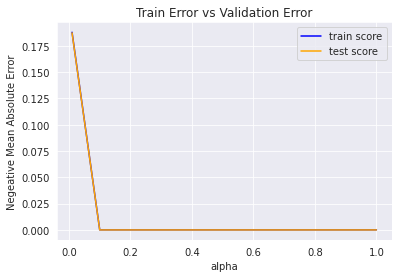

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.19610890269506276 |  0.19543375463673468   |
|     0.1     |         0.0         | -7.108705604670362e-05 |
|      1      |         0.0         | -7.108705604670362e-05 |
+-------------+---------------------+------------------------+


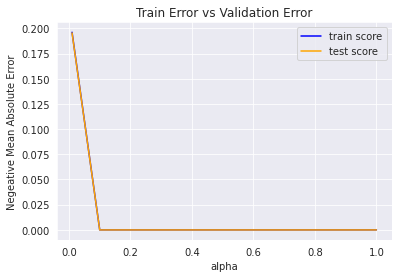

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+-------------------------+
| param_alpha |   mean_train_score  |     mean_test_score     |
+-------------+---------------------+-------------------------+
|     0.01    | 0.18916577129654505 |   0.18849412458732162   |
|     0.1     |         0.0         | -1.2508726439408591e-05 |
|      1      |         0.0         | -1.2508726439408591e-05 |
+-------------+---------------------+-------------------------+


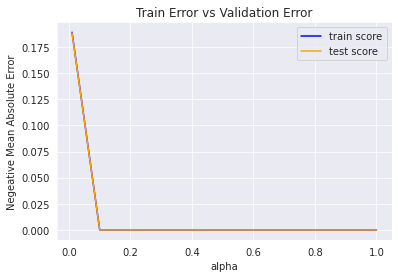

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+-----------------------+
| param_alpha |   mean_train_score  |    mean_test_score    |
+-------------+---------------------+-----------------------+
|     0.01    | 0.19030546505298554 |  0.18977901646472306  |
|     0.1     |         0.0         | -4.42956337852074e-05 |
|      1      |         0.0         | -4.42956337852074e-05 |
+-------------+---------------------+-----------------------+


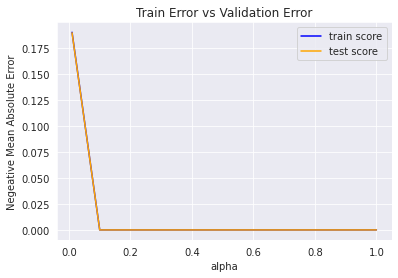

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.19222307475729977 |  0.19163749328997032   |
|     0.1     |         0.0         | -7.583004012698958e-05 |
|      1      |         0.0         | -7.583004012698958e-05 |
+-------------+---------------------+------------------------+


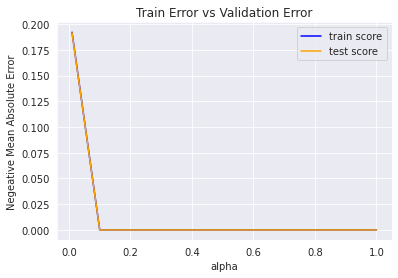

Best param for model: Lasso is {'alpha': 0.01}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 1}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.8170848768916625 | 0.44072616884461696 |
|     0.1     | 0.8159251614471061 | 0.44343539199332904 |
|      1      | 0.8053241447482098 |  0.4650047297871332 |
+-------------+--------------------+---------------------+


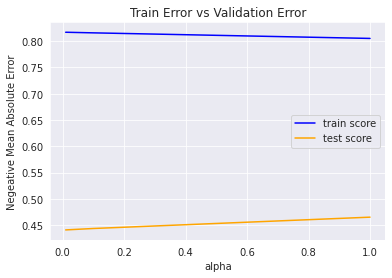

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 1}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.827828173768939  | 0.40098514048163825 |
|     0.1     | 0.825957522268032  | 0.40641566654986583 |
|      1      | 0.8099392574408475 |  0.4443292034948817 |
+-------------+--------------------+---------------------+


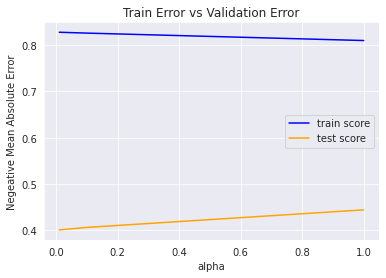

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 1}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.8185617314044524 |  0.4188364674739386 |
|     0.1     | 0.8172417626664495 |  0.4223200934027155 |
|      1      | 0.8052461297544383 | 0.44923029134362497 |
+-------------+--------------------+---------------------+


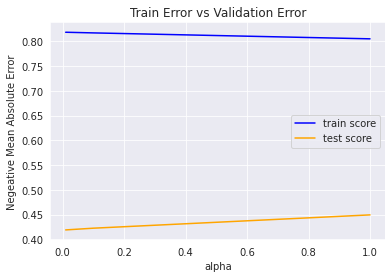

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 1}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.8079109749247271 | 0.44553055334886305 |
|     0.1     | 0.8067219647855899 |  0.4480670950435945 |
|      1      | 0.7961780700928813 |  0.4677980660794126 |
+-------------+--------------------+---------------------+


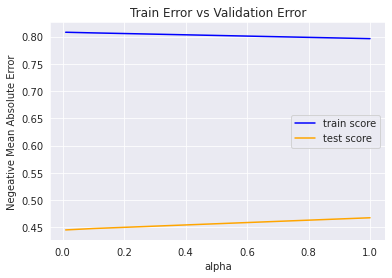

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 1}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.8221683556020987 |  0.4183205573848488 |
|     0.1     | 0.8208140526566247 | 0.42202213613163514 |
|      1      | 0.8088820663329459 |  0.449823412099165  |
+-------------+--------------------+---------------------+


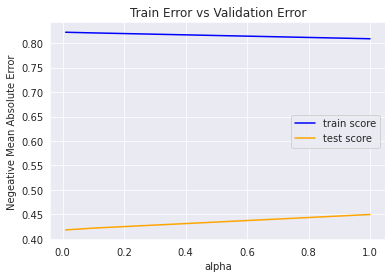

Best param for model: Ridge is {'alpha': 1}
Exceution time taken: 1:38:26.664198
+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Lasso |      BOW      |       0.7117      |
| Ridge |      BOW      |       0.4603      |
+-------+---------------+-------------------+
--------------------------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Lasso |      BOW      |      0.7099      |
| Ridge |      BOW      |      0.4995      |
+-------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Lasso',2: 'Ridge'})
hyper_param_name = dict({1: ['alpha'],2: ['alpha']})
model_dict = dict({1: Lasso(),2: Ridge(solver='sag',random_state=42)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,1)]},2:{'alpha': [10**x for x in range(-2,1)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'BOW',x_train_enc_vec_BOW,y_train,x_cv_enc_vec_BOW,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))
print(output1)
print('-'*50)
print(output2)


Lasso & Ridge Regression with TFIDF encoded vector

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7344544036906783 | -0.7346369072443985 |
|     0.1     | -0.7902551354958469 | -0.7902662729732794 |
|      1      | -0.7902551354958469 | -0.7902662729732794 |
+-------------+---------------------+---------------------+


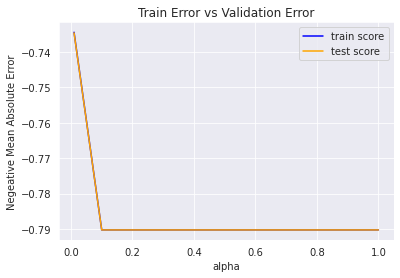

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7326158919781004 | -0.7327626732202275 |
|     0.1     | -0.7890041440429708 | -0.7890026776428524 |
|      1      | -0.7890041440429708 | -0.7890026776428524 |
+-------------+---------------------+---------------------+


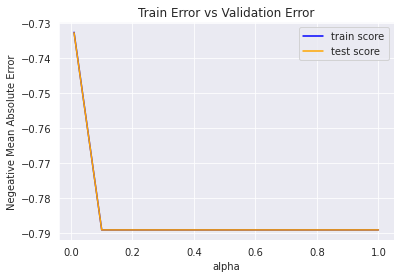

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7331831372301686 | -0.7332685376073803 |
|     0.1     | -0.7901916883500351 | -0.7901877467132613 |
|      1      | -0.7901916883500351 | -0.7901877467132613 |
+-------------+---------------------+---------------------+


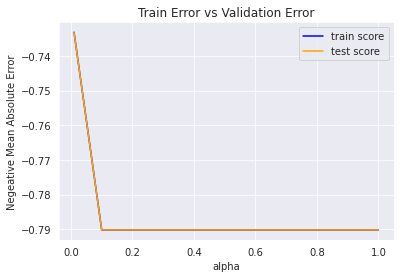

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7347637797981517 |  -0.734885516708272 |
|     0.1     |  -0.791561396220725 | -0.7915556146744491 |
|      1      |  -0.791561396220725 | -0.7915556146744491 |
+-------------+---------------------+---------------------+


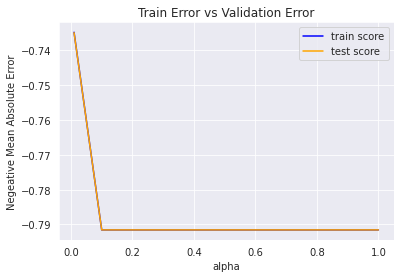

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7363258466823911 |  -0.736447012727141 |
|     0.1     |  -0.79232359604307  | -0.7923358484181758 |
|      1      |  -0.79232359604307  | -0.7923358484181758 |
+-------------+---------------------+---------------------+


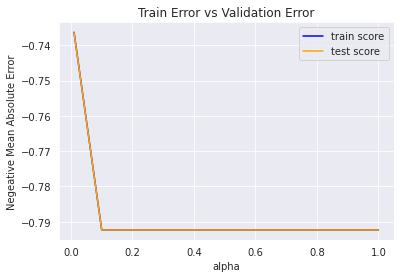

Best param for model: Lasso is {'alpha': 0.01}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.2385559274081539 | -0.7851760697641744 |
|     0.1     | -0.2773170673044386 | -0.6460013678307713 |
|      1      | -0.3656679722988185 | -0.5428575977959327 |
+-------------+---------------------+---------------------+


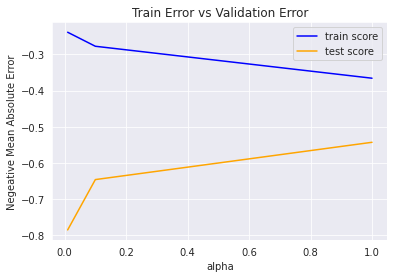

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 1}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.23948984201389073 | -0.7719706008288728 |
|     0.1     | -0.2769637238005629  | -0.6405227832127902 |
|      1      | -0.36415156879750377 | -0.5390004139615334 |
+-------------+----------------------+---------------------+


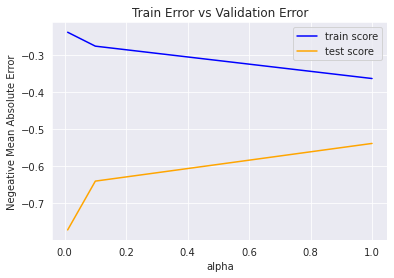

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 1}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.23728622004486746 | -0.7758110147436548 |
|     0.1     | -0.2753110967691874  | -0.6438360037618469 |
|      1      | -0.36481020455658686 | -0.5416477719735425 |
+-------------+----------------------+---------------------+


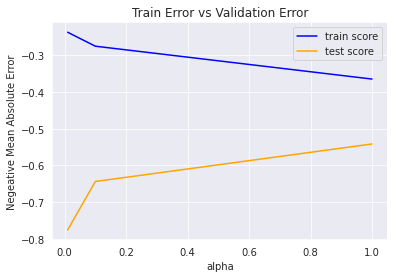

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.2353660080022036 | -0.7805027247989387 |
|     0.1     | -0.2739158853749456 | -0.6445312711174831 |
|      1      |  -0.364285433347172 | -0.5417112386555504 |
+-------------+---------------------+---------------------+


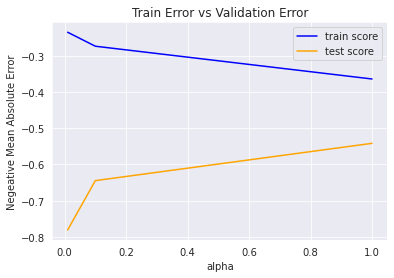

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 1}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.2391200702466075  | -0.7662979757329129 |
|     0.1     | -0.2743835699506407  | -0.6433640582753194 |
|      1      | -0.36364878946307844 | -0.5399680237289826 |
+-------------+----------------------+---------------------+


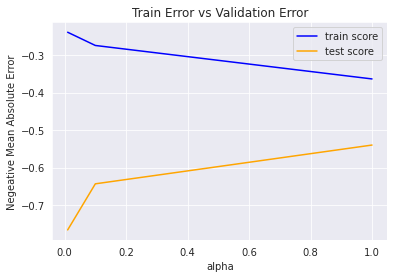

Best param for model: Ridge is {'alpha': 1}
Exceution time taken: 1:14:47.220693
+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Lasso |     TF-IDF    |       0.7356      |
| Ridge |     TF-IDF    |       0.4559      |
+-------+---------------+-------------------+
--------------------------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Lasso |     TF-IDF    |      0.734       |
| Ridge |     TF-IDF    |      0.4948      |
+-------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Lasso',2: 'Ridge'})
hyper_param_name = dict({1: ['alpha'],2: ['alpha']})
model_dict = dict({1: Lasso(),2: Ridge(solver='sag',random_state=42)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,1)]},2:{'alpha': [10**x for x in range(-2,1)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,y_train,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))
print(output1)
print('-'*50)
print(output2)


Lasso & Ridge Regression with TFIDF-W2V encoded vector

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7090922622477859 | -0.7093221002368227 |
|     0.1     | -0.7883733478556378 | -0.7883594025618805 |
|      1      | -0.7883733478556378 | -0.7883594025618805 |
+-------------+---------------------+---------------------+


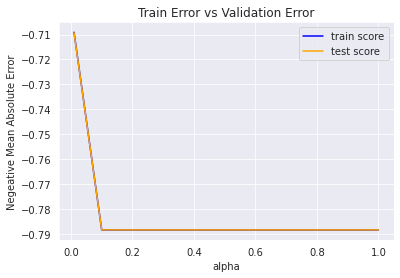

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7115275451744604 | -0.7117667722072571 |
|     0.1     | -0.7905957609598715 | -0.7905978432511451 |
|      1      | -0.7905957609598715 | -0.7905978432511451 |
+-------------+---------------------+---------------------+


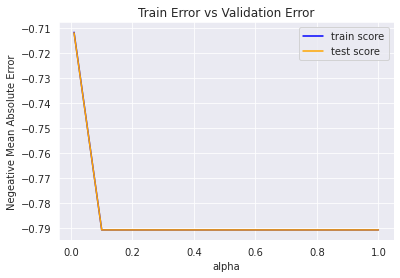

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7105592008910306 | -0.7108056930361619 |
|     0.1     | -0.7916311010658522 | -0.7916197899360585 |
|      1      | -0.7916311010658522 | -0.7916197899360585 |
+-------------+---------------------+---------------------+


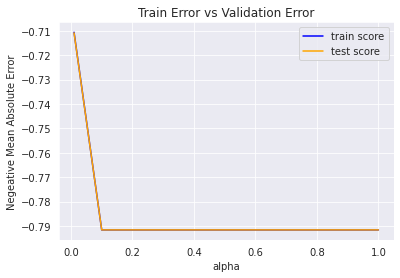

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7109070982742997 | -0.7111445133493296 |
|     0.1     | -0.7930999724145599 | -0.7931099237478321 |
|      1      | -0.7930999724145599 | -0.7931099237478321 |
+-------------+---------------------+---------------------+


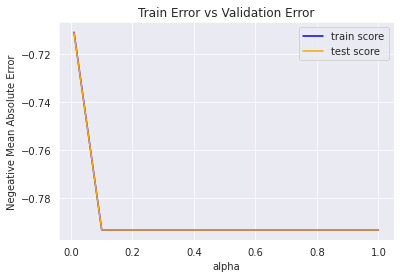

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7090386897579017 | -0.7092461797070795 |
|     0.1     |  -0.787977083530237 | -0.7879699135041804 |
|      1      |  -0.787977083530237 | -0.7879699135041804 |
+-------------+---------------------+---------------------+


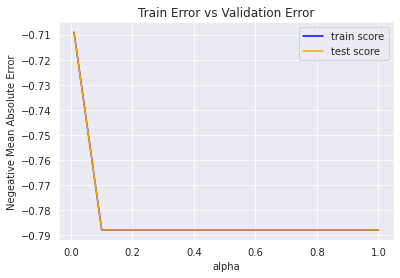

Best param for model: Lasso is {'alpha': 0.01}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5764870806134177 | -0.5980472477198264 |
|     0.1     | -0.5766115220103216 | -0.5973358431759926 |
|      1      | -0.5783054089726688 | -0.5950319698503483 |
+-------------+---------------------+---------------------+


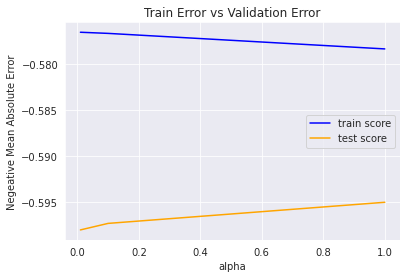

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5816063016761588 | -0.6029570246363283 |
|     0.1     | -0.5817170007589691 | -0.6023939533239344 |
|      1      | -0.5832675895079521 |  -0.600345777428203 |
+-------------+---------------------+---------------------+


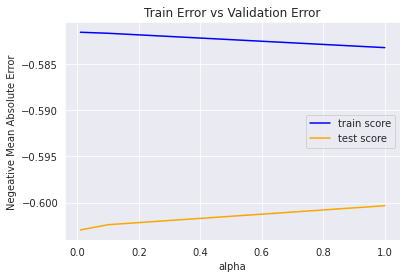

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5765009308417115 | -0.5966411032658566 |
|     0.1     | -0.5766275920049952 | -0.5959609299195165 |
|      1      | -0.5781661456328937 | -0.5939010649345146 |
+-------------+---------------------+---------------------+


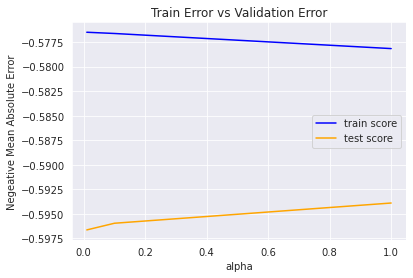

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5775012106916219 | -0.5980149614288681 |
|     0.1     | -0.5776198761863875 | -0.5974456638105057 |
|      1      | -0.5791900650784203 | -0.5954025661428379 |
+-------------+---------------------+---------------------+


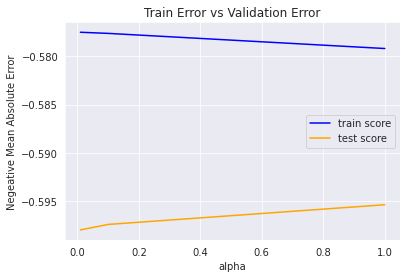

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5759573773213467 | -0.5950364692210888 |
|     0.1     | -0.5760870048975193 | -0.5946426035233696 |
|      1      | -0.5776264418087584 | -0.5931961864701163 |
+-------------+---------------------+---------------------+


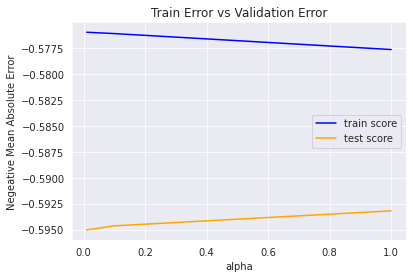

Best param for model: Ridge is {'alpha': 1}
Exceution time taken: 0:41:43.004184
+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Lasso |     TF-IDF    |       0.7356      |
| Ridge |     TF-IDF    |       0.4559      |
| Lasso |   TFIDF-W2V   |       0.7112      |
| Ridge |   TFIDF-W2V   |       0.5849      |
+-------+---------------+-------------------+
--------------------------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Lasso |     TF-IDF    |      0.734       |
| Ridge |     TF-IDF    |      0.4948      |
| Lasso |   TFIDF-W2V   |      0.7099      |
| Ridge |   TFIDF-W2V   |      0.589       |
+-------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Lasso',2: 'Ridge'})
hyper_param_name = dict({1: ['alpha'],2: ['alpha']})
model_dict = dict({1: Lasso(),2: Ridge(solver='sag',random_state=42)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,1)]},2:{'alpha': [10**x for x in range(-2,1)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TFIDF-W2V',x_train_enc_vec_TFIDF_w2v,y_train,x_cv_enc_vec_TFIDF_w2v,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

In [ ]:
print(tbl1)
print('-'*30)
print(tbl2)

+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Lasso |     TF-IDF    |       0.7356      |
| Ridge |     TF-IDF    |       0.4559      |
| Lasso |   TFIDF-W2V   |       0.7112      |
| Ridge |   TFIDF-W2V   |       0.5849      |
| Lasso |      BOW      |       0.7117      |
| Ridge |      BOW      |       0.4603      |
+-------+---------------+-------------------+
------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Lasso |     TF-IDF    |      0.734       |
| Ridge |     TF-IDF    |      0.4948      |
| Lasso |   TFIDF-W2V   |      0.7099      |
| Ridge |   TFIDF-W2V   |      0.589       |
| Lasso |      BOW      |      0.7099      |
| Ridge |      BOW      |      0.4995      |
+-------+---------------+------------------+


Best Model - Ridge Regression with TFIDF Encoded Vector with RMSLE score as 0.4948

##Model Execution with Selected Features

Feature Selection

In [ ]:
print('TFIDF Encoded Vector shape: {}'.format((x_train_enc_vec_TFIDF_transform.shape,x_cv_enc_vec_TFIDF_transform.shape)))

TFIDF Encoded Vector shape: ((726418, 65411), (311322, 65411))


In [ ]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold = 0.0002)

x_train_enc_name_TFIDF_filter = constant_filter.fit_transform(x_train_enc_name_TFIDF_transform)
x_cv_enc_name_TFIDF_filter = constant_filter.transform(x_cv_enc_name_TFIDF_transform)

constant_filter = VarianceThreshold(threshold = 0.0002)

x_train_enc_item_description_TFIDF_filter = constant_filter.fit_transform(x_train_enc_item_description_TFIDF_transform)
x_cv_enc_item_description_TFIDF_filter = constant_filter.transform(x_cv_enc_item_description_TFIDF_transform)

print(x_train_enc_name_TFIDF_filter.shape,x_cv_enc_name_TFIDF_filter.shape)
print(x_train_enc_item_description_TFIDF_filter.shape,x_cv_enc_item_description_TFIDF_filter.shape)

(726418, 771) (311322, 771)
(726418, 587) (311322, 587)


In [ ]:
x_train_enc_vec_TFIDF_filter = hstack((x_train_enc_cat,x_train_enc_name_TFIDF_filter,x_train_enc_item_description_TFIDF_filter,x_train_len_words_name,\
                          x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF_filter = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF_filter,x_cv_enc_item_description_TFIDF_filter,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF_filter.shape)
print(x_cv_enc_vec_TFIDF_filter.shape)

(726418, 6769)
(311322, 6769)


Best Benchmark Model call based upon Transformed TFIDF encoded vector

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5391079069654676 | -0.5698048833562798 |
|     0.1     | -0.5392351112191289 | -0.5686861407370036 |
|      1      | -0.5410222314882003 |  -0.565670401763775 |
|      10     | -0.5517707784682043 | -0.5666553361794213 |
+-------------+---------------------+---------------------+


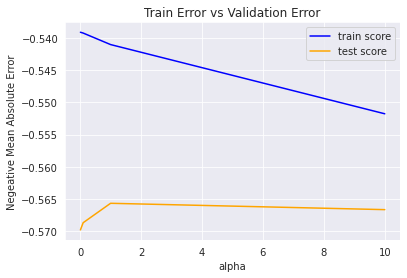

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5407143002694632 | -0.5724190740987678 |
|     0.1     | -0.5408418195060255 | -0.5713133578124107 |
|      1      | -0.5427194806056769 |  -0.568207413338576 |
|      10     |  -0.553866123623299 | -0.5690491785568849 |
+-------------+---------------------+---------------------+


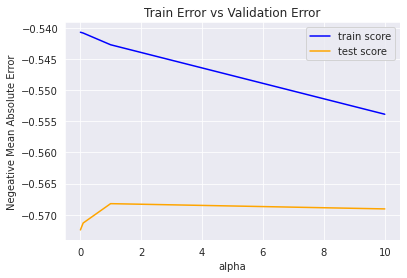

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5407289115931488 | -0.5712267000551341 |
|     0.1     | -0.5408439435334682 | -0.5700660893023668 |
|      1      | -0.5426133337452375 | -0.5669730239440263 |
|      10     |  -0.553337617563216 | -0.5680251980294384 |
+-------------+---------------------+---------------------+


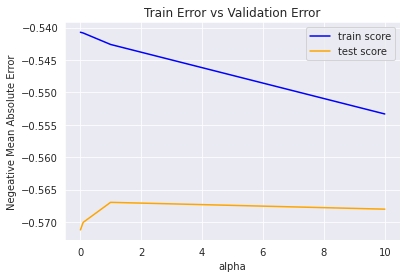

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.5385354939964826 | -0.5694261914764995 |
|     0.1     | -0.5386460721260306 | -0.5685536670242926 |
|      1      |  -0.540433135635298 | -0.5657200494593917 |
|      10     | -0.5515786011513326 | -0.5667534950907938 |
+-------------+---------------------+---------------------+


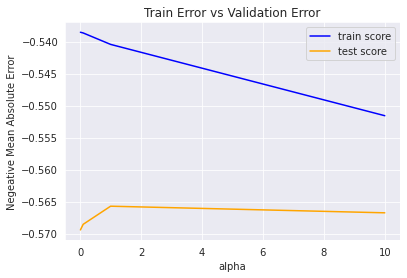

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 1}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    |  -0.539418249167235 | -0.5706157836688295 |
|     0.1     |  -0.539545912286286 | -0.5695939911069894 |
|      1      | -0.5413097250930597 | -0.5666134373626722 |
|      10     | -0.5518020082801233 | -0.5670374891544551 |
+-------------+---------------------+---------------------+


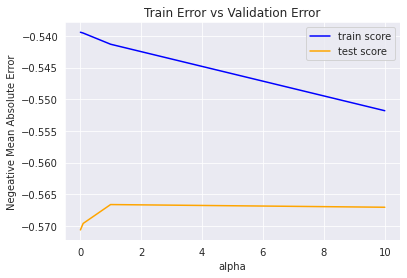

Best param for model: Ridge is {'alpha': 1}
Model: Ridge(alpha=1, random_state=42, solver='sag') is completed with R^2 value as 0.5048430467659888
Exceution time taken: 0:07:28.381373
+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Ridge | TF-IDF filter |       0.5512      |
+-------+---------------+-------------------+
--------------------------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Ridge | TF-IDF filter |      0.5558      |
+-------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Ridge'})
hyper_param_name = dict({1: ['alpha']})
model_dict = dict({1: Ridge(solver='sag',random_state=42)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,2)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF filter',x_train_enc_vec_TFIDF_filter,\
                               y_train,x_cv_enc_vec_TFIDF_filter,y_cv,r2=True)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)


It didn't perform well with the selected features.

Tree Based Models and Ensemble Models

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))

model_name = dict({1: 'DecisionTreeRegressor'})
hyper_param_name = dict({1: ['max_depth','min_samples_split','max_leaf_nodes']})
model_dict = dict({1: DecisionTreeRegressor(random_state = 40)})
hyperparam_dict = dict({1:{'max_depth': [10**x for x in range(0,3)],'min_samples_split': [10**x for x in range(0,3)],\
                           'max_leaf_nodes': [10**x for x in range(0,3)]}})


output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,y_train,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Sample s1 with best hyperparameter {'min_samples_split': 10, 'max_leaf_nodes': 100, 'max_depth': 10}
+-----------------+-------------------------+----------------------+---------------------+---------------------+
| param_max_depth | param_min_samples_split | param_max_leaf_nodes |   mean_train_score  |   mean_test_score   |
+-----------------+-------------------------+----------------------+---------------------+---------------------+
|       100       |            1            |         100          |         nan         |         nan         |
|        10       |            10           |         100          | -0.6715988613767653 | -0.6797342700219966 |
|       100       |            10           |          10          |  -0.722453705896241 |  -0.722379371541469 |
|        1        |            1            |          1           |         nan         |         nan         |
|        1        |            1            |  

Clearly, Tree based models are not giving good result.

###**Best Model- Ridge Regression Error Analysis**

Model Execution time: 0:00:48.778073
****Error Distribution****


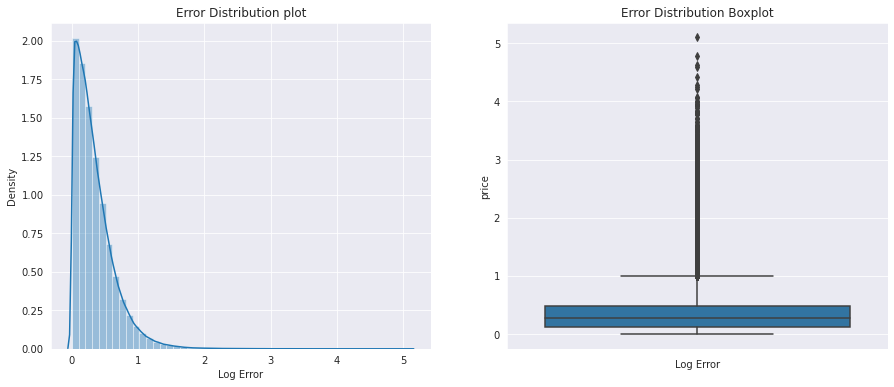

In [ ]:
start_time = datetime.datetime.now()
model = Ridge(alpha = 1,solver='sag',random_state=42)
model.fit(x_train_enc_vec_TFIDF,y_train)
y_pred = model.predict(x_train_enc_vec_TFIDF)

error = abs(y_train - y_pred)

print('Model Execution time: {}'.format(datetime.datetime.now()-start_time))
print('****Error Distribution****')

fig, axes = plt.subplots(1,2,figsize = (15,6))

sns.distplot(error, ax = axes[0])
axes[0].set_xlabel('Log Error')
axes[0].set_title('Error Distribution plot')

sns.boxplot(y = error, ax = axes[1])
axes[1].set_xlabel('Log Error')
axes[1].set_title('Error Distribution Boxplot')

plt.show()

In [ ]:
for i in range(0,101,10):
  print('{} th percentile of Error is: {}'.format(i,round(np.percentile(error.values, i),4)))

0 th percentile of Error is: 0.0
10 th percentile of Error is: 0.049
20 th percentile of Error is: 0.0991
30 th percentile of Error is: 0.1515
40 th percentile of Error is: 0.2071
50 th percentile of Error is: 0.2686
60 th percentile of Error is: 0.339
70 th percentile of Error is: 0.4246
80 th percentile of Error is: 0.538
90 th percentile of Error is: 0.7242
100 th percentile of Error is: 5.0992


In [ ]:
for i in range(90,101,1):
  print('{} th percentile of Error is: {}'.format(i,round(np.percentile(error.values, i),4)))

90 th percentile of Error is: 0.7242
91 th percentile of Error is: 0.7519
92 th percentile of Error is: 0.7837
93 th percentile of Error is: 0.8194
94 th percentile of Error is: 0.8597
95 th percentile of Error is: 0.9083
96 th percentile of Error is: 0.9698
97 th percentile of Error is: 1.0479
98 th percentile of Error is: 1.1628
99 th percentile of Error is: 1.3675
100 th percentile of Error is: 5.0992


From the above distribution we could see most of the points are correctly predicted. Need to identify the data points where the model is giving bad result.

In [ ]:
error_df = pd.DataFrame(error.values, columns=['error'],index = error.index)
sel_error_df = error_df[error_df.error >= np.percentile(error,96)]
sel_error_df.head()

error
train_id          
930102    0.987738
314753    1.533366
745525    1.165045
899964    1.001239
1093817   1.129125

##Segmenting the errored dataset to train different model from X_train

In [ ]:
x_train_err = x_train.loc[sel_error_df.index]
y_train_err = y_train.loc[sel_error_df.index]

In [ ]:
print(x_train_err.shape,y_train_err.shape)

(29057, 10) (29057,)


In [ ]:
x_train.drop(x_train_err.index, inplace= True)
y_train.drop(y_train_err.index, inplace= True)

In [ ]:
print(x_train.shape,y_train.shape)

(697361, 10) (697361,)


In [ ]:
x_train_err.head()

name  ... len_words_name
train_id                                      ...               
930102     hold for sorona funko mr meeseeks  ...              6
314753                 mini miracle eye wand  ...              4
745525               lularoe classic tee 3xl  ...              4
899964    urban decay nyc eye shadow palette  ...              6
1093817               popsockets do buy item  ...              4

[5 rows x 10 columns]

In [ ]:
x_train_err.brand_name.value_counts()/x_train_err.shape[0]*100

missing             49.953540
apple                2.495096
nintendo             1.971986
pink                 1.837767
victorias secret     1.727639
                      ...    
justin               0.003442
dockers              0.003442
disney baby          0.003442
mitchum              0.003442
guinness             0.003442
Name: brand_name, Length: 1017, dtype: float64

In [ ]:
x_train.brand_name.value_counts()/x_train.shape[0]*100

missing             42.218162
pink                 3.754583
nike                 3.703964
victorias secret     3.311054
lularoe              2.170899
                      ...    
hanky panky          0.000143
alba                 0.000143
sportbrain           0.000143
danier               0.000143
lil critters         0.000143
Name: brand_name, Length: 3956, dtype: float64

##Vectorization on newly created Dataset post removal of erroneous data points

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_item_cnd = CountVectorizer.fit_transform(x_train.item_condition_id.values)
x_cv_item_cnd = CountVectorizer.transform(x_cv.item_condition_id.values)

print(x_train_item_cnd.shape)
print(x_cv_item_cnd.shape)

(697361, 5)
(311322, 5)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
x_train_shipping = OneHotEncoder.fit_transform(x_train.shipping.values.reshape(-1,1))
x_cv_shipping = OneHotEncoder.transform(x_cv.shipping.values.reshape(-1,1))

print(x_train_shipping.shape)
print(x_cv_shipping.shape)

(697361, 2)
(311322, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_brand_name = CountVectorizer.fit_transform(x_train.brand_name.values)
x_cv_brand_name = CountVectorizer.transform(x_cv.brand_name.values)

print(x_train_brand_name.shape)
print(x_cv_brand_name.shape)

(697361, 4319)
(311322, 4319)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier1_category_name = CountVectorizer.fit_transform(x_train.Tier1_category_name.values)
x_cv_Tier1_category_name = CountVectorizer.transform(x_cv.Tier1_category_name.values)

print(x_train_Tier1_category_name.shape)
print(x_cv_Tier1_category_name.shape)

(697361, 12)
(311322, 12)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier2_category_name = CountVectorizer.fit_transform(x_train.Tier2_category_name.values)
x_cv_Tier2_category_name = CountVectorizer.transform(x_cv.Tier2_category_name.values)

print(x_train_Tier2_category_name.shape)
print(x_cv_Tier2_category_name.shape)

(697361, 139)
(311322, 139)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier3_category_name = CountVectorizer.fit_transform(x_train.Tier3_category_name.values)
x_cv_Tier3_category_name = CountVectorizer.transform(x_cv.Tier3_category_name.values)

print(x_train_Tier3_category_name.shape)
print(x_cv_Tier3_category_name.shape)

(697361, 920)
(311322, 920)


In [ ]:
x_train_enc_cat = hstack((x_train_item_cnd,x_train_shipping,x_train_brand_name,x_train_Tier1_category_name,x_train_Tier2_category_name,\
          x_train_Tier3_category_name))

x_cv_enc_cat = hstack((x_cv_item_cnd,x_cv_shipping,x_cv_brand_name,x_cv_Tier1_category_name,x_cv_Tier2_category_name,\
          x_cv_Tier3_category_name))

print(x_train_enc_cat.shape)
print(x_cv_enc_cat.shape)

(697361, 5397)
(311322, 5397)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=25000,use_idf=True)
x_train_enc_name_TFIDF = TfidfVectorizer.fit_transform(x_train.name.values)
x_cv_enc_name_TFIDF = TfidfVectorizer.transform(x_cv.name.values)

print(x_train_enc_name_TFIDF.shape)
print(x_cv_enc_name_TFIDF.shape)

(697361, 25000)
(311322, 25000)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=5, max_features=50000)
x_train_enc_item_description_TFIDF = TfidfVectorizer.fit_transform(x_train.item_description.values)
x_cv_enc_item_description_TFIDF = TfidfVectorizer.transform(x_cv.item_description.values)

print(x_train_enc_item_description_TFIDF.shape)
print(x_cv_enc_item_description_TFIDF.shape)

(697361, 50000)
(311322, 50000)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_name = MinMaxScaler.fit_transform(x_train.len_words_name.values.reshape(-1,1))
x_cv_len_words_name = MinMaxScaler.transform(x_cv.len_words_name.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_item_description = MinMaxScaler.fit_transform(x_train.len_words_item_description.values.reshape(-1,1))
x_cv_len_words_item_description = MinMaxScaler.transform(x_cv.len_words_item_description.values.reshape(-1,1))

In [ ]:
x_train_enc_vec_TFIDF = hstack((x_train_enc_cat,x_train_enc_name_TFIDF,x_train_enc_item_description_TFIDF,x_train_len_words_name,\
                          x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF,x_cv_enc_item_description_TFIDF,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF.shape)
print(x_cv_enc_vec_TFIDF.shape)

(697361, 80399)
(311322, 80399)


###Ridge Model Execution on the dataset after removing the erroneous data points

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 10}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.2419822000071631  | -0.7785651561312605 |
|     0.1     | -0.2791072725611282  | -0.6480412670204989 |
|      1      | -0.3679563709162097  | -0.5440818401046401 |
|      10     | -0.47811312953507795 | -0.5341844168999694 |
|     100     | -0.5722902527098847  | -0.5845567463422652 |
+-------------+----------------------+---------------------+


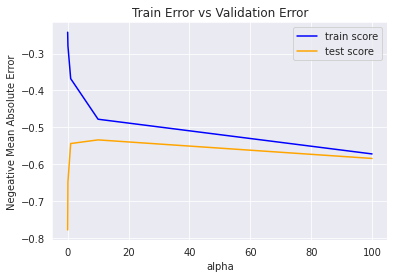

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 10}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.23869999281803717 | -0.7761573264684691 |
|     0.1     | -0.2765528879574991  | -0.6447151250082493 |
|      1      | -0.3662881172112247  | -0.5422740027345718 |
|      10     | -0.4768264331216364  | -0.5330455254937668 |
|     100     | -0.5699297810556537  | -0.5821638175696219 |
+-------------+----------------------+---------------------+


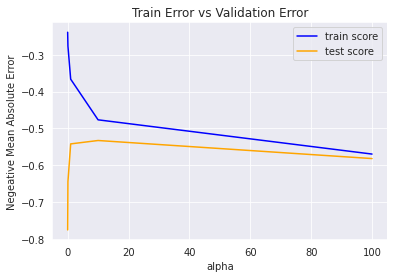

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 10}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.24123943489121732 | -0.7799840018907933 |
|     0.1     | -0.27944782941984436 |  -0.646339742955397 |
|      1      | -0.36721464707902146 | -0.5437574836635697 |
|      10     | -0.4783955284256528  | -0.5354930066990594 |
|     100     | -0.5729370844065548  | -0.5855175742461187 |
+-------------+----------------------+---------------------+


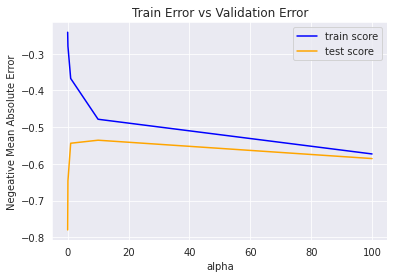

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 10}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.24253006743492742 | -0.7586264146837742 |
|     0.1     | -0.27743826253319775 | -0.6419881703303877 |
|      1      | -0.3656605087674971  | -0.5417815505355122 |
|      10     | -0.4760967535139568  | -0.5324367867658674 |
|     100     | -0.5692800183455352  | -0.5815935403325379 |
+-------------+----------------------+---------------------+


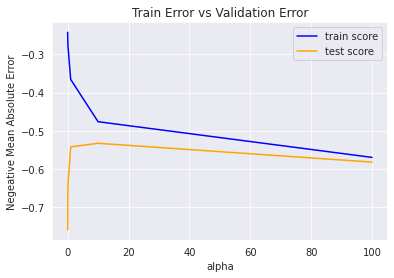

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 10}
+-------------+----------------------+---------------------+
| param_alpha |   mean_train_score   |   mean_test_score   |
+-------------+----------------------+---------------------+
|     0.01    | -0.23886619259098157 | -0.7765203614547019 |
|     0.1     | -0.2756272464749292  | -0.6446401064840116 |
|      1      | -0.3643017200415278  |  -0.539615918801495 |
|      10     | -0.47426173367738506 | -0.5305844951617942 |
|     100     | -0.5687982447815426  | -0.5810622327381655 |
+-------------+----------------------+---------------------+


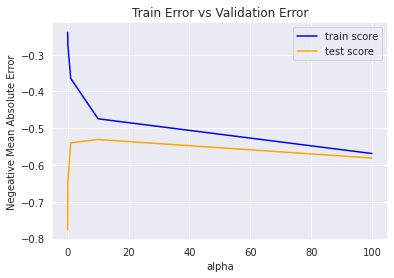

Best param for model: Ridge is {'alpha': 10}
Model: Ridge(alpha=10, random_state=42, solver='sag') is completed with R^2 value as 0.605548350920507
Exceution time taken: 0:24:12.103727
+-------+---------------+-------------------+
| Model | Encoding Type | Train RMSLE-Score |
+-------+---------------+-------------------+
| Ridge |     TF-IDF    |       0.3931      |
+-------+---------------+-------------------+
--------------------------------------------------
+-------+---------------+------------------+
| Model | Encoding Type | Test RMSLE-Score |
+-------+---------------+------------------+
| Ridge |     TF-IDF    |      0.4961      |
+-------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Ridge'})
hyper_param_name = dict({1: ['alpha']})
model_dict = dict({1: Ridge(solver='sag',random_state=42)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,3)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,\
                               y_train,x_cv_enc_vec_TFIDF,y_cv,r2=True)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

Model performance enhanced by removing the erroneous data points from training data set.

In [ ]:
x_train_err.shape

(29057, 10)

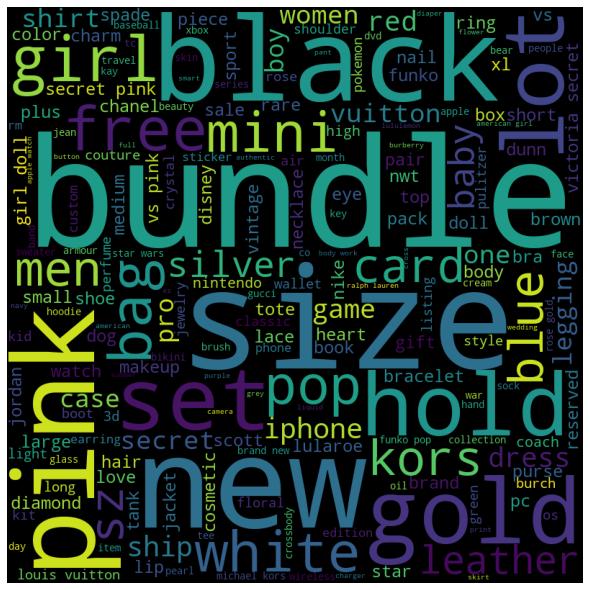

In [ ]:
stopwords = set(STOPWORDS)
name = ''

for val in x_train_err.name:
  sent = []
  for word in val.split(' '):
    word = word.lower()
    sent.append(word)
  name += " ".join(sent)
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(name)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

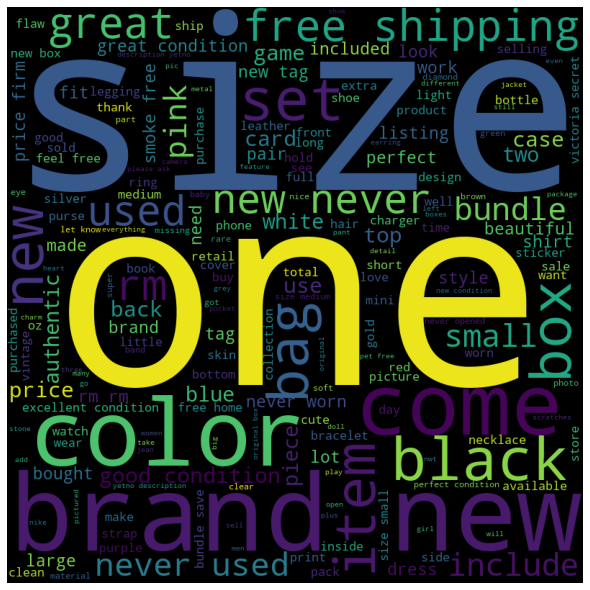

In [ ]:
stopwords = set(STOPWORDS)
name = ''

for val in x_train_err.item_description:
  sent = []
  for word in val.split(' '):
    word = word.lower()
    sent.append(word)
  name += " ".join(sent)
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(name)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
x_train_err.item_description.apply(lambda x: 1 if 'size' in x.lower().split(' ') else 0).sum()

4325

Vectorization on Erronomous data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_item_cnd = CountVectorizer.fit_transform(x_train_err.item_condition_id.values)
x_cv_item_cnd = CountVectorizer.transform(x_cv.item_condition_id.values)

print(x_train_item_cnd.shape)
print(x_cv_item_cnd.shape)

(29057, 5)
(311322, 5)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
x_train_shipping = OneHotEncoder.fit_transform(x_train_err.shipping.values.reshape(-1,1))
x_cv_shipping = OneHotEncoder.transform(x_cv.shipping.values.reshape(-1,1))

print(x_train_shipping.shape)
print(x_cv_shipping.shape)

(29057, 2)
(311322, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_brand_name = CountVectorizer.fit_transform(x_train_err.brand_name.values)
x_cv_brand_name = CountVectorizer.transform(x_cv.brand_name.values)

print(x_train_brand_name.shape)
print(x_cv_brand_name.shape)

(29057, 1287)
(311322, 1287)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier1_category_name = CountVectorizer.fit_transform(x_train_err.Tier1_category_name.values)
x_cv_Tier1_category_name = CountVectorizer.transform(x_cv.Tier1_category_name.values)

print(x_train_Tier1_category_name.shape)
print(x_cv_Tier1_category_name.shape)

(29057, 12)
(311322, 12)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier2_category_name = CountVectorizer.fit_transform(x_train_err.Tier2_category_name.values)
x_cv_Tier2_category_name = CountVectorizer.transform(x_cv.Tier2_category_name.values)

print(x_train_Tier2_category_name.shape)
print(x_cv_Tier2_category_name.shape)

(29057, 133)
(311322, 133)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_Tier3_category_name = CountVectorizer.fit_transform(x_train_err.Tier3_category_name.values)
x_cv_Tier3_category_name = CountVectorizer.transform(x_cv.Tier3_category_name.values)

print(x_train_Tier3_category_name.shape)
print(x_cv_Tier3_category_name.shape)

(29057, 678)
(311322, 678)


In [ ]:
x_train_enc_cat = hstack((x_train_item_cnd,x_train_shipping,x_train_brand_name,x_train_Tier1_category_name,x_train_Tier2_category_name,\
          x_train_Tier3_category_name))

x_cv_enc_cat = hstack((x_cv_item_cnd,x_cv_shipping,x_cv_brand_name,x_cv_Tier1_category_name,x_cv_Tier2_category_name,\
          x_cv_Tier3_category_name))

print(x_train_enc_cat.shape)
print(x_cv_enc_cat.shape)

(29057, 2117)
(311322, 2117)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=25000,use_idf=True)
x_train_enc_name_TFIDF = TfidfVectorizer.fit_transform(x_train_err.name.values)
x_cv_enc_name_TFIDF = TfidfVectorizer.transform(x_cv.name.values)

name_TFIDF_dict = dict(zip(TfidfVectorizer.get_feature_names(),TfidfVectorizer.idf_))

print(x_train_enc_name_TFIDF.shape)
print(x_cv_enc_name_TFIDF.shape)

(29057, 8837)
(311322, 8837)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=5, max_features=50000)
x_train_enc_item_description_TFIDF = TfidfVectorizer.fit_transform(x_train_err.item_description.values)
x_cv_enc_item_description_TFIDF = TfidfVectorizer.transform(x_cv.item_description.values)

item_description_TFIDF_dict = dict(zip(TfidfVectorizer.get_feature_names(),TfidfVectorizer.idf_))

print(x_train_enc_item_description_TFIDF.shape)
print(x_cv_enc_item_description_TFIDF.shape)

(29057, 17986)
(311322, 17986)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_name = MinMaxScaler.fit_transform(x_train_err.len_words_name.values.reshape(-1,1))
x_cv_len_words_name = MinMaxScaler.transform(x_cv.len_words_name.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_item_description = MinMaxScaler.fit_transform(x_train_err.len_words_item_description.values.reshape(-1,1))
x_cv_len_words_item_description = MinMaxScaler.transform(x_cv.len_words_item_description.values.reshape(-1,1))

In [ ]:
x_train_enc_vec_TFIDF = hstack((x_train_enc_cat,x_train_enc_name_TFIDF,x_train_enc_item_description_TFIDF,x_train_len_words_name,\
                          x_train_len_words_item_description)).tocsr()

x_cv_enc_vec_TFIDF = hstack((x_cv_enc_cat,x_cv_enc_name_TFIDF,x_cv_enc_item_description_TFIDF,x_cv_len_words_name,\
                          x_cv_len_words_item_description)).tocsr()

print(x_train_enc_vec_TFIDF.shape)
print(x_cv_enc_vec_TFIDF.shape)

(29057, 28942)
(311322, 28942)


###Model Execution to achieve best performance

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))

model_name = dict({1: 'DecisionTreeRegressor'})
hyper_param_name = dict({1: ['max_depth','min_samples_split','max_leaf_nodes']})
model_dict = dict({1: DecisionTreeRegressor(random_state = 40)})
hyperparam_dict = dict({1:{'max_depth': [10**x for x in range(0,3)],'min_samples_split': [10**x for x in range(0,3)],\
                           'max_leaf_nodes': [10**x for x in range(0,3)]}})


output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,\
                               y_train_err,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Sample s1 with best hyperparameter {'min_samples_split': 10, 'max_leaf_nodes': 100, 'max_depth': 10}
+-----------------+-------------------------+----------------------+---------------------+---------------------+
| param_max_depth | param_min_samples_split | param_max_leaf_nodes |   mean_train_score  |   mean_test_score   |
+-----------------+-------------------------+----------------------+---------------------+---------------------+
|       100       |            1            |         100          |         nan         |         nan         |
|        10       |            10           |         100          | -0.6734907053257411 |  -0.68327015723574  |
|       100       |            10           |          10          | -0.7243542955228583 | -0.7248345257751773 |
|        1        |            1            |          1           |         nan         |         nan         |
|        1        |            1            |  

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))

model_name = dict({1: 'LinearSVR'})
hyper_param_name = dict({1: ['C']})
model_dict = dict({1: LinearSVR(random_state = 40)})
hyperparam_dict = dict({1:{'C': [10**x for x in range(-2,3)]}})


output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,\
                               y_train_err,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s1 with best hyperparameter {'C': 0.1}
+---------+----------------------+---------------------+
| param_C |   mean_train_score   |   mean_test_score   |
+---------+----------------------+---------------------+
|   0.01  | -0.5652181847575234  | -0.5776787972001309 |
|   0.1   | -0.4926085904804073  | -0.5427028992760153 |
|    1    | -0.44393696616496436 | -0.5699207112425378 |
|    10   |  -0.434290599716026  | -0.6454811856349636 |
|   100   | -0.5486402545615595  | -0.7684293168014751 |
+---------+----------------------+---------------------+
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s2 with best hyperparameter {'C': 0.1}
+---------+---------------------+---------------------+
| param_C |   mean_train_score  |   mean_test_score   |
+---------+---------------------+---------------------+
|   0.01  | -0.5645146898852379 | -0.5772742931430951 |
|   0.1   | -0.4923495855410934 | -0.54318022453339

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7314000892633203 | -0.7315522747862404 |
|     0.1     |  -0.787637653607732 | -0.7876360161208918 |
|      1      |  -0.787637653607732 | -0.7876360161208918 |
|      10     |  -0.787637653607732 | -0.7876360161208918 |
|     100     |  -0.787637653607732 | -0.7876360161208918 |
+-------------+---------------------+---------------------+


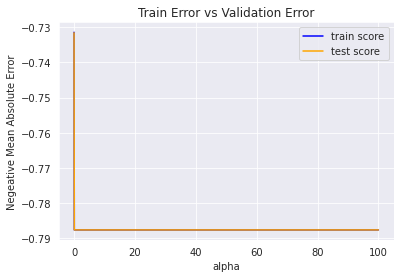

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7340698480992978 | -0.7341738477571156 |
|     0.1     |  -0.790315091812514 | -0.7903061504733443 |
|      1      |  -0.790315091812514 | -0.7903061504733443 |
|      10     |  -0.790315091812514 | -0.7903061504733443 |
|     100     |  -0.790315091812514 | -0.7903061504733443 |
+-------------+---------------------+---------------------+


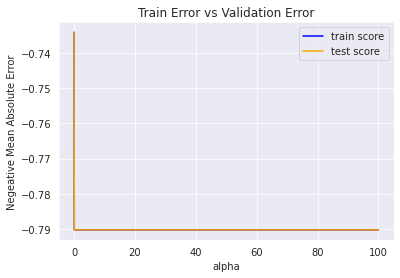

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7344563660865918 | -0.7345552694435887 |
|     0.1     | -0.7902882805421673 | -0.7902664700348074 |
|      1      | -0.7902882805421673 | -0.7902664700348074 |
|      10     | -0.7902882805421673 | -0.7902664700348074 |
|     100     | -0.7902882805421673 | -0.7902664700348074 |
+-------------+---------------------+---------------------+


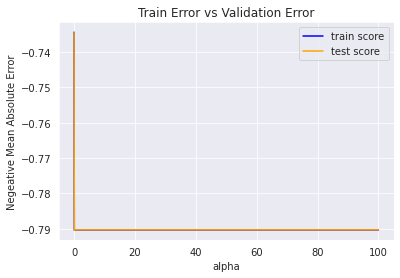

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7327937753317058 | -0.7329226002947277 |
|     0.1     | -0.7886697241709568 | -0.7886664349750717 |
|      1      | -0.7886697241709568 | -0.7886664349750717 |
|      10     | -0.7886697241709568 | -0.7886664349750717 |
|     100     | -0.7886697241709568 | -0.7886664349750717 |
+-------------+---------------------+---------------------+


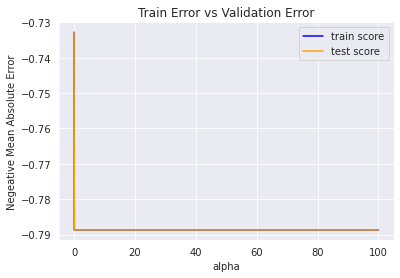

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    | -0.7358914394966829 | -0.7359790680033862 |
|     0.1     | -0.7921065220512291 | -0.7920973286142158 |
|      1      | -0.7921065220512291 | -0.7920973286142158 |
|      10     | -0.7921065220512291 | -0.7920973286142158 |
|     100     | -0.7921065220512291 | -0.7920973286142158 |
+-------------+---------------------+---------------------+


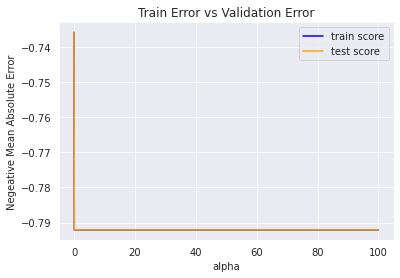

Best param for model: Lasso is {'alpha': 0.01}
Exceution time taken: 0:20:50.763300
+-----------------------+---------------+-------------------+
|         Model         | Encoding Type | Train RMSLE-Score |
+-----------------------+---------------+-------------------+
| DecisionTreeRegressor |     TF-IDF    |       1.3417      |
|       LinearSVR       |     TF-IDF    |       1.3011      |
|         Lasso         |     TF-IDF    |       1.4188      |
+-----------------------+---------------+-------------------+
--------------------------------------------------
+-----------------------+---------------+------------------+
|         Model         | Encoding Type | Test RMSLE-Score |
+-----------------------+---------------+------------------+
| DecisionTreeRegressor |     TF-IDF    |      0.9384      |
|       LinearSVR       |     TF-IDF    |      1.0856      |
|         Lasso         |     TF-IDF    |      0.9387      |
+-----------------------+---------------+------------------+


In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))

model_name = dict({1: 'Lasso'})
hyper_param_name = dict({1: ['alpha']})
model_dict = dict({1: Lasso()})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,3)]}})


output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,\
                               y_train_err,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 3
samples = list(('s1','s2','s3'))

model_name = dict({1: 'XGBRegressor'})
hyper_param_name = dict({1: ['learning_rate','n_estimators','gamma','max_depth']})
model_dict = dict({1: XGBRegressor(n_jobs=-1, random_state=40)})
hyperparam_dict = dict({1:{'learning_rate':  [10**x for x in range(-3,1)] ,'n_estimators': [10**x for x in range(0,3)],\
                      'gamma':[10**x for x in range(-2,2)],'max_depth':[10**x for x in range(0,3)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF,\
                               y_train_err,x_cv_enc_vec_TFIDF,y_cv)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


None of the models are giving better performance.

##**Advance Modeling**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=40).fit(x_train_enc_vec_TFIDF)
labels = kmeans.labels_

label_0 = np.where(labels == 0)
label_1 = np.where(labels == 1)

x_train_enc_vec_TFIDF_0 = x_train_enc_vec_TFIDF[label_0]
y_train_0 = y_train.iloc[label_0]

x_train_enc_vec_TFIDF_1 = x_train_enc_vec_TFIDF[label_1]
y_train_1 = y_train.iloc[label_1]

print(x_train_enc_vec_TFIDF_0.shape,y_train_0.shape)
print(x_train_enc_vec_TFIDF_1.shape,y_train_1.shape)

(324786, 80410) (324786,)
(401632, 80410) (401632,)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 10}
+-------------+--------------------+---------------------+
| param_alpha |  mean_train_score  |   mean_test_score   |
+-------------+--------------------+---------------------+
|     0.01    | 0.9084773163523892 | 0.04402051809548555 |
|     0.1     | 0.8775376028775337 | 0.33624077709075867 |
|      1      | 0.7859976279085676 |  0.5296514082673095 |
|      10     | 0.6358516257117213 |  0.5449469859102953 |
|     100     | 0.4783001373540555 |  0.4557883260020928 |
+-------------+--------------------+---------------------+


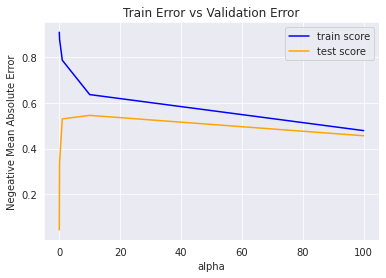

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 10}
+-------------+--------------------+----------------------+
| param_alpha |  mean_train_score  |   mean_test_score    |
+-------------+--------------------+----------------------+
|     0.01    | 0.9084399222949366 | 0.019606142838408846 |
|     0.1     | 0.8764087882053653 | 0.33373993494391213  |
|      1      | 0.7852101288575828 |  0.5287293639148333  |
|      10     | 0.633840293624783  |  0.5423448884970377  |
|     100     | 0.4749532720146988 | 0.45231869005415976  |
+-------------+--------------------+----------------------+


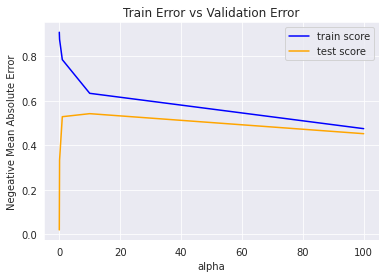

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 10}
+-------------+--------------------+----------------------+
| param_alpha |  mean_train_score  |   mean_test_score    |
+-------------+--------------------+----------------------+
|     0.01    | 0.9110087067716759 | 0.012274677025798653 |
|     0.1     | 0.8787619539188498 | 0.33306169159450694  |
|      1      | 0.7857019922772368 |  0.5304209922711219  |
|      10     | 0.6357441845749484 |  0.5450306783546174  |
|     100     | 0.476201445870238  | 0.45334435657950545  |
+-------------+--------------------+----------------------+


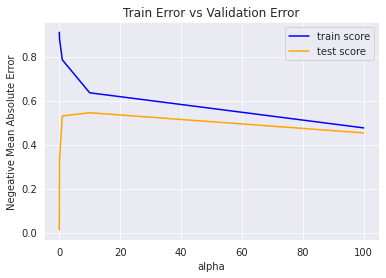

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 10}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    |  0.9084732896967853 | 0.04214062537424319 |
|     0.1     |  0.8779456248498956 |  0.334251538508578  |
|      1      |  0.7863683335701648 |  0.5290193533418059 |
|      10     |  0.6374480725541247 |  0.545884610937978  |
|     100     | 0.48001562948661425 | 0.45723835047406414 |
+-------------+---------------------+---------------------+


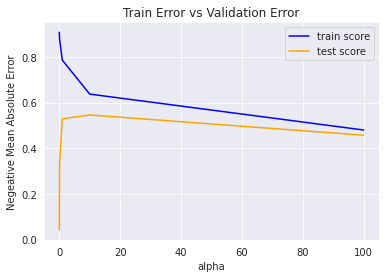

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 10}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    |  0.9077021851987321 | 0.04870107857744852 |
|     0.1     |  0.8769760192196776 |  0.3377236565301852 |
|      1      |  0.7854836702195499 |  0.5300867557925233 |
|      10     |  0.6353587566702795 |  0.5446225509584488 |
|     100     | 0.47747634091004637 | 0.45472026257225073 |
+-------------+---------------------+---------------------+


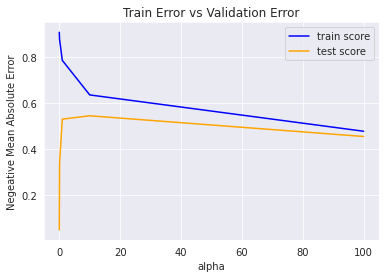

Best param for model: Ridge is {'alpha': 10}
Model: Ridge(alpha=10, random_state=42, solver='sag') is completed with R^2 value as 0.5819770499905749
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13695073444353212 |  0.13660496459942534   |
|     0.1     |         0.0         | -3.502289566084116e-05 |
|      1      |         0.0         | -3.502289566084116e-05 |
|      10     |         0.0         | -3.502289566084116e-05 |
|     100     |         0.0         | -3.502289566084116e-05 |
+-------------+---------------------+------------------------+


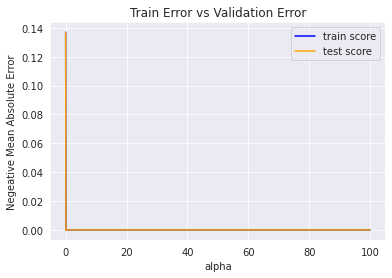

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13690148988668532 |  0.13663736204454174   |
|     0.1     |         0.0         | -5.048675071002151e-05 |
|      1      |         0.0         | -5.048675071002151e-05 |
|      10     |         0.0         | -5.048675071002151e-05 |
|     100     |         0.0         | -5.048675071002151e-05 |
+-------------+---------------------+------------------------+


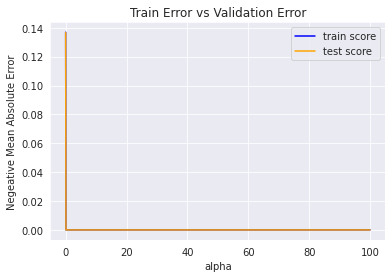

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+-----------------------+
| param_alpha |   mean_train_score  |    mean_test_score    |
+-------------+---------------------+-----------------------+
|     0.01    | 0.13809867130200632 |   0.1378116141984484  |
|     0.1     |         0.0         | -2.72679984338442e-05 |
|      1      |         0.0         | -2.72679984338442e-05 |
|      10     |         0.0         | -2.72679984338442e-05 |
|     100     |         0.0         | -2.72679984338442e-05 |
+-------------+---------------------+-----------------------+


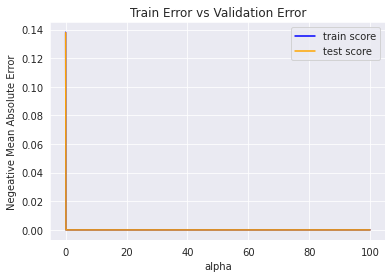

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.14001399365491096 |   0.1395751495219788   |
|     0.1     |         0.0         | -0.0001697921522313184 |
|      1      |         0.0         | -0.0001697921522313184 |
|      10     |         0.0         | -0.0001697921522313184 |
|     100     |         0.0         | -0.0001697921522313184 |
+-------------+---------------------+------------------------+


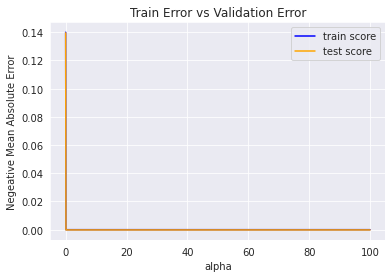

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13345440313103746 |   0.1331611671076864   |
|     0.1     |         0.0         | -7.671683527856742e-05 |
|      1      |         0.0         | -7.671683527856742e-05 |
|      10     |         0.0         | -7.671683527856742e-05 |
|     100     |         0.0         | -7.671683527856742e-05 |
+-------------+---------------------+------------------------+


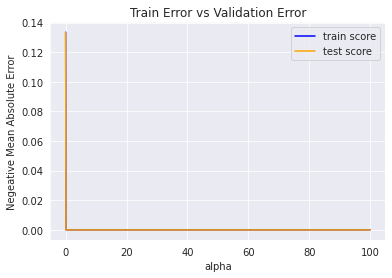

Best param for model: Lasso is {'alpha': 0.01}
Model: Lasso(alpha=0.01) is completed with R^2 value as 0.040512299129017104
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s1 with best hyperparameter {'C': 0.1}
+---------+---------------------+-----------------------+
| param_C |   mean_train_score  |    mean_test_score    |
+---------+---------------------+-----------------------+
|   0.01  | 0.48881095416240933 |   0.4619479506077491  |
|   0.1   |  0.6482334758717911 |   0.5364971034082802  |
|    1    |  0.7813006274123684 |  0.44979649811844424  |
|    10   |  0.8510745915130997 | -0.012941966534313187 |
|   100   |  0.8169508499793421 |  -0.7518484684439137  |
+---------+---------------------+-----------------------+
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s2 with best hyperparameter {'C': 0.1}
+---------+--------------------+-----------------------+
| param_C |  mean_train_score  |    mean_test_score    |
+---------+-----------------

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Ridge',2: 'Lasso',3: 'LinearSVR', 4: 'DecisionTreeRegressor'})
hyper_param_name = dict({1: ['alpha'], 2: ['alpha'], 3: ['C'], 4: ['max_depth','min_samples_split','max_leaf_nodes']})
model_dict = dict({1: Ridge(solver='sag',random_state=42),2: Lasso(), 3: LinearSVR(random_state = 40), 4: DecisionTreeRegressor(random_state = 40)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,3)]},2: {'alpha': [10**x for x in range(-2,3)]}, 3: \
                        {'C': [10**x for x in range(-2,3)]}, 4: {'max_depth': [10**x for x in range(0,3)],'min_samples_split': \
                          [10**x for x in range(0,3)],'max_leaf_nodes': [10**x for x in range(0,3)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF_0,\
                               y_train_0,x_cv_enc_vec_TFIDF,y_cv,r2=True)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 10}
+-------------+---------------------+----------------------+
| param_alpha |   mean_train_score  |   mean_test_score    |
+-------------+---------------------+----------------------+
|     0.01    |  0.9106767133675369 | 0.018663449783725628 |
|     0.1     |  0.8784151178158968 | 0.33293468201900167  |
|      1      |   0.78675059408023  |  0.5277533810608898  |
|      10     |  0.636362193136451  |  0.5438945890597222  |
|     100     | 0.47855434350132936 | 0.45541641137392663  |
+-------------+---------------------+----------------------+


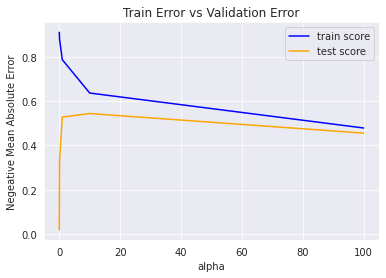

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 10}
+-------------+---------------------+----------------------+
| param_alpha |   mean_train_score  |   mean_test_score    |
+-------------+---------------------+----------------------+
|     0.01    |  0.9099531796156446 | 0.045889224134941654 |
|     0.1     |  0.8793939119401282 |  0.3368048811748044  |
|      1      |  0.7878760098897761 |  0.5312746752476477  |
|      10     |  0.6382566877014307 |  0.5466500964884927  |
|     100     | 0.48097152103884866 | 0.45839590578569006  |
+-------------+---------------------+----------------------+


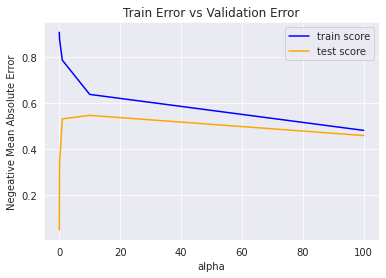

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 10}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    |  0.9098305346727044 | 0.03510010703700099 |
|     0.1     |  0.8787227896117354 | 0.33492752164950934 |
|      1      |  0.7864042488701849 |  0.5282726679101846 |
|      10     |  0.6360463741180583 |  0.5437125102981487 |
|     100     | 0.47828070648174387 | 0.45545563137485195 |
+-------------+---------------------+---------------------+


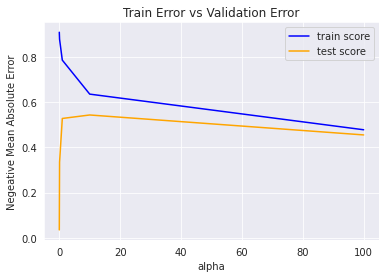

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 10}
+-------------+---------------------+---------------------+
| param_alpha |   mean_train_score  |   mean_test_score   |
+-------------+---------------------+---------------------+
|     0.01    |  0.9091758349939703 | 0.04317877626330384 |
|     0.1     |  0.8785331652336816 |  0.3404943543149441 |
|      1      |  0.7870596824788607 |  0.5322038429535564 |
|      10     |  0.6373570053548684 |  0.5460574970878171 |
|     100     | 0.48130979250955275 | 0.45861038239623875 |
+-------------+---------------------+---------------------+


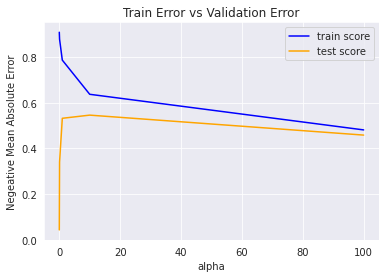

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 10}
+-------------+--------------------+----------------------+
| param_alpha |  mean_train_score  |   mean_test_score    |
+-------------+--------------------+----------------------+
|     0.01    | 0.9099517598898117 | 0.019012698907605617 |
|     0.1     | 0.8777069890673704 |  0.3323419684068266  |
|      1      | 0.7862734232811391 |  0.5271447249591688  |
|      10     | 0.6349772003658453 |  0.5429801552452883  |
|     100     | 0.4764213857842504 | 0.45371790937533485  |
+-------------+--------------------+----------------------+


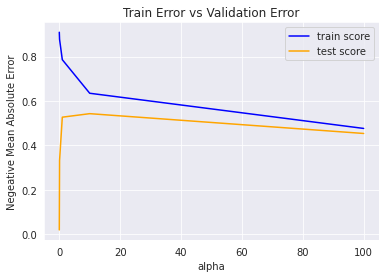

Best param for model: Ridge is {'alpha': 10}
Model: Ridge(alpha=10, random_state=42, solver='sag') is completed with R^2 value as 0.35111086862548213
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s1 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+-------------------------+
| param_alpha |   mean_train_score  |     mean_test_score     |
+-------------+---------------------+-------------------------+
|     0.01    | 0.13447585537776593 |   0.13424265646574643   |
|     0.1     |         0.0         | -1.7110897989436324e-05 |
|      1      |         0.0         | -1.7110897989436324e-05 |
|      10     |         0.0         | -1.7110897989436324e-05 |
|     100     |         0.0         | -1.7110897989436324e-05 |
+-------------+---------------------+-------------------------+


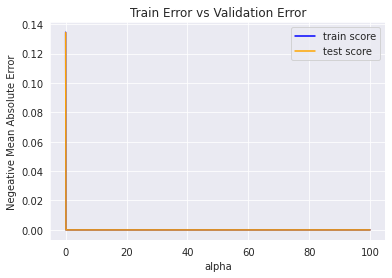

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s2 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13513750750783943 |  0.13483394909538343   |
|     0.1     |         0.0         | -5.231155006586441e-05 |
|      1      |         0.0         | -5.231155006586441e-05 |
|      10     |         0.0         | -5.231155006586441e-05 |
|     100     |         0.0         | -5.231155006586441e-05 |
+-------------+---------------------+------------------------+


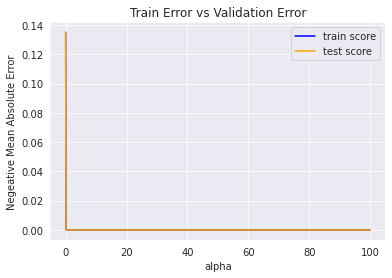

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s3 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13807935009476618 |  0.13771808530631954   |
|     0.1     |         0.0         | -6.980415670039264e-05 |
|      1      |         0.0         | -6.980415670039264e-05 |
|      10     |         0.0         | -6.980415670039264e-05 |
|     100     |         0.0         | -6.980415670039264e-05 |
+-------------+---------------------+------------------------+


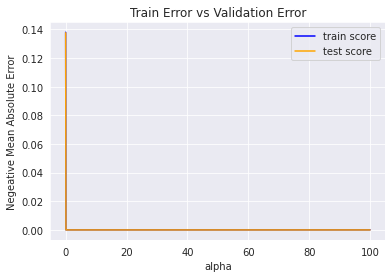

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s4 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13910649686084525 |   0.1386837187081507   |
|     0.1     |         0.0         | -8.543308734116905e-05 |
|      1      |         0.0         | -8.543308734116905e-05 |
|      10     |         0.0         | -8.543308734116905e-05 |
|     100     |         0.0         | -8.543308734116905e-05 |
+-------------+---------------------+------------------------+


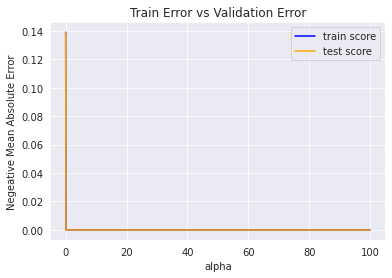

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train vs Validation Error plot for s5 with best hyperparameter {'alpha': 0.01}
+-------------+---------------------+------------------------+
| param_alpha |   mean_train_score  |    mean_test_score     |
+-------------+---------------------+------------------------+
|     0.01    | 0.13754728028096055 |   0.1369983303110315   |
|     0.1     |         0.0         | -8.889953224011649e-05 |
|      1      |         0.0         | -8.889953224011649e-05 |
|      10     |         0.0         | -8.889953224011649e-05 |
|     100     |         0.0         | -8.889953224011649e-05 |
+-------------+---------------------+------------------------+


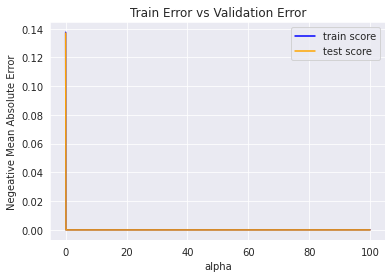

Best param for model: Lasso is {'alpha': 0.01}
Model: Lasso(alpha=0.01) is completed with R^2 value as 0.03797887153546342
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s1 with best hyperparameter {'C': 0.1}
+---------+--------------------+----------------------+
| param_C |  mean_train_score  |   mean_test_score    |
+---------+--------------------+----------------------+
|   0.01  | 0.4881131912477793 | 0.46196404680470043  |
|   0.1   | 0.6488969831786802 |  0.5387273639047472  |
|    1    | 0.7807644051414778 |  0.4519452046447457  |
|    10   | 0.8487769570999181 | -0.00880071788881558 |
|   100   | 0.8584913009650885 | -0.7047780858056397  |
+---------+--------------------+----------------------+
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Sample s2 with best hyperparameter {'C': 0.1}
+---------+--------------------+------------------------+
| param_C |  mean_train_score  |    mean_test_score     |
+---------+--------------------+-------------

In [ ]:
start_time = datetime.datetime.now()
no_of_samples = 5
samples = list(('s1','s2','s3','s4','s5'))
model_name = dict({1: 'Ridge',2: 'Lasso',3: 'LinearSVR', 4: 'DecisionTreeRegressor'})
hyper_param_name = dict({1: ['alpha'], 2: ['alpha'], 3: ['C'], 4: ['max_depth','min_samples_split','max_leaf_nodes']})
model_dict = dict({1: Ridge(solver='sag',random_state=42),2: Lasso(), 3: LinearSVR(random_state = 40), 4: DecisionTreeRegressor(random_state = 40)})
hyperparam_dict = dict({1:{'alpha': [10**x for x in range(-2,3)]},2: {'alpha': [10**x for x in range(-2,3)]}, 3: \
                        {'C': [10**x for x in range(-2,3)]}, 4: {'max_depth': [10**x for x in range(0,3)],'min_samples_split': \
                          [10**x for x in range(0,3)],'max_leaf_nodes': [10**x for x in range(0,3)]}})

output1,output2 = ModelExecute(model_name,no_of_samples,hyperparam_dict,hyper_param_name,samples,'TF-IDF',x_train_enc_vec_TFIDF_1,\
                               y_train_1,x_cv_enc_vec_TFIDF,y_cv,r2=True)

print('Exceution time taken: {}'.format(datetime.datetime.now()-start_time))

print(output1)
print('-'*50)
print(output2)


##Deep Learning Model

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 23 kB/s 


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers,Input,optimizers,callbacks,losses,Model
from tensorflow.keras.layers import Dense,Embedding,Flatten,Dropout,BatchNormalization,Concatenate,LSTM
from tensorflow.keras.losses import mean_squared_error
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as k
from tensorflow.keras.models import load_model

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data[0].shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(y_data.shape[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = list()
        y_batch = y_data[y_data.index[index_batch]]
        for seg in X_data:
          X_batch.append(seg[index_batch,:])
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

In [ ]:
#Glove Vector Pre-embedding Weights
import pickle
glove_vect_path = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/glove_vectors'
with open(glove_vect_path,'rb') as file:
  picklef = pickle.load(file)
  embedding_index = dict()
  for line in tqdm(picklef):
    values = line.split()
    word = values[0]
    coeffs = picklef[word][:64]
    embedding_index[word] = coeffs

100%|██████████| 51510/51510 [00:00<00:00, 545045.99it/s]


In [ ]:
def text_token_model(docs,maxlength,embedding_index):
  t = Tokenizer()
  t.fit_on_texts(docs)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  inp=list(embedding_index.values())
  embedding_matrix = np.zeros((vocab_size,inp[0].shape[0]))

  for word,index in t.word_index.items():
    if embedding_index.get(word) is not None:
      embedding_matrix[index,:] = embedding_index.get(word)

  return vocab_size,padded_docs,embedding_matrix

In [ ]:
def text_token(docs,maxlength):
  t = Tokenizer()
  t.fit_on_texts(docs)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  return vocab_size,padded_docs

**Model build on Errornous data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
x_train_item_cnd = CountVectorizer.fit_transform(x_train_err.item_condition_id.values)

print(x_train_item_cnd.shape)

(29057, 5)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
x_train_shipping = OneHotEncoder.fit_transform(x_train_err.shipping.values.reshape(-1,1))

print(x_train_shipping.shape)

(29057, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_name = MinMaxScaler.fit_transform(x_train_err.len_words_name.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x_train_len_words_item_description = MinMaxScaler.fit_transform(x_train_err.len_words_item_description.values.reshape(-1,1))

In [ ]:
def ModelBuild(data):
  tf.keras.backend.clear_session()

  max_brand_name_len = data['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier1_category_name_len = data['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier2_category_name_len = data['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier3_category_name_len = data['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

  brand_name_vocab_size,brand_name_padded_docs,brand_name_weigts = text_token_model(data['brand_name'].values,max_brand_name_len,embedding_index)
  Tier1_vocab_size,Tier1_padded_docs,Tier1_category_name_weights = text_token_model(data['Tier1_category_name'].values,max_Tier1_category_name_len,embedding_index)
  Tier2_vocab_size,Tier2_padded_docs,Tier2_category_name_weights = text_token_model(data['Tier2_category_name'].values,max_Tier2_category_name_len,embedding_index)
  Tier3_vocab_size,Tier3_padded_docs,Tier3_category_name_weights = text_token_model(data['Tier3_category_name'].values,max_Tier3_category_name_len,embedding_index)
  name_vocab_size,name_padded_docs,name_weights = text_token_model(data['name'].values,x_train['len_words_name'].values.max(),embedding_index)
  desc_vocab_size,desc_padded_docs,item_description_weights = text_token_model(data['item_description'].values,x_train['len_words_item_description'].values.max(),embedding_index)

  #print(brand_name_vocab_size,Tier1_vocab_size,Tier2_vocab_size,Tier3_vocab_size,name_vocab_size,desc_vocab_size)


  inp1 = Input(shape=(5,)) # Item Condition
  inp2 = Input(shape=(2,)) # Shipping Condition
  inp3 = Input(shape=(max_brand_name_len,)) # brand name
  emb3 = Embedding(brand_name_vocab_size, 64, weights = [brand_name_weigts], input_length=max_brand_name_len, trainable= False)(inp3)
  flat3 = Flatten()(emb3)
  inp4 = Input(shape=(max_Tier1_category_name_len,)) # Tier 1 Category Name
  emb4 = Embedding(Tier1_vocab_size, 64, weights = [Tier1_category_name_weights], input_length=max_Tier1_category_name_len, trainable= False)(inp4)
  flat4 = Flatten()(emb4)
  inp5 = Input(shape=(max_Tier2_category_name_len,)) # Tier 2 Category Name
  emb5 = Embedding(Tier2_vocab_size, 64, weights = [Tier2_category_name_weights], input_length=max_Tier2_category_name_len, trainable= False)(inp5)
  flat5 = Flatten()(emb5)
  inp6 = Input(shape=(max_Tier3_category_name_len,)) # Tier 3 Category Name
  emb6 = Embedding(Tier3_vocab_size, 64, weights = [Tier3_category_name_weights], input_length=max_Tier3_category_name_len, trainable= False)(inp6)
  flat6 = Flatten()(emb6)
  inp7 = Input(shape=(data['len_words_name'].values.max(),)) # Word Name Length
  emb7 = Embedding(name_vocab_size, 64, weights = [name_weights], input_length=data['len_words_name'].values.max(), trainable= False)(inp7)
  lstm7 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb7)
  flat7 = Flatten()(lstm7)
  inp8 = Input(shape=(data['len_words_item_description'].values.max(),)) # Word Item Description Length
  emb8 = Embedding(desc_vocab_size, 64, weights = [item_description_weights], input_length=data['len_words_item_description'].values.max(), trainable= False)(inp8)
  lstm8 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb8)
  flat8 = Flatten()(lstm8)
  inp9 = Input(shape=(1,)) # Word Name Length
  inp10 = Input(shape=(1,)) # Word Description Length
  inp = Concatenate()([inp1,inp2,flat3,flat4,flat5,flat6,flat7,flat8,inp9,inp10])
  
  d1 = Dense(256,activation='relu', kernel_initializer = 'he_uniform')(inp)
  drop1 = Dropout(0.3)(d1)
  bn1 = BatchNormalization()(drop1)
  d2 = Dense(128,activation='relu',kernel_initializer = 'he_uniform')(bn1)
  drop2 = Dropout(0.3)(d2)
  bn2 = BatchNormalization()(drop2)
  d3 = Dense(64,activation='relu',kernel_initializer = 'he_uniform')(bn2)
  drop3 = Dropout(0.3)(d3)
  output = Dense(1,activation='linear')(drop3)

  model = Model(inputs=[inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10], outputs=output)
  
  model.summary()
  
  return model

In [ ]:
x_train_slice = x_train_err
y_train_slice = y_train_err
x_cv_slice = x_cv
y_cv_slice = y_cv

batch_size = 100
no_epochs = math.ceil(x_train_slice.shape[0]/batch_size)
model = ModelBuild(x_train)
plot_model(model,show_shapes=True)

max_brand_name_len_train = x_train['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_train = x_train['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier2_category_name_len_train = x_train['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier3_category_name_len_train = x_train['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

brand_name_vocab_size_train,brand_name_padded_docs_train = text_token(x_train_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_train,Tier1_padded_docs_train = text_token(x_train_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_train,Tier2_padded_docs_train = text_token(x_train_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_train,Tier3_padded_docs_train = text_token(x_train_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_train,name_padded_docs_train = text_token(x_train_slice['name'].values,x_train['len_words_name'].values.max())
desc_vocab_size_train,desc_padded_docs_train = text_token(x_train_slice['item_description'].values,\
                                                          x_train['len_words_item_description'].values.max())

brand_name_vocab_size_cv,brand_name_padded_docs_cv = text_token(x_cv_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_cv,Tier1_padded_docs_cv = text_token(x_cv_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_cv,Tier2_padded_docs_cv = text_token(x_cv_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_cv,Tier3_padded_docs_cv = text_token(x_cv_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_cv,name_padded_docs_cv = text_token(x_cv_slice['name'].values,x_train['len_words_name'].values.max())
desc_vocab_size_cv,desc_padded_docs_cv = text_token(x_cv_slice['item_description'].values,x_train['len_words_item_description'].values.max())

X_train = [x_train_item_cnd.toarray(),x_train_shipping.toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
           Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_train_len_words_name,\
               x_train_len_words_item_description]
X_cv = [x_cv_item_cnd.toarray(),x_cv_shipping.toarray(),brand_name_padded_docs_cv,Tier1_padded_docs_cv,Tier2_padded_docs_cv,\
               Tier3_padded_docs_cv,name_padded_docs_cv,desc_padded_docs_cv,x_cv_len_words_name,\
               x_cv_len_words_item_description]

def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=3)
model.compile(loss=root_mean_squared_log_error, optimizer=opt)

print('='*30)
print('Training Started...')
print('='*30)

model.fit(x= X_train, y = y_train_slice, validation_data = (X_cv,y_cv_slice),\
                    epochs = 10,steps_per_epoch = no_epochs,callbacks = [callback])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 235)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

In [ ]:
plt.plot(model.history.history['loss'],color = 'Blue',label = 'Train Loss')
plt.plot(model.history.history['val_loss'],color = 'Orange',label = 'Validation Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/model_on_errornous_data.h5')

**Model Build on entire Train dataset**

In [ ]:
def ModelBuild(data):
  tf.keras.backend.clear_session()

  max_brand_name_len = data['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier1_category_name_len = data['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier2_category_name_len = data['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier3_category_name_len = data['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

  brand_name_vocab_size,brand_name_padded_docs = text_token(data['brand_name'].values,max_brand_name_len)
  Tier1_vocab_size,Tier1_padded_docs_cv = text_token(data['Tier1_category_name'].values,max_Tier1_category_name_len)
  Tier2_vocab_size,Tier2_padded_docs = text_token(data['Tier2_category_name'].values,max_Tier2_category_name_len)
  Tier3_vocab_size,Tier3_padded_docs = text_token(data['Tier3_category_name'].values,max_Tier3_category_name_len)
  name_vocab_size,name_padded_docs = text_token(data['name'].values,x_train['len_words_name'].values.max())
  desc_vocab_size,desc_padded_docs = text_token(data['item_description'].values,x_train['len_words_item_description'].values.max())

  #print(brand_name_vocab_size,Tier1_vocab_size,Tier2_vocab_size,Tier3_vocab_size,name_vocab_size,desc_vocab_size)


  inp1 = Input(shape=(5,)) # Item Condition
  inp2 = Input(shape=(2,)) # Shipping Condition
  inp3 = Input(shape=(max_brand_name_len,)) # brand name
  emb3 = Embedding(brand_name_vocab_size, 64, input_length=max_brand_name_len)(inp3)
  flat3 = Flatten()(emb3)
  inp4 = Input(shape=(max_Tier1_category_name_len,)) # Tier 1 Category Name
  emb4 = Embedding(Tier1_vocab_size, 64, input_length=max_Tier1_category_name_len)(inp4)
  flat4 = Flatten()(emb4)
  inp5 = Input(shape=(max_Tier2_category_name_len,)) # Tier 2 Category Name
  emb5 = Embedding(Tier2_vocab_size, 64, input_length=max_Tier2_category_name_len)(inp5)
  flat5 = Flatten()(emb5)
  inp6 = Input(shape=(max_Tier3_category_name_len,)) # Tier 3 Category Name
  emb6 = Embedding(Tier3_vocab_size, 64, input_length=max_Tier3_category_name_len)(inp6)
  flat6 = Flatten()(emb6)
  inp7 = Input(shape=(data['len_words_name'].values.max(),)) # Word Name Length
  emb7 = Embedding(name_vocab_size, 64, input_length=data['len_words_name'].values.max())(inp7)
  lstm7 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb7)
  flat7 = Flatten()(lstm7)
  inp8 = Input(shape=(data['len_words_item_description'].values.max(),)) # Word Item Description Length
  emb8 = Embedding(desc_vocab_size, 64, input_length=data['len_words_item_description'].values.max())(inp8)
  lstm8 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb8)
  flat8 = Flatten()(lstm8)
  inp9 = Input(shape=(1,)) # Word Name Length
  inp10 = Input(shape=(1,)) # Word Description Length
  inp = Concatenate()([inp1,inp2,flat3,flat4,flat5,flat6,flat7,flat8,inp9,inp10])
  
  d1 = Dense(256,activation='relu', kernel_initializer = 'he_uniform')(inp)
  drop1 = Dropout(0.3)(d1)
  bn1 = BatchNormalization()(drop1)
  d2 = Dense(128,activation='relu',kernel_initializer = 'he_uniform')(bn1)
  drop2 = Dropout(0.3)(d2)
  bn2 = BatchNormalization()(drop2)
  d3 = Dense(64,activation='relu',kernel_initializer = 'he_uniform')(bn2)
  drop3 = Dropout(0.3)(d3)
  output = Dense(1,activation='linear')(drop3)

  model = Model(inputs=[inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10], outputs=output)
  
  model.summary()
  
  return model

In [ ]:
index = math.ceil((x_train.shape[0]*3)/10) # working on 30% data
x_train_slice = x_train.iloc[:index]
y_train_slice = y_train[:index]
x_cv_slice = x_cv.iloc[:index]
y_cv_slice = y_cv[:index]

batch_size = 100
no_epochs = math.ceil(x_train_slice.shape[0]/batch_size)
model_2 = ModelBuild(x_train)
plot_model(model_2,show_shapes=True)

max_brand_name_len_train = x_train_slice['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_train = x_train_slice['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier2_category_name_len_train = x_train_slice['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier3_category_name_len_train = x_train_slice['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

'''max_brand_name_len_cv = x_cv['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_cv = x_cv['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier2_category_name_len_cv = x_cv['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier3_category_name_len_cv = x_cv['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()'''


brand_name_vocab_size_train,brand_name_padded_docs_train = text_token(x_train_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_train,Tier1_padded_docs_train = text_token(x_train_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_train,Tier2_padded_docs_train = text_token(x_train_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_train,Tier3_padded_docs_train = text_token(x_train_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_train,name_padded_docs_train = text_token(x_train_slice['name'].values,x_train_slice['len_words_name'].values.max())
desc_vocab_size_train,desc_padded_docs_train = text_token(x_train_slice['item_description'].values,\
                                                          x_train_slice['len_words_item_description'].values.max())

brand_name_vocab_size_cv,brand_name_padded_docs_cv = text_token(x_cv_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_cv,Tier1_padded_docs_cv = text_token(x_cv_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_cv,Tier2_padded_docs_cv = text_token(x_cv_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_cv,Tier3_padded_docs_cv = text_token(x_cv_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_cv,name_padded_docs_cv = text_token(x_cv_slice['name'].values,x_train_slice['len_words_name'].values.max())
desc_vocab_size_cv,desc_padded_docs_cv = text_token(x_cv_slice['item_description'].values,x_train_slice['len_words_item_description'].values.max())

X_train = [x_train_item_cnd[:index].toarray(),x_train_shipping[:index].toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
           Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_train_len_words_name[:index],\
               x_train_len_words_item_description[:index]]
X_cv = [x_cv_item_cnd[:index].toarray(),x_cv_shipping[:index].toarray(),brand_name_padded_docs_cv,Tier1_padded_docs_cv,Tier2_padded_docs_cv,\
               Tier3_padded_docs_cv,name_padded_docs_cv,desc_padded_docs_cv,x_cv_len_words_name[:index],\
               x_cv_len_words_item_description[:index]]

def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=3)
model_2.compile(loss=root_mean_squared_log_error, optimizer=opt)

print('='*30)
print('Training Started...')
print('='*30)

#model.fit_generator(generator = tuple(batch_generator(X_train, y_train, 5)), validation_data = (X_cv,y_cv),\
#                   epochs = epochs,steps_per_epoch=x_train.shape[0]/batch_size,callbacks = [callback],verbose=0)

model_2.fit(x= X_train, y = y_train_slice, validation_data = (X_cv,y_cv_slice),\
                    epochs = 5,steps_per_epoch = no_epochs,callbacks = [callback])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 235)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

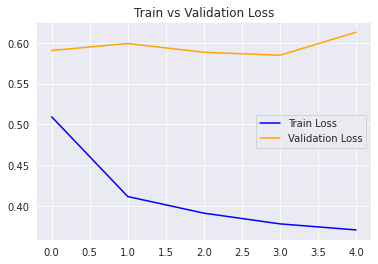

In [ ]:
plt.plot(model_2.history.history['loss'],color = 'Blue',label = 'Train Loss')
plt.plot(model_2.history.history['val_loss'],color = 'Orange',label = 'Validation Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

In [ ]:
model_2.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Final_model.h5')

In [ ]:
def ModelBuild(data):
  tf.keras.backend.clear_session()

  max_brand_name_len = data['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier1_category_name_len = data['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier2_category_name_len = data['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier3_category_name_len = data['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

  brand_name_vocab_size,brand_name_padded_docs,brand_name_weigts = text_token_model(data['brand_name'].values,max_brand_name_len,embedding_index)
  Tier1_vocab_size,Tier1_padded_docs,Tier1_category_name_weights = text_token_model(data['Tier1_category_name'].values,max_Tier1_category_name_len,embedding_index)
  Tier2_vocab_size,Tier2_padded_docs,Tier2_category_name_weights = text_token_model(data['Tier2_category_name'].values,max_Tier2_category_name_len,embedding_index)
  Tier3_vocab_size,Tier3_padded_docs,Tier3_category_name_weights = text_token_model(data['Tier3_category_name'].values,max_Tier3_category_name_len,embedding_index)
  name_vocab_size,name_padded_docs,name_weights = text_token_model(data['name'].values,x_train['len_words_name'].values.max(),embedding_index)
  desc_vocab_size,desc_padded_docs,item_description_weights = text_token_model(data['item_description'].values,x_train['len_words_item_description'].values.max(),embedding_index)

  #print(brand_name_vocab_size,Tier1_vocab_size,Tier2_vocab_size,Tier3_vocab_size,name_vocab_size,desc_vocab_size)


  inp1 = Input(shape=(5,)) # Item Condition
  inp2 = Input(shape=(2,)) # Shipping Condition
  inp3 = Input(shape=(max_brand_name_len,)) # brand name
  emb3 = Embedding(brand_name_vocab_size, 64, weights = [brand_name_weigts], input_length=max_brand_name_len, trainable= False)(inp3)
  flat3 = Flatten()(emb3)
  inp4 = Input(shape=(max_Tier1_category_name_len,)) # Tier 1 Category Name
  emb4 = Embedding(Tier1_vocab_size, 64, weights = [Tier1_category_name_weights], input_length=max_Tier1_category_name_len, trainable= False)(inp4)
  flat4 = Flatten()(emb4)
  inp5 = Input(shape=(max_Tier2_category_name_len,)) # Tier 2 Category Name
  emb5 = Embedding(Tier2_vocab_size, 64, weights = [Tier2_category_name_weights], input_length=max_Tier2_category_name_len, trainable= False)(inp5)
  flat5 = Flatten()(emb5)
  inp6 = Input(shape=(max_Tier3_category_name_len,)) # Tier 3 Category Name
  emb6 = Embedding(Tier3_vocab_size, 64, weights = [Tier3_category_name_weights], input_length=max_Tier3_category_name_len, trainable= False)(inp6)
  flat6 = Flatten()(emb6)
  inp7 = Input(shape=(data['len_words_name'].values.max(),)) # Word Name Length
  emb7 = Embedding(name_vocab_size, 64, weights = [name_weights], input_length=data['len_words_name'].values.max(), trainable= False)(inp7)
  lstm7 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb7)
  flat7 = Flatten()(lstm7)
  inp8 = Input(shape=(data['len_words_item_description'].values.max(),)) # Word Item Description Length
  emb8 = Embedding(desc_vocab_size, 64, weights = [item_description_weights], input_length=data['len_words_item_description'].values.max(), trainable= False)(inp8)
  lstm8 = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(emb8)
  flat8 = Flatten()(lstm8)
  inp9 = Input(shape=(1,)) # Word Name Length
  inp10 = Input(shape=(1,)) # Word Description Length
  inp = Concatenate()([inp1,inp2,flat3,flat4,flat5,flat6,flat7,flat8,inp9,inp10])
  
  d3 = Dense(64,activation='relu',kernel_initializer = 'he_uniform')(inp)
  drop3 = Dropout(0.3)(d3)
  output = Dense(1,activation='linear')(drop3)

  model = Model(inputs=[inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10], outputs=output)
  
  model.summary()
  
  return model

In [ ]:
index = math.ceil((x_train.shape[0]*10)/10) # working on 30% data
x_train_slice = x_train.iloc[:index]
y_train_slice = y_train[:index]
x_cv_slice = x_cv.iloc[:index]
y_cv_slice = y_cv[:index]

batch_size = 100
no_epochs = math.ceil(x_train_slice.shape[0]/batch_size)
model_3 = ModelBuild(x_train)
plot_model(model_3,show_shapes=True)

max_brand_name_len_train = x_train_slice['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_train = x_train_slice['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier2_category_name_len_train = x_train_slice['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier3_category_name_len_train = x_train_slice['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

'''max_brand_name_len_cv = x_cv['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_cv = x_cv['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier2_category_name_len_cv = x_cv['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier3_category_name_len_cv = x_cv['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()'''


brand_name_vocab_size_train,brand_name_padded_docs_train = text_token(x_train_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_train,Tier1_padded_docs_train = text_token(x_train_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_train,Tier2_padded_docs_train = text_token(x_train_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_train,Tier3_padded_docs_train = text_token(x_train_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_train,name_padded_docs_train = text_token(x_train_slice['name'].values,x_train_slice['len_words_name'].values.max())
desc_vocab_size_train,desc_padded_docs_train = text_token(x_train_slice['item_description'].values,\
                                                          x_train_slice['len_words_item_description'].values.max())

brand_name_vocab_size_cv,brand_name_padded_docs_cv = text_token(x_cv_slice['brand_name'].values,max_brand_name_len_train)
Tier1_vocab_size_cv,Tier1_padded_docs_cv = text_token(x_cv_slice['Tier1_category_name'].values,max_Tier1_category_name_len_train)
Tier2_vocab_size_cv,Tier2_padded_docs_cv = text_token(x_cv_slice['Tier2_category_name'].values,max_Tier2_category_name_len_train)
Tier3_vocab_size_cv,Tier3_padded_docs_cv = text_token(x_cv_slice['Tier3_category_name'].values,max_Tier3_category_name_len_train)
name_vocab_size_cv,name_padded_docs_cv = text_token(x_cv_slice['name'].values,x_train_slice['len_words_name'].values.max())
desc_vocab_size_cv,desc_padded_docs_cv = text_token(x_cv_slice['item_description'].values,x_train_slice['len_words_item_description'].values.max())

X_train = [x_train_item_cnd[:index].toarray(),x_train_shipping[:index].toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
           Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_train_len_words_name[:index],\
               x_train_len_words_item_description[:index]]
X_cv = [x_cv_item_cnd[:index].toarray(),x_cv_shipping[:index].toarray(),brand_name_padded_docs_cv,Tier1_padded_docs_cv,Tier2_padded_docs_cv,\
               Tier3_padded_docs_cv,name_padded_docs_cv,desc_padded_docs_cv,x_cv_len_words_name[:index],\
               x_cv_len_words_item_description[:index]]

def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=3)
model_3.compile(loss=root_mean_squared_log_error, optimizer=opt)

print('='*30)
print('Training Started...')
print('='*30)

#model.fit_generator(generator = tuple(batch_generator(X_train, y_train, 5)), validation_data = (X_cv,y_cv),\
#                   epochs = epochs,steps_per_epoch=x_train.shape[0]/batch_size,callbacks = [callback],verbose=0)

model_3.fit(x= X_train, y = y_train_slice, validation_data = (X_cv,y_cv_slice),\
                    epochs = 3,steps_per_epoch = no_epochs,callbacks = [callback])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 235)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

##**Final Model**

In [ ]:
#Glove Vector 50d Pre-embedding Weights
glove_vect_path = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/glove.6B.50d.txt'
count = 1
with open(glove_vect_path,'rb') as file:
  embedding_index_1 = dict()
  for line in tqdm(file):
    values = line.split()
    word = values[0].decode('utf-8')
    weights = np.asarray(values[1:], dtype='float32')
    embedding_index_1[word] = weights

400000it [00:07, 54358.69it/s]


In [ ]:
def text_token_model(docs,maxlength,embedding_index):
  t = Tokenizer()
  t.fit_on_texts(docs)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  inp=list(embedding_index.values())
  embedding_matrix = np.zeros((vocab_size,inp[0].shape[0]))

  for word,index in t.word_index.items():
    if embedding_index.get(word) is not None:
      embedding_matrix[index,:] = embedding_index.get(word)

  return vocab_size,padded_docs,embedding_matrix

In [ ]:
def text_train_token(train_docs,maxlength):
  t = Tokenizer()
  t.fit_on_texts(train_docs)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(train_docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  return padded_docs

In [ ]:
def text_test_token(train_docs,test_docs,maxlength):
  t = Tokenizer()
  t.fit_on_texts(train_docs)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(test_docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  return padded_docs

In [ ]:
def ModelBuild(data):
  tf.keras.backend.clear_session()

  max_brand_name_len = data['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier1_category_name_len = data['Tier1_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier2_category_name_len = data['Tier2_category_name'].apply(lambda x: len(x.split(' '))).values.max()
  max_Tier3_category_name_len = data['Tier3_category_name'].apply(lambda x: len(x.split(' '))).values.max()

  brand_name_vocab_size,brand_name_padded_docs,brand_name_weigts = text_token_model\
        (data['brand_name'].values,max_brand_name_len,embedding_index_1)
  Tier1_vocab_size,Tier1_padded_docs,Tier1_category_name_weights = text_token_model\
        (data['Tier1_category_name'].values,max_Tier1_category_name_len,embedding_index_1)
  Tier2_vocab_size,Tier2_padded_docs,Tier2_category_name_weights = text_token_model\
        (data['Tier2_category_name'].values,max_Tier2_category_name_len,embedding_index_1)
  Tier3_vocab_size,Tier3_padded_docs,Tier3_category_name_weights = text_token_model\
        (data['Tier3_category_name'].values,max_Tier3_category_name_len,embedding_index_1)
  name_vocab_size,name_padded_docs,name_weights = text_token_model(data['name'].values,\
        x_train['len_words_name'].values.max(),embedding_index_1)
  desc_vocab_size,desc_padded_docs,item_description_weights = text_token_model\
        (data['item_description'].values,x_train['len_words_item_description'].values.max(),embedding_index_1)

  #print(brand_name_vocab_size,Tier1_vocab_size,Tier2_vocab_size,Tier3_vocab_size,name_vocab_size,desc_vocab_size)


  inp1 = Input(shape=(5,)) # Item Condition
  inp2 = Input(shape=(2,)) # Shipping Condition
  inp3 = Input(shape=(max_brand_name_len,)) # brand name
  emb3 = Embedding(brand_name_vocab_size, 10, input_length=max_brand_name_len)(inp3)
  flat3 = Flatten()(emb3)
  inp4 = Input(shape=(max_Tier1_category_name_len,)) # Tier 1 Category Name
  emb4 = Embedding(Tier1_vocab_size, 10, input_length=max_Tier1_category_name_len)(inp4)
  flat4 = Flatten()(emb4)
  inp5 = Input(shape=(max_Tier2_category_name_len,)) # Tier 2 Category Name
  emb5 = Embedding(Tier2_vocab_size, 10, input_length=max_Tier2_category_name_len)(inp5)
  flat5 = Flatten()(emb5)
  inp6 = Input(shape=(max_Tier3_category_name_len,)) # Tier 3 Category Name
  emb6 = Embedding(Tier3_vocab_size, 10, input_length=max_Tier3_category_name_len)(inp6)
  flat6 = Flatten()(emb6)
  inp7 = Input(shape=(data['len_words_name'].values.max(),)) # Word Name Length
  emb7 = Embedding(name_vocab_size, 50, weights = [name_weights], \
                   input_length=data['len_words_name'].values.max(), trainable= False)(inp7)
  lstm7 = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(emb7)
  flat7 = Flatten()(lstm7)
  inp8 = Input(shape=(data['len_words_item_description'].values.max(),)) # Word Item Description Length
  emb8 = Embedding(desc_vocab_size, 50, weights = [item_description_weights], \
                   input_length=data['len_words_item_description'].values.max(),trainable= False)(inp8)
  lstm8 = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(emb8)
  flat8 = Flatten()(lstm8)
  inp9 = Input(shape=(1,)) # Word Name Length
  inp10 = Input(shape=(1,)) # Word Description Length
  inp = Concatenate()([inp1,inp2,flat3,flat4,flat5,flat6,flat7,flat8,inp9,inp10])
  
  d1 = Dense(64,activation='relu', kernel_initializer = 'he_uniform')(inp)
  drop1 = Dropout(0.3)(d1)
  bn1 = BatchNormalization()(drop1)
  d2 = Dense(32,activation='relu', kernel_initializer = 'he_uniform')(bn1)
  drop2 = Dropout(0.3)(d2)
  bn2 = BatchNormalization()(drop2)
  d3 = Dense(16,activation='relu', kernel_initializer = 'he_uniform')(bn2)
  drop3 = Dropout(0.3)(d3)
  output = Dense(1,activation='linear')(drop3)

  model = Model(inputs=[inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10], outputs=output)
  
  model.summary()
  
  return model

In [ ]:
index = math.ceil((x_train.shape[0]*3)/10) # working on 30% data
x_train_slice = x_train.iloc[:index]
y_train_slice = y_train[:index]
x_cv_slice = x_cv.iloc[:index]
y_cv_slice = y_cv[:index]

batch_size = 100
no_epochs = math.ceil(x_train_slice.shape[0]/batch_size)
model = ModelBuild(x_train)
plot_model(model,show_shapes=True)

max_brand_name_len_train = x_train_slice['brand_name'].apply(lambda x: len(x.split(' '))).values.max()
max_Tier1_category_name_len_train = x_train_slice['Tier1_category_name'].apply(lambda x: \
          len(x.split(' '))).values.max()
max_Tier2_category_name_len_train = x_train_slice['Tier2_category_name'].apply(lambda x: \
          len(x.split(' '))).values.max()
max_Tier3_category_name_len_train = x_train_slice['Tier3_category_name'].apply(lambda x: \
          len(x.split(' '))).values.max()

brand_name_padded_docs_train = text_train_token(x_train_slice['brand_name'].values,\
                                                                      max_brand_name_len_train)
Tier1_padded_docs_train = text_train_token(x_train_slice['Tier1_category_name'].values,\
                                                            max_Tier1_category_name_len_train)
Tier2_padded_docs_train = text_train_token(x_train_slice['Tier2_category_name'].values,\
                                                            max_Tier2_category_name_len_train)
Tier3_padded_docs_train = text_train_token(x_train_slice['Tier3_category_name'].values,\
                                                            max_Tier3_category_name_len_train)
name_padded_docs_train = text_train_token(x_train_slice['name'].values,\
                                                          x_train_slice['len_words_name'].values.max())
desc_padded_docs_train = text_train_token(x_train_slice['item_description'].values,\
                                                          x_train_slice['len_words_item_description'].values.max())

brand_name_padded_docs_cv = text_test_token(x_train_slice['brand_name'].values,x_cv_slice['brand_name'].values,\
                                                                max_brand_name_len_train)
Tier1_padded_docs_cv = text_test_token(x_train_slice['Tier1_category_name'].values,x_cv_slice['Tier1_category_name'].values,\
                                                      max_Tier1_category_name_len_train)
Tier2_padded_docs_cv = text_test_token(x_train_slice['Tier2_category_name'].values,x_cv_slice['Tier2_category_name'].values,\
                                                      max_Tier2_category_name_len_train)
Tier3_padded_docs_cv = text_test_token(x_train_slice['Tier3_category_name'].values,x_cv_slice['Tier3_category_name'].values,\
                                                      max_Tier3_category_name_len_train)
name_padded_docs_cv = text_test_token(x_train_slice['name'].values,x_cv_slice['name'].values,\
                                                    x_train_slice['len_words_name'].values.max())
desc_padded_docs_cv = text_test_token(x_train_slice['item_description'].values,x_cv_slice['item_description'].values,\
                                                    x_train_slice['len_words_item_description'].values.max())

X_train = [x_train_item_cnd[:index].toarray(),x_train_shipping[:index].toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
           Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_train_len_words_name[:index],\
               x_train_len_words_item_description[:index]]
X_cv = [x_cv_item_cnd[:index].toarray(),x_cv_shipping[:index].toarray(),brand_name_padded_docs_cv,Tier1_padded_docs_cv,Tier2_padded_docs_cv,\
               Tier3_padded_docs_cv,name_padded_docs_cv,desc_padded_docs_cv,x_cv_len_words_name[:index],\
               x_cv_len_words_item_description[:index]]

def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=3)
model.compile(loss=root_mean_squared_log_error, optimizer=opt)

print('='*30)
print('Training Started...')
print('='*30)

model.fit(x= X_train, y = y_train_slice, validation_data = (X_cv,y_cv_slice),\
                    epochs = 10,steps_per_epoch = no_epochs,callbacks = [callback])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 235)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

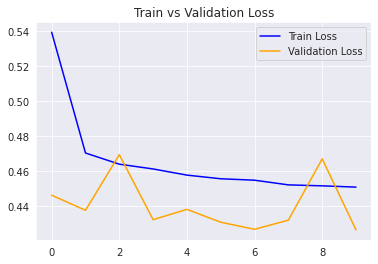

In [ ]:
#fig,axes = plt.subplot(1,2,figsize=(15,7))
plt.plot(model.history.history['loss'],color = 'Blue',label = 'Train Loss')
plt.plot(model.history.history['val_loss'],color = 'Orange',label = 'Validation Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Final_model_4.h5')

###**Model Evaluation**

In [ ]:
x_test.head()

name  ... len_words_name
train_id                                  ...               
1393440   popular style headband free sh  ...              5
457038                  bundle hollywood  ...              2
1371597                levi capris sz 12  ...              4
270725     the trash pack  purple series  ...              6
113965                    vs pink jacket  ...              3

[5 rows x 10 columns]

Encoding Featutes

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as k
from tensorflow.keras.losses import mean_squared_error

In [ ]:
def text_test_token(train_docs,test_docs,feature,maxlength):
  t = Tokenizer()
  t.fit_on_texts(train_docs)
  filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/token_'+feature+'.pkl'
  with open(filename,'wb') as out_file:
    pickle.dump(t,out_file)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(test_docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  return padded_docs

In [ ]:
def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

model = load_model('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Final_model_4.h5',\
                   custom_objects={'root_mean_squared_log_error': root_mean_squared_log_error})

In [ ]:
def encode(traindata,testdata,feature,encodetype):
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.preprocessing import MinMaxScaler
  
  if encodetype == 'CountVectorizer':
      CountVectorizer = CountVectorizer()
      CountVectorizer.fit(traindata)
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Countvectorizer_'+feature+'.pkl'
      with open(filename,'wb') as out_file:
        pickle.dump(CountVectorizer,out_file)
      data = CountVectorizer.transform(testdata)
  elif encodetype == 'OneHotEncoder':
      OneHotEncoder = OneHotEncoder()
      OneHotEncoder.fit(traindata)
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/OneHotEncoder_'+feature+'.pkl'
      with open(filename,'wb') as out_file:
        pickle.dump(OneHotEncoder,out_file)
      data = OneHotEncoder.transform(testdata)
  elif encodetype == 'MinMaxScaler':
      MinMaxScaler = MinMaxScaler()
      MinMaxScaler.fit(traindata)
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/MinMaxScaler_'+feature+'.pkl'
      with open(filename,'wb') as out_file:
        pickle.dump(MinMaxScaler,out_file)
      data = MinMaxScaler.fit_transform(testdata)
    
  return data

In [ ]:
def preprocess(traindata,testdata):
  
  x_test_item_cnd = encode(traindata.item_condition_id.values,testdata.item_condition_id.values,'item_condition_id','CountVectorizer')
  x_test_shipping = encode(traindata.shipping.values.reshape(-1,1),testdata.shipping.values.reshape(-1,1),'shipping','OneHotEncoder')
  x_test_len_words_name = encode(traindata.len_words_name.values.reshape(-1,1),testdata.len_words_name.values.reshape(-1,1),\
                                 'len_words_name','MinMaxScaler')
  x_test_len_words_item_description = encode(traindata.len_words_item_description.values.reshape(-1,1),\
                                             testdata.len_words_item_description.values.reshape(-1,1),'len_words_item_description',\
                                             'MinMaxScaler')

  brand_name_padded_docs_train = text_test_token(traindata['brand_name'].values,testdata['brand_name'].values,'brand_name',6)
  Tier1_padded_docs_train = text_test_token(traindata['Tier1_category_name'].values,testdata['Tier1_category_name'].values,\
                                            'Tier1_category_name',3)
  Tier2_padded_docs_train = text_test_token(traindata['Tier2_category_name'].values,testdata['Tier2_category_name'].values,\
                                            'Tier2_category_name',5)
  Tier3_padded_docs_train = text_test_token(traindata['Tier3_category_name'].values,testdata['Tier3_category_name'].values,\
                                            'Tier3_category_name',7)
  name_padded_docs_train = text_test_token(traindata['name'].values,testdata['name'].values,'name',17)
  desc_padded_docs_train = text_test_token(traindata['item_description'].values,testdata['item_description'].values,\
                                           'item_description',235)

  test_data = [x_test_item_cnd.toarray(),x_test_shipping.toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
            Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_test_len_words_name,\
                x_test_len_words_item_description]

  return test_data

In [ ]:
index = math.ceil((x_train.shape[0]*3)/10) # working on 30% data
x_train_slice = x_train.iloc[:index]
y_train_slice = y_train[:index]
x_cv_slice = x_cv.iloc[:index]
y_cv_slice = y_cv[:index]

In [ ]:
X_test = preprocess(x_train_slice,x_test)
results = model.evaluate(X_test,y_test, batch_size=1000)
print("test RMSLE", results)

445/445 [==============================] - 120s 267ms/step - loss: 0.4288
test RMSLE 0.4287871718406677


In [ ]:
def PredictPrice(data,index):
  testdata = list()
  for i in range(len(data)):
    testdata.append(data[i][:index])
  
  predicted_price = model.predict(testdata)
  
  return predicted_price

In [ ]:
index = 10
predicted_price = PredictPrice(X_test,index)

for idx in range(len(predicted_price)):
  print("Predicted Price for {}th item in test data is: {:.2f} with Actual Price as: {:.2f}".\
        format(idx+1,np.exp(predicted_price[idx][0]),np.exp(y_test.iloc[idx])))

Predicted Price for 1th item in test data is: 10.74 with Actual Price as: 15.00
Predicted Price for 2th item in test data is: 23.02 with Actual Price as: 109.00
Predicted Price for 3th item in test data is: 13.04 with Actual Price as: 12.00
Predicted Price for 4th item in test data is: 24.04 with Actual Price as: 26.00
Predicted Price for 5th item in test data is: 27.60 with Actual Price as: 19.00
Predicted Price for 6th item in test data is: 17.75 with Actual Price as: 42.00
Predicted Price for 7th item in test data is: 14.92 with Actual Price as: 10.00
Predicted Price for 8th item in test data is: 7.47 with Actual Price as: 7.00
Predicted Price for 9th item in test data is: 21.28 with Actual Price as: 24.00
Predicted Price for 10th item in test data is: 23.75 with Actual Price as: 24.00


#**Final Prediction on Test Data**

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle
from tqdm import tqdm

In [ ]:
testdata = r'/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sample Submission/test_stg2.tsv'
df_test = pd.read_csv(testdata, sep='\t',index_col=['test_id'])

In [ ]:
df_test.shape

(3460725, 6)

In [ ]:
df_test.head()

name  ...                                   item_description
test_id                                            ...                                                   
0        Breast cancer "I fight like a girl" ring  ...                                             Size 7
1        25 pcs NEW 7.5"x12" Kraft Bubble Mailers  ...  25 pcs NEW 7.5"x12" Kraft Bubble Mailers Lined...
2                                       Coach bag  ...  Brand new coach bag. Bought for [rm] at a Coac...
3                                   Floral Kimono  ...  -floral kimono -never worn -lightweight and pe...
4                                Life after Death  ...  Rediscovering life after the loss of a loved o...

[5 rows x 6 columns]

In [ ]:
df_test.isnull().sum()

name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description           6
dtype: int64

Filling 'Missing' Values

In [ ]:
df_test.brand_name.fillna('Missing',inplace=True)
df_test.category_name.fillna('Missing',inplace=True)
df_test.item_description.fillna('missing',inplace = True)
df_test.name.fillna('no title yet', inplace=True)
df_test.item_description.fillna('no description yet', inplace=True)

In [ ]:
## Reference: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def text_preprocess(phrase):
  stop_words = set(stopwords.words('english'))
  words = list()
  phrase = decontracted(phrase)
  for word in phrase.split(' '):
    if word not in stop_words:
      word = word.replace(r'[^A-Za-z0-9]','')
      '''for char in string.punctuation:
        word= word.replace(char,'')'''
      word = re.sub(r'[^\w\s]', '', word) ### Ref: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
      word = word.lower()
      words.append(word)
  if len(words)==0:
      words.append("missing")
  phrase = ' '.join(words)
  return phrase

In [ ]:
def item_cat_transform(x):
  cat_dict = {1:'New',2:'Like New',3:'Good',4:'Fair',5:'Poor'}
  return cat_dict[x]

In [ ]:
df_test['name'] = df_test['name'].apply(lambda x: text_preprocess(x))
df_test['item_description'] = df_test['item_description'].apply(lambda x: text_preprocess(x))

Feature Engineering

In [ ]:
df_test['Tier1_category_name'] = df_test.category_name.apply(lambda x: x.split('/')[0].lower() if len(x.split('/')) > 0 else x)
df_test['Tier2_category_name'] = df_test.category_name.apply(lambda x: x.split('/')[1].lower() if len(x.split('/')) > 1 else x)
df_test['Tier3_category_name'] = df_test.category_name.apply(lambda x: x.split('/')[2].lower() if len(x.split('/')) > 2 else x)
df_test.drop(columns = 'category_name', inplace = True)

In [ ]:
df_test['item_condition_id'] = df_test.item_condition_id.apply(lambda x: item_cat_transform(x))
df_test['len_words_name']= df_test.name.apply(lambda x: len(x.split(' ')))
df_test['len_words_item_description']= df_test.item_description.apply(lambda x: len(x.split(' ')))

In [ ]:
def text_test_token(test_docs,feature,maxlength):
  filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/token_'+feature+'.pkl'
  with open(filename,'rb') as out_file:
    t = pickle.load(out_file)
  vocab_size = len(t.word_index) + 1
  # integer encode the documents
  encoded_docs = t.texts_to_sequences(test_docs)
  padded_docs = pad_sequences(encoded_docs, maxlen=maxlength, padding='pre')

  return padded_docs

In [ ]:
def root_mean_squared_log_error(y_true, y_pred):
    return k.sqrt(mean_squared_error(y_true, y_pred))

model = load_model('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Final_model_4.h5',\
                   custom_objects={'root_mean_squared_log_error': root_mean_squared_log_error})

In [ ]:
def encode(testdata,feature,encodetype):
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.preprocessing import MinMaxScaler
  
  if encodetype == 'CountVectorizer':
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Countvectorizer_'+feature+'.pkl'
      with open(filename,'rb') as out_file:
        CountVectorizer = pickle.load(out_file)
      data = CountVectorizer.transform(testdata)
  elif encodetype == 'OneHotEncoder':
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/OneHotEncoder_'+feature+'.pkl'
      with open(filename,'rb') as out_file:
        OneHotEncoder = pickle.load(out_file)
      data = OneHotEncoder.transform(testdata)
  elif encodetype == 'MinMaxScaler':
      filename = '/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/MinMaxScaler_'+feature+'.pkl'
      with open(filename,'rb') as out_file:
        MinMaxScaler = pickle.load(out_file)
      data = MinMaxScaler.transform(testdata)
    
  return data

In [ ]:
def preprocess(testdata):
  
  x_test_item_cnd = encode(testdata.item_condition_id.values,'item_condition_id','CountVectorizer')
  x_test_shipping = encode(testdata.shipping.values.reshape(-1,1),'shipping','OneHotEncoder')
  x_test_len_words_name = encode(testdata.len_words_name.values.reshape(-1,1),'len_words_name','MinMaxScaler')
  x_test_len_words_item_description = encode(testdata.len_words_item_description.values.reshape(-1,1),'len_words_item_description',\
                                             'MinMaxScaler')

  brand_name_padded_docs_train = text_test_token(testdata['brand_name'].values,'brand_name',6)
  Tier1_padded_docs_train = text_test_token(testdata['Tier1_category_name'].values,'Tier1_category_name',3)
  Tier2_padded_docs_train = text_test_token(testdata['Tier2_category_name'].values,'Tier2_category_name',5)
  Tier3_padded_docs_train = text_test_token(testdata['Tier3_category_name'].values,'Tier3_category_name',7)
  name_padded_docs_train = text_test_token(testdata['name'].values,'name',17)
  desc_padded_docs_train = text_test_token(testdata['item_description'].values,'item_description',235)

  test_data = [x_test_item_cnd.toarray(),x_test_shipping.toarray(),brand_name_padded_docs_train,Tier1_padded_docs_train,\
            Tier2_padded_docs_train,Tier3_padded_docs_train,name_padded_docs_train,desc_padded_docs_train,x_test_len_words_name,\
                x_test_len_words_item_description]

  return test_data

In [ ]:
def PredictPrice(data,index):
  testdata = list()
  for i in tqdm(range(len(data))):
    testdata.append(data[i][:index])
  
  predicted_price = model.predict(testdata)
  
  return predicted_price

In [ ]:
index = 10
X_test = preprocess(df_test)
predicted_price = PredictPrice(X_test,index)

test_eval = pd.DataFrame(columns=['test_id','price'])

for idx in range(len(predicted_price)):
  test_eval.loc[idx] = [idx,np.exp(predicted_price[idx].item()).round(2)]

test_eval.test_id = test_eval.test_id.astype(int)
test_eval.head()

100%|██████████| 10/10 [00:00<00:00, 95108.93it/s]


test_id  price
0        0  11.04
1        1   9.31
2        2  39.90
3        3  18.24
4        4  10.36

In [ ]:
test_eval.shape

(10, 2)

In [ ]:
test_eval.to_csv('/content/drive/MyDrive/AAIC_Project_Merceri_Price_Prediction/Sample Submission/sample_submission_stg2.csv')